In [1]:
import sys, os
import datetime
import time
sys.path.append(os.path.join(os.getcwd(), '..'))

import talib
import numpy as np
import mplfinance as mpf

from src.dao import event
from src.dao.data_query import get_ohclv, get_all_pairs, buy
from src.utils.logger import logger
from src.notification import send_push
from src.dao.exchange import exchange
from src.utils.time import unify_dt


2024-04-29 18:32:41,752 - INFO - Enable proxy: http://localhost:7890


In [2]:
all_pairs = list(filter(lambda pair: pair.endswith('USDT') and pair != 'NBTUSDT', get_all_pairs()))

# 查询过去两天内出现MACD金叉的加密货币加密对


In [7]:
for pair in all_pairs:
    if pair == 'NBTUSDT':
        continue
    
    logger.info(f'Query {pair} in 100 days')
    df = get_ohclv(pair, '1d', limit=100)
    # print(f'==============={pair}================')
    df['macd'], df['macdSignal'], df['macdHist'] = talib.MACD(df['close'])
    if df['macdHist'].iloc[-2] < 0 and df['macdHist'].iloc[-1] >= 0:
        print(f'{pair} 在过去一天出现了金叉')
    if df['macdHist'].iloc[-3] < 0 and df['macdHist'].iloc[-2] >= 0:
        print(f'{pair} 在过去二天出现了金叉')
    # for i in range(len(df)):
    #     if df['macd'].iloc[i-1] < df['macdSignal'].iloc[i-1] and df['macd'].iloc[i] >= df['macdSignal'].iloc[i]:
    #         print(f"{pair} 金叉出现日: {df['timestamp'].iloc[i]}")
    # if df['macdHist'].iloc[-3] < df['macdHist'].iloc[-2] and df['macdHist'].iloc[-2] < df['macdHist'].iloc[-1]:
    #     print(f'{pair} 最近连续三天趋势增强')
    

BTT/USDT 在过去二天出现了金叉
CELR/USDT 在过去一天出现了金叉
USDSB/USDT 在过去一天出现了金叉
TOMO/USDT 在过去一天出现了金叉
RVN/USDT 在过去一天出现了金叉
GXS/USDT 在过去二天出现了金叉
LEND/USDT 在过去一天出现了金叉
JST/USDT 在过去二天出现了金叉
ALPHA/USDT 在过去二天出现了金叉
SXPDOWN/USDT 在过去二天出现了金叉
CTK/USDT 在过去二天出现了金叉
BCHDOWN/USDT 在过去二天出现了金叉
AKRO/USDT 在过去一天出现了金叉
DNT/USDT 在过去一天出现了金叉
AVA/USDT 在过去二天出现了金叉
AAVEDOWN/USDT 在过去二天出现了金叉
BTG/USDT 在过去二天出现了金叉
BURGER/USDT 在过去二天出现了金叉
TRIBE/USDT 在过去一天出现了金叉
OOKI/USDT 在过去二天出现了金叉
T/USDT 在过去一天出现了金叉
NEXO/USDT 在过去一天出现了金叉
HIFI/USDT 在过去一天出现了金叉
SUI/USDT 在过去一天出现了金叉
CYBER/USDT 在过去二天出现了金叉
VIC/USDT 在过去二天出现了金叉
STRK/USDT 在过去二天出现了金叉
ETHFI/USDT 在过去一天出现了金叉


# 监控自选加密货币出现SAR卖点的时刻

In [12]:
mypair = ['BTC/USDT', 'ETH/USDT', 'JTO/USDT', 'DOGE/USDT', 'CTXC/USDT', 'CHZ/USDT' ]
for pair in mypair:
    logger.info(f'Query {pair} in 100 days')
    df = get_ohclv(pair, '1d', limit=100)
    df['sar'] = talib.SAR(df['high'], df['low'], acceleration=0.02, maximum=0.2)
    # # 买入信号：当价格从下方穿过SAR线时
    df.loc[df['close'] > df['sar'], 'temp'] = 1
    # # 卖出信号：当价格从上方穿过SAR线时
    df.loc[df['close'] < df['sar'], 'temp'] = -1
    df['position'] = 0
    df.loc[df['temp'].shift(1) > df['temp'], 'position'] = -1
    df.loc[df['temp'].shift(1) < df['temp'], 'position'] = 1
    # 根据信号列计算仓位状态
    # df['position'] = df['signal'].diff()
    for i in range(1, len(df)):
        if df['position'].iloc[i] < 0:
            print(f'{pair} 在{df["timestamp"].iloc[i]} 出现卖点')

BTC/USDT 在2024-01-22 00:00:00 出现卖点
BTC/USDT 在2024-02-20 00:00:00 出现卖点
BTC/USDT 在2024-03-15 00:00:00 出现卖点
BTC/USDT 在2024-04-02 00:00:00 出现卖点
BTC/USDT 在2024-04-12 00:00:00 出现卖点
ETH/USDT 在2024-03-05 00:00:00 出现卖点
ETH/USDT 在2024-03-15 00:00:00 出现卖点
ETH/USDT 在2024-04-02 00:00:00 出现卖点
ETH/USDT 在2024-04-12 00:00:00 出现卖点
JTO/USDT 在2024-02-01 00:00:00 出现卖点
JTO/USDT 在2024-02-20 00:00:00 出现卖点
JTO/USDT 在2024-02-28 00:00:00 出现卖点
JTO/USDT 在2024-03-19 00:00:00 出现卖点
JTO/USDT 在2024-04-08 00:00:00 出现卖点
DOGE/USDT 在2024-01-23 00:00:00 出现卖点
DOGE/USDT 在2024-03-11 00:00:00 出现卖点
DOGE/USDT 在2024-04-02 00:00:00 出现卖点
CTXC/USDT 在2024-01-22 00:00:00 出现卖点
CTXC/USDT 在2024-02-12 00:00:00 出现卖点
CTXC/USDT 在2024-03-05 00:00:00 出现卖点
CTXC/USDT 在2024-03-13 00:00:00 出现卖点
CTXC/USDT 在2024-04-12 00:00:00 出现卖点
CHZ/USDT 在2024-01-31 00:00:00 出现卖点
CHZ/USDT 在2024-03-05 00:00:00 出现卖点
CHZ/USDT 在2024-03-17 00:00:00 出现卖点
CHZ/USDT 在2024-04-12 00:00:00 出现卖点


# 在过去150天内，MACD 金叉买入，SAR 卖点卖出的收益率

In [50]:
def macd_mix_sar_test(pair):
    pre_price = None
    init_usdt = curr_usdt = 100 # usdt
    curr_btc = 0
    pre_cost = 2 # usdt
    
    df = get_ohclv(pair, '1d', limit=500)
    # 找金叉点
    df['macd'], df['macdSignal'], df['macdHist'] = talib.MACD(df['close'])
    df['temp'] = numpy.nan
    df.loc[df['macdHist'] >= 0, 'temp'] = 1
    df.loc[df['macdHist'] < 0, 'temp'] = -1
    df.loc[df['temp'].shift(1) > df['temp'], 'macd_position'] = -1
    df.loc[df['temp'].shift(1) < df['temp'], 'macd_position'] = 1
    
    # 找SAR卖点
    # TODO: 第一个卖点应该忽略
    df['sar'] = talib.SAR(df['high'], df['low'], acceleration=0.02, maximum=0.2)
    df['temp'] = numpy.nan
    # # 买入信号：当价格从下方穿过SAR线时
    df.loc[df['close'] > df['sar'], 'temp'] = 1
    # # 卖出信号：当价格从上方穿过SAR线时
    df.loc[df['close'] < df['sar'], 'temp'] = -1
    df.loc[df['temp'].shift(1) > df['temp'], 'sar_position'] = -1
    df.loc[df['temp'].shift(1) < df['temp'], 'sar_position'] = 1
   
    for i in range(1, len(df)):
        if df['macd_position'].iloc[i] > 0 and curr_usdt > 0:
            curr_btc = curr_usdt / df['close'].iloc[i]
            pre_cost -= curr_usdt * 0.001
            pre_price = curr_usdt
            curr_usdt = 0
            print(f"{df['timestamp'].iloc[i]} 买入")
            continue
        if df['sar_position'].iloc[i] < 0 and curr_btc > 0:
            curr_usdt = curr_btc * df['close'].iloc[i]
            pre_cost -= (curr_btc * 0.001) * df['close'].iloc[i]
            curr_btc = 0
            rate = (curr_usdt - pre_price)/ pre_price * 100
            print(f"{df['timestamp'].iloc[i]} 卖出, 收益率: {rate}%")
            continue

    final_usdt = (curr_usdt if curr_usdt > 0 else curr_btc * df['close'].iloc[-1]) - (2 - pre_cost) + 2
    final_rate = (final_usdt - (init_usdt + 2)) / (init_usdt + 2) * 100
    print(f'截至最终USDT {final_usdt}， 收益率{final_rate}%')
    
    
    

In [51]:
mypair = ['BTC/USDT', 'ETH/USDT', 'JTO/USDT', 'DOGE/USDT', 'CTXC/USDT', 'CHZ/USDT' ]
for pair in mypair:
    print(f'============{pair}===============')
    macd_mix_sar_test(pair)

============BTC/USDT===============
2024-01-28 00:00:00 买入
2024-02-21 00:00:00 卖出, 收益率: 23.35970113530327%
2024-02-27 00:00:00 买入
2024-03-15 00:00:00 卖出, 收益率: 21.849739135801237%
截至最终USDT 151.8164411557684， 收益率48.83964819192979%
============ETH/USDT===============
2024-01-09 00:00:00 买入
2024-01-22 00:00:00 卖出, 收益率: -1.283544271399876%
2024-02-06 00:00:00 买入
2024-03-05 00:00:00 卖出, 收益率: 49.7761986647785%
2024-04-08 00:00:00 买入
2024-04-12 00:00:00 卖出, 收益率: -12.374242477555166%
2024-04-23 00:00:00 买入
截至最终USDT 134.83938936830774， 收益率32.195479772850724%
============JTO/USDT===============
2024-01-10 00:00:00 买入
2024-01-23 00:00:00 卖出, 收益率: -0.005119017148714988%
2024-01-27 00:00:00 买入
2024-02-23 00:00:00 卖出, 收益率: -4.28119911885835%
2024-02-26 00:00:00 买入
2024-02-28 00:00:00 卖出, 收益率: 1.74178488058898%
2024-03-31 00:00:00 买入
2024-04-08 00:00:00 卖出, 收益率: -1.4324826439816243%
2024-04-21 00:00:00 买入
截至最终USDT 82.10632378687， 收益率-19.5036041305196%
============DOGE/USDT===============
2024-01-16 00

## 如果1h内下跌超过10%的时候买入，最后涨到5%的时候卖出，要等多久

In [6]:
def buy_10_sell_5(pair, draw = False):
    pre_price = None
    init_usdt = curr_usdt = 100 # usdt
    curr_btc = 0
    pre_cost = 2 # usdt
    
    df = get_ohclv(pair, '1h', limit=500)
    # 找下跌10%的点
    buy_points = [np.nan] * len(df)
    sell_points = [np.nan] * len(df)
    df.loc[(df['high'] - df['close']) / df['high'] * 100 > 10, 'position'] = 1

    for i in range(1, len(df)):
        if df['position'].iloc[i] == 1 and curr_usdt > 0:
            # print(df.iloc[i])
            curr_btc = curr_usdt / df['close'].iloc[i]
            pre_cost -= curr_usdt * 0.001
            pre_price = curr_usdt
            curr_usdt = 0
            print(f"{df['timestamp'].iloc[i]} 买入")
            buy_points[i] = df['close'].iloc[i]
            continue
        if curr_btc > 0:
            if (df['close'].iloc[i] * curr_btc - pre_price) / pre_price * 100 > 5:
                # print(df.iloc[i])
                curr_usdt = curr_btc * df['close'].iloc[i]
                pre_cost -= (curr_btc * 0.001) * df['close'].iloc[i]
                curr_btc = 0
                rate = (curr_usdt - pre_price)/ pre_price * 100
                print(f"{df['timestamp'].iloc[i]} 卖出, 收益率: {rate}%")
                sell_points[i] = df['close'].iloc[i]
                continue
    if draw:
        addplot = []
        filter_out_nan = lambda x: x > 0
        if len(list(filter(filter_out_nan, buy_points))) > 0:
            addplot.append(mpf.make_addplot(buy_points, type='scatter', markersize=100, color='y'))
        if len(list(filter(filter_out_nan, sell_points))) > 0:
            addplot.append(mpf.make_addplot(sell_points, type='scatter', markersize=100, color='black'))
        mpf.plot(df.set_index('timestamp'), type='candle', style='yahoo',
             title=f'{pair} Chart', ylabel='Price', ylabel_lower='MACD',
             addplot=addplot,
             figscale=1.5, figsize=(16, 10))
    
    final_usdt = (curr_usdt if curr_usdt > 0 else curr_btc * df['close'].iloc[-1]) - (2 - pre_cost) + 2
    final_rate = (final_usdt - (init_usdt + 2)) / (init_usdt + 2) * 100
    result = {'msg': f'截至最终USDT {final_usdt}， 收益率{final_rate}%', 'rate': final_rate }
    # print(result['msg'])
    return result

In [7]:
results = {}
for pair in all_pairs:
    print(f'============{pair}===============')
    results[pair] = buy_10_sell_5(pair)

2024-04-28 19:54:39,732 - INFO - Create an new database session


============BTC/USDT===============
============ETH/USDT===============
============BNB/USDT===============
============NEO/USDT===============
============LTC/USDT===============
============QTUM/USDT===============
============ADA/USDT===============
2024-04-12 18:00:00 买入
2024-04-12 20:00:00 卖出, 收益率: 6.25669595028927%
============XRP/USDT===============
2024-04-13 20:00:00 买入
2024-04-13 21:00:00 卖出, 收益率: 6.862972408996043%
============EOS/USDT===============
2024-04-12 18:00:00 买入
============TUSD/USDT===============
============IOTA/USDT===============
2024-04-12 18:00:00 买入
2024-04-12 20:00:00 卖出, 收益率: 5.1057040287196%
============XLM/USDT===============
============ONT/USDT===============
============TRX/USDT===============
============ETC/USDT===============
============ICX/USDT===============
2024-04-12 18:00:00 买入
============NULS/USDT===============
2024-04-12 18:00:00 买入
2024-04-12 19:00:00 卖出, 收益率: 5.343511450381655%
============VET/USDT===============
============USDC/USDT

In [8]:
good = list(filter(lambda x: results[x]['rate'] > 0, results))

In [9]:
bad = list(filter(lambda x: results[x]['rate'] < 0, results))

In [10]:
ok = list(filter(lambda x: results[x]['rate'] == 0, results))

In [11]:
print(len(good), len(bad), len(ok))

436 97 116


2024-04-12 18:00:00 买入


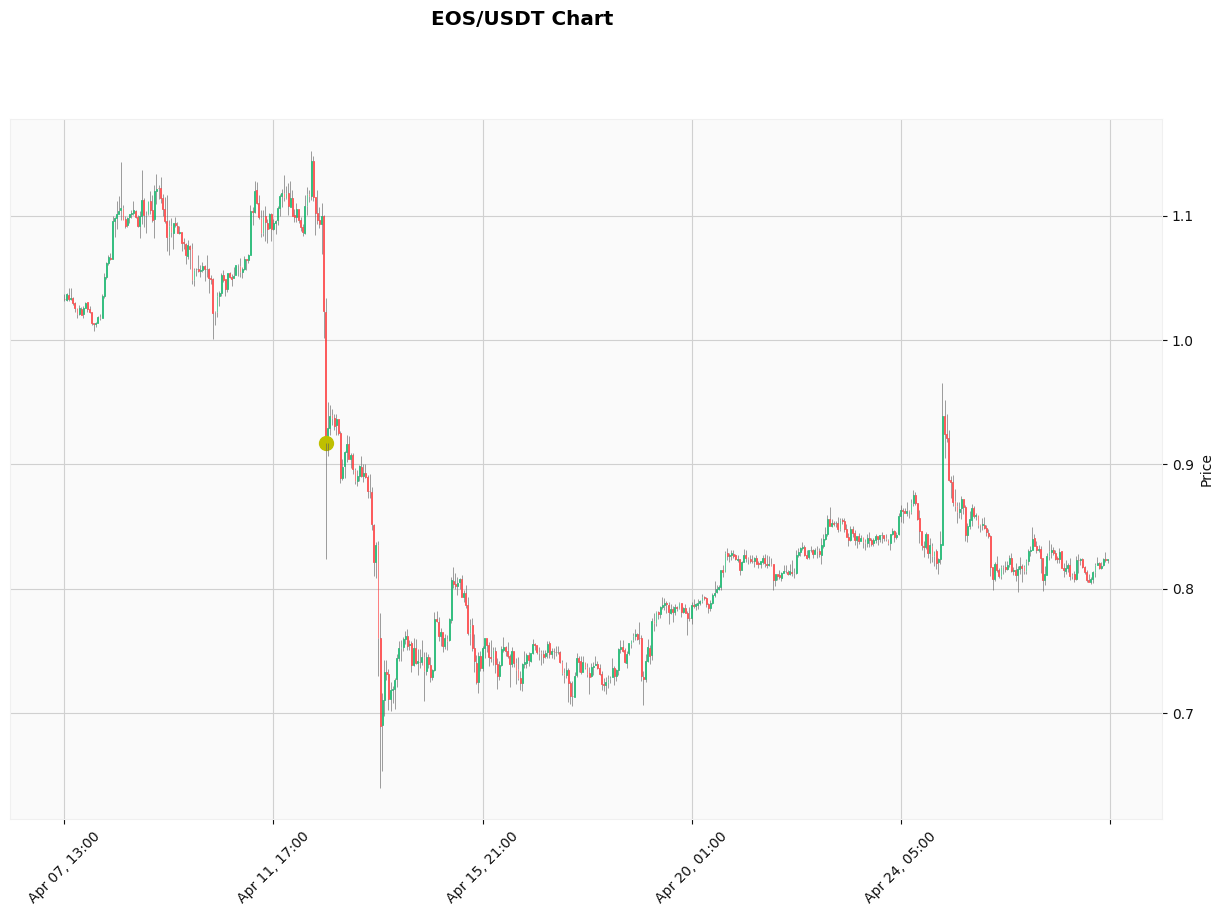

2024-04-12 18:00:00 买入


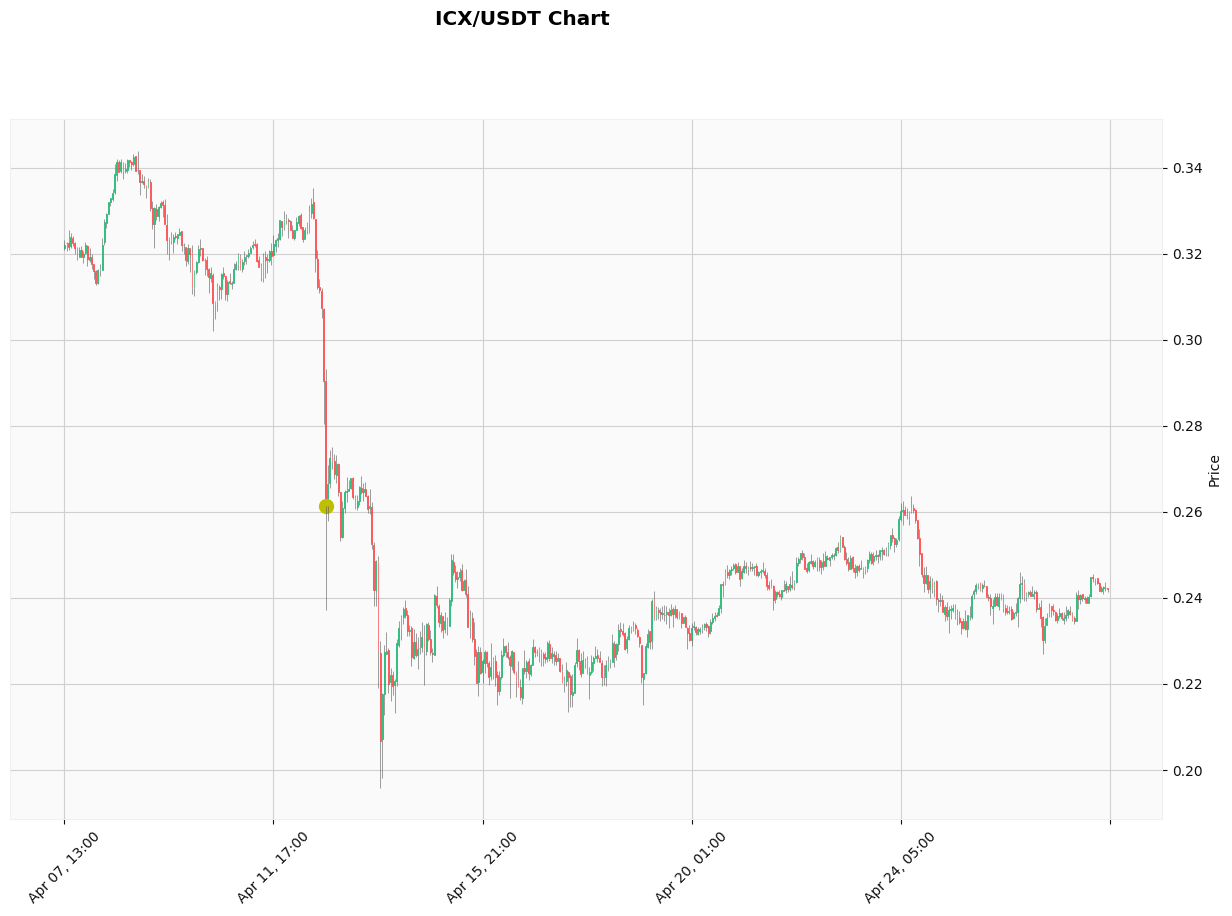

2021-08-17 19:00:00 买入


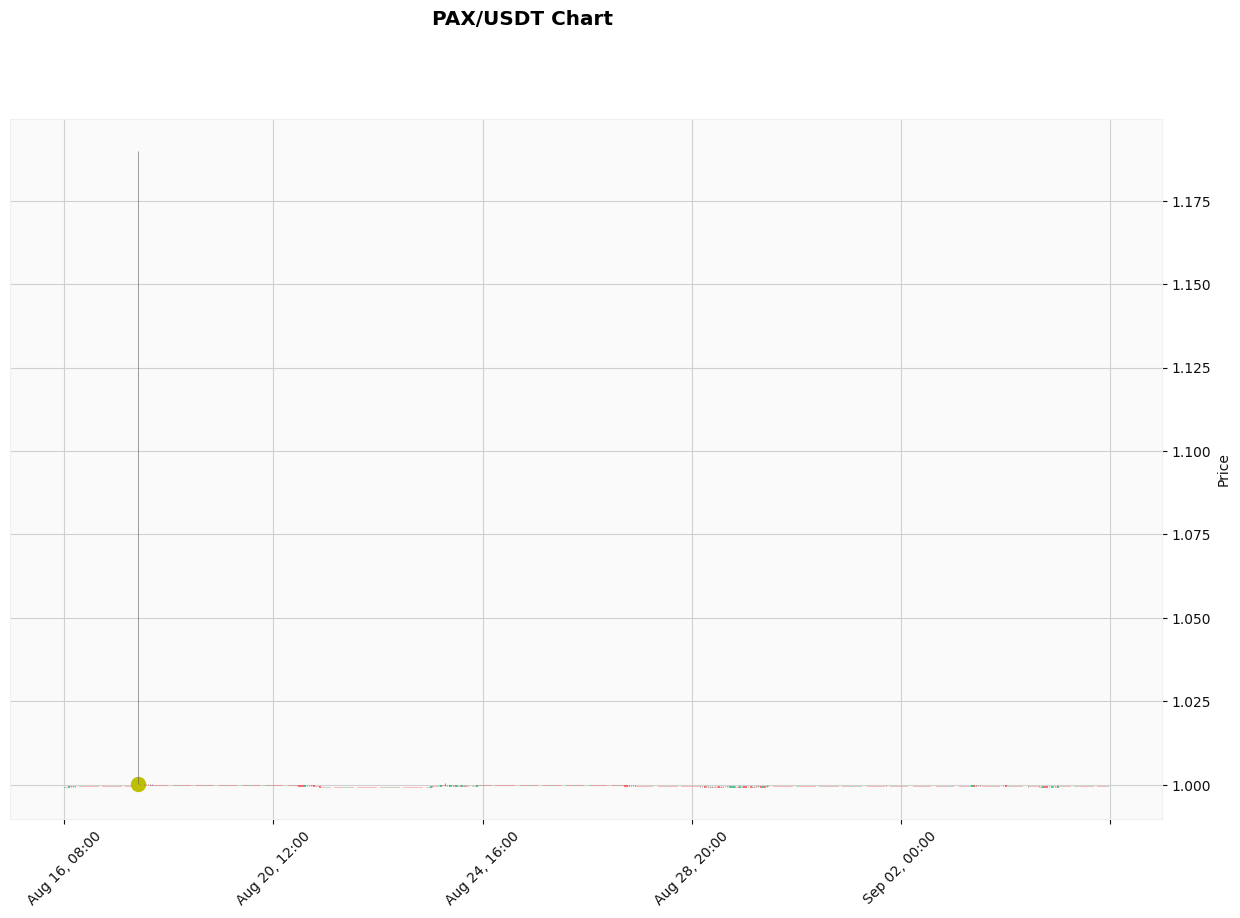

2024-02-06 07:00:00 买入


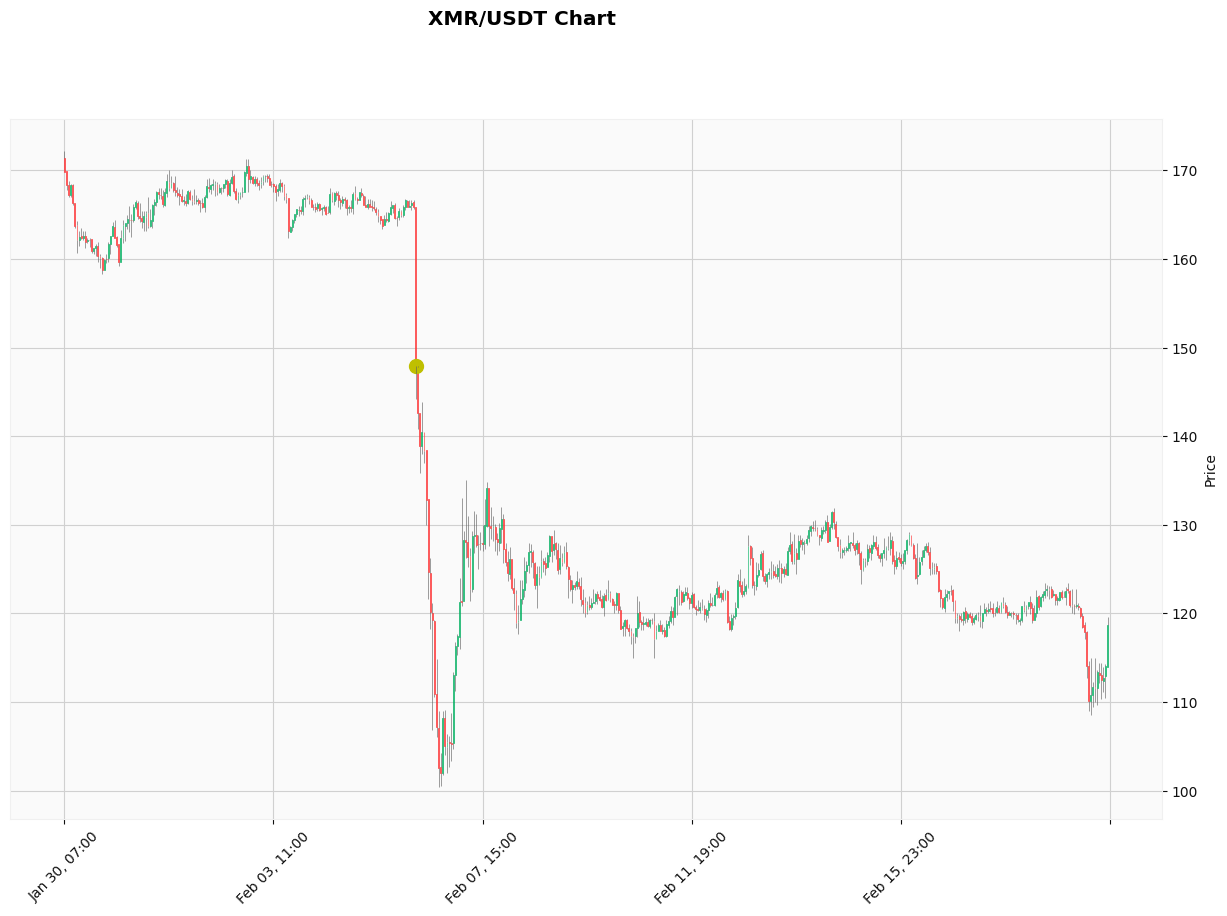

2024-04-12 18:00:00 买入


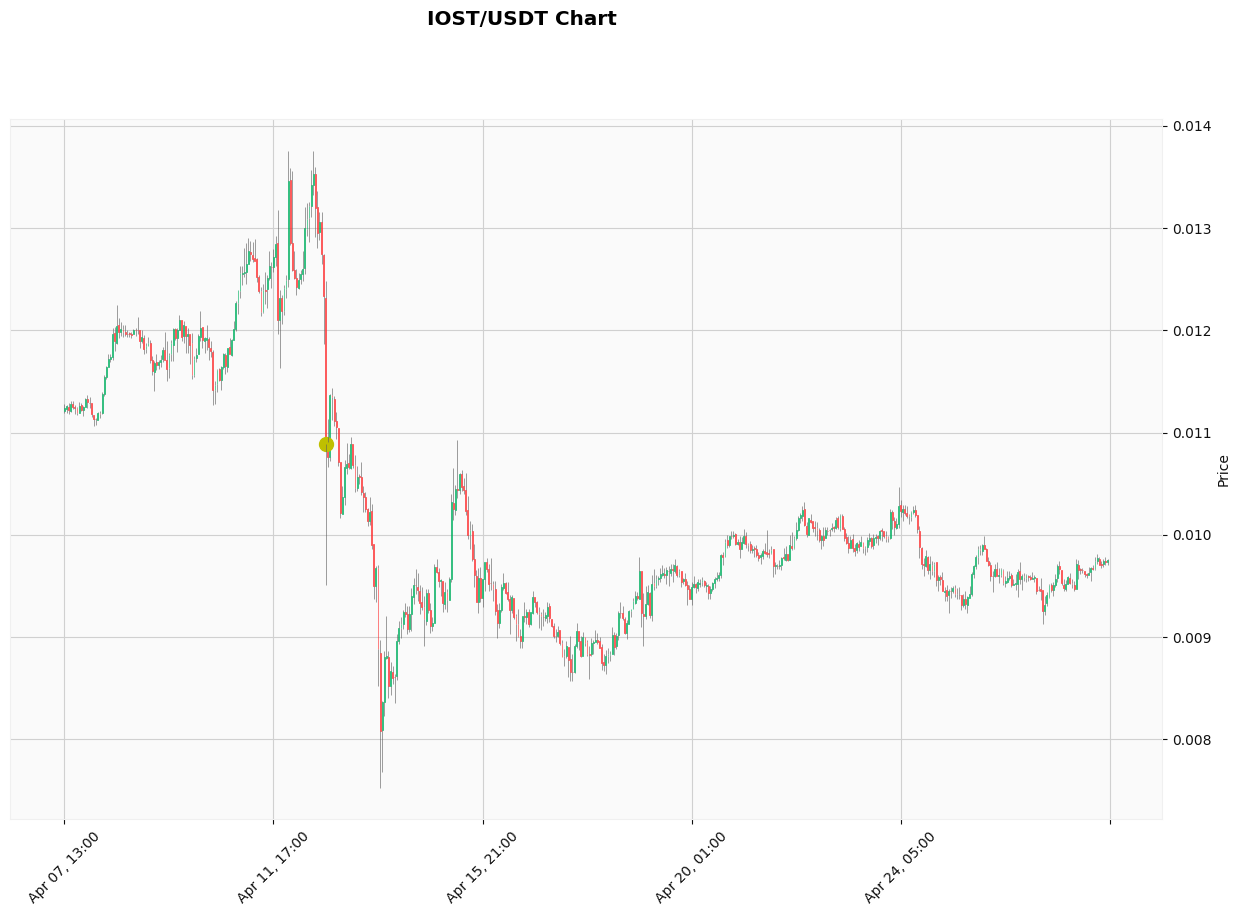

2024-04-12 18:00:00 买入


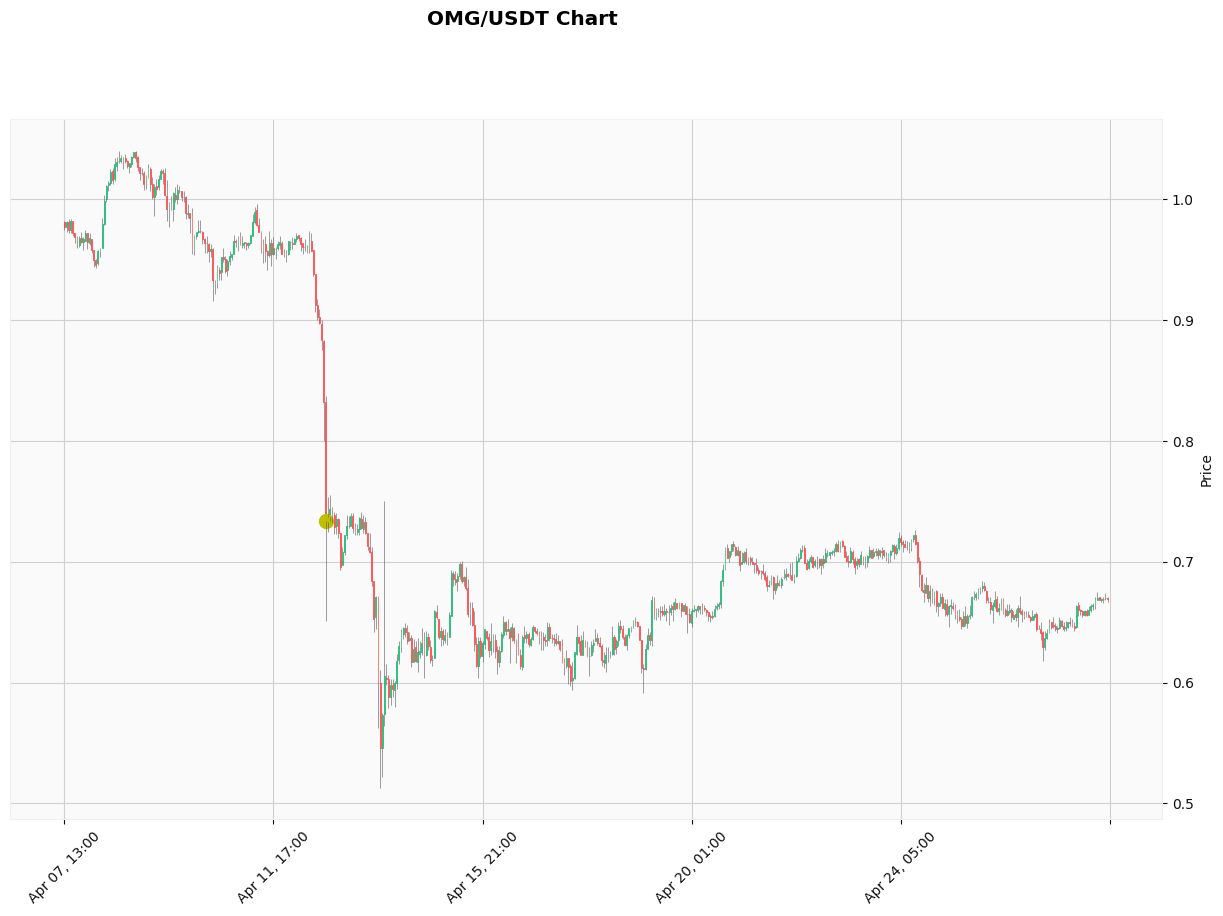

2022-12-15 04:00:00 买入


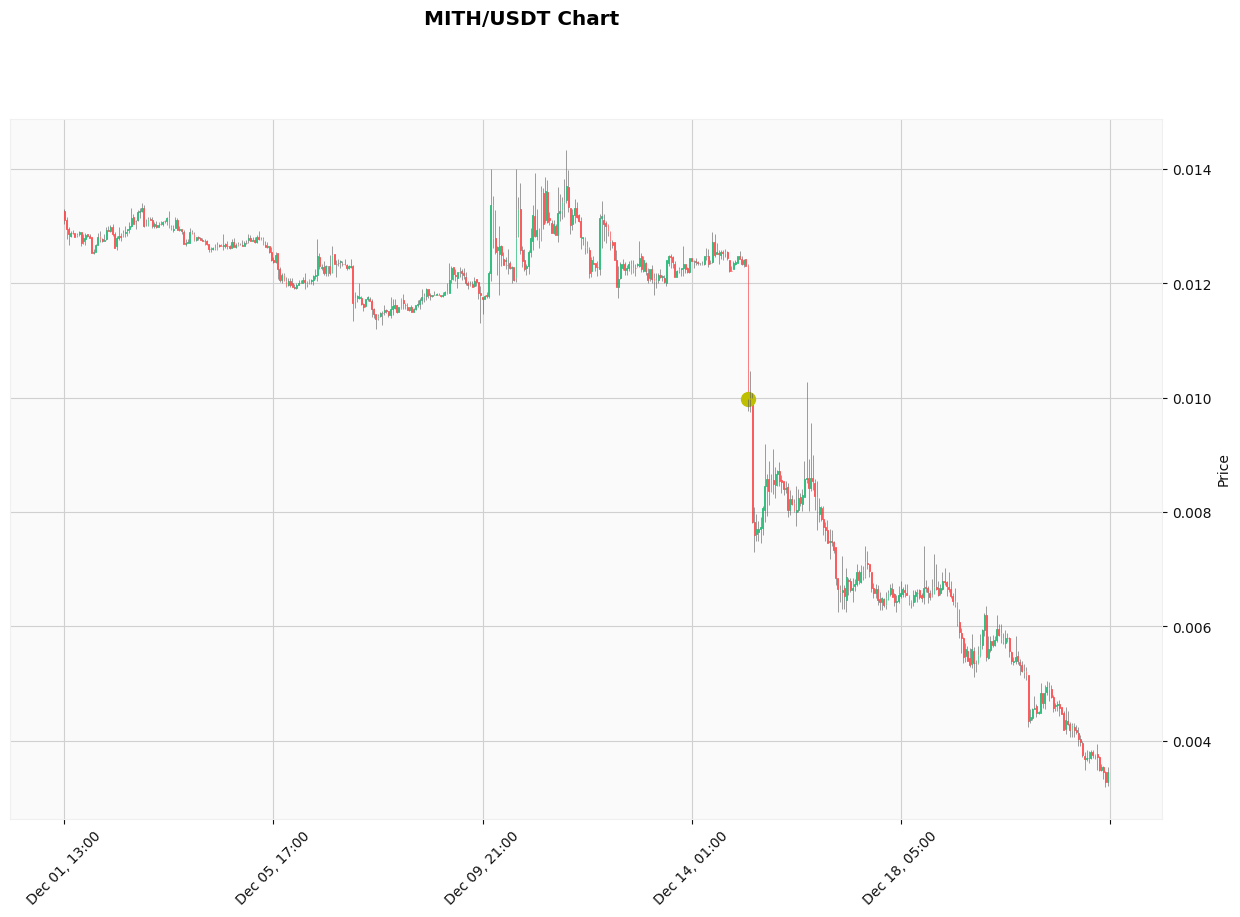

2022-12-16 10:00:00 买入


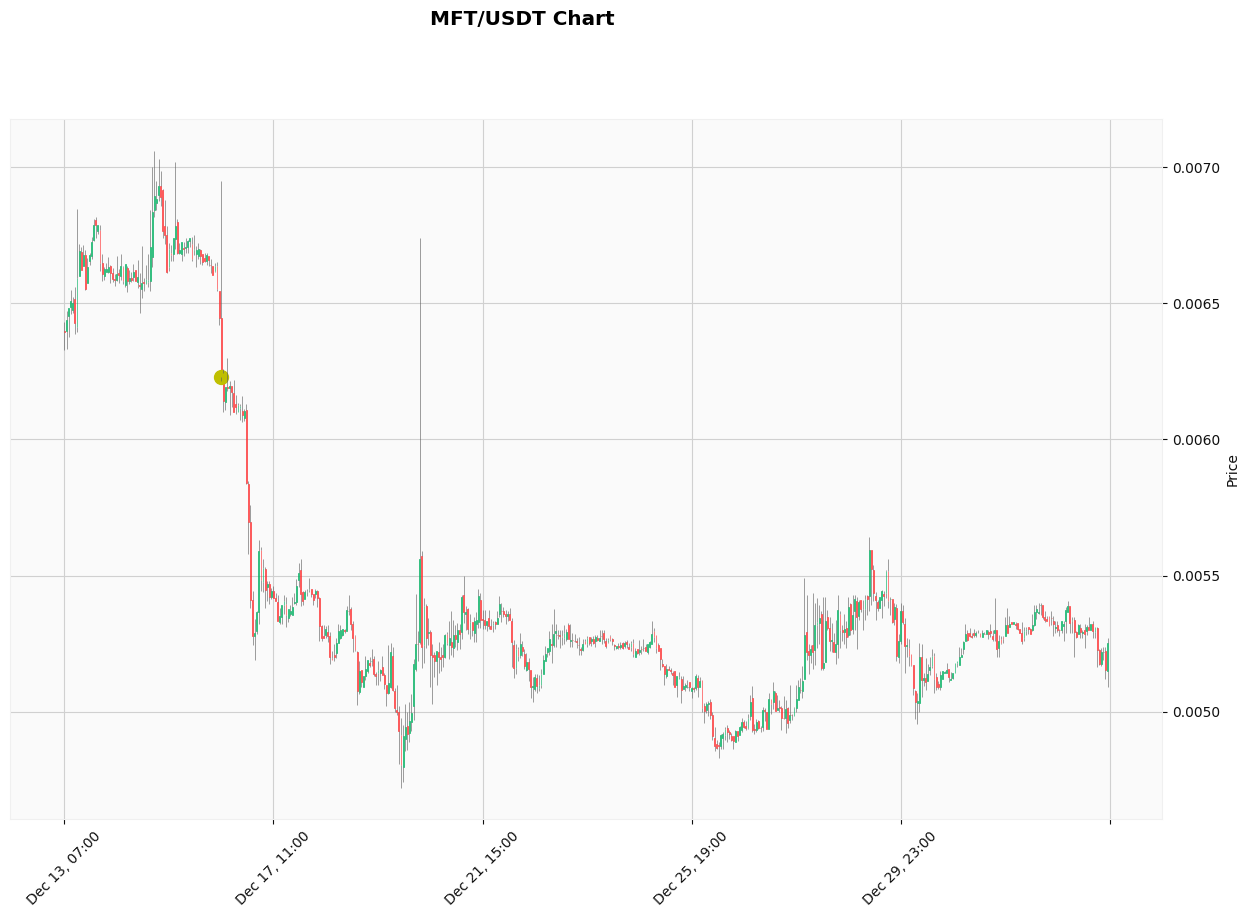

2024-04-12 18:00:00 买入


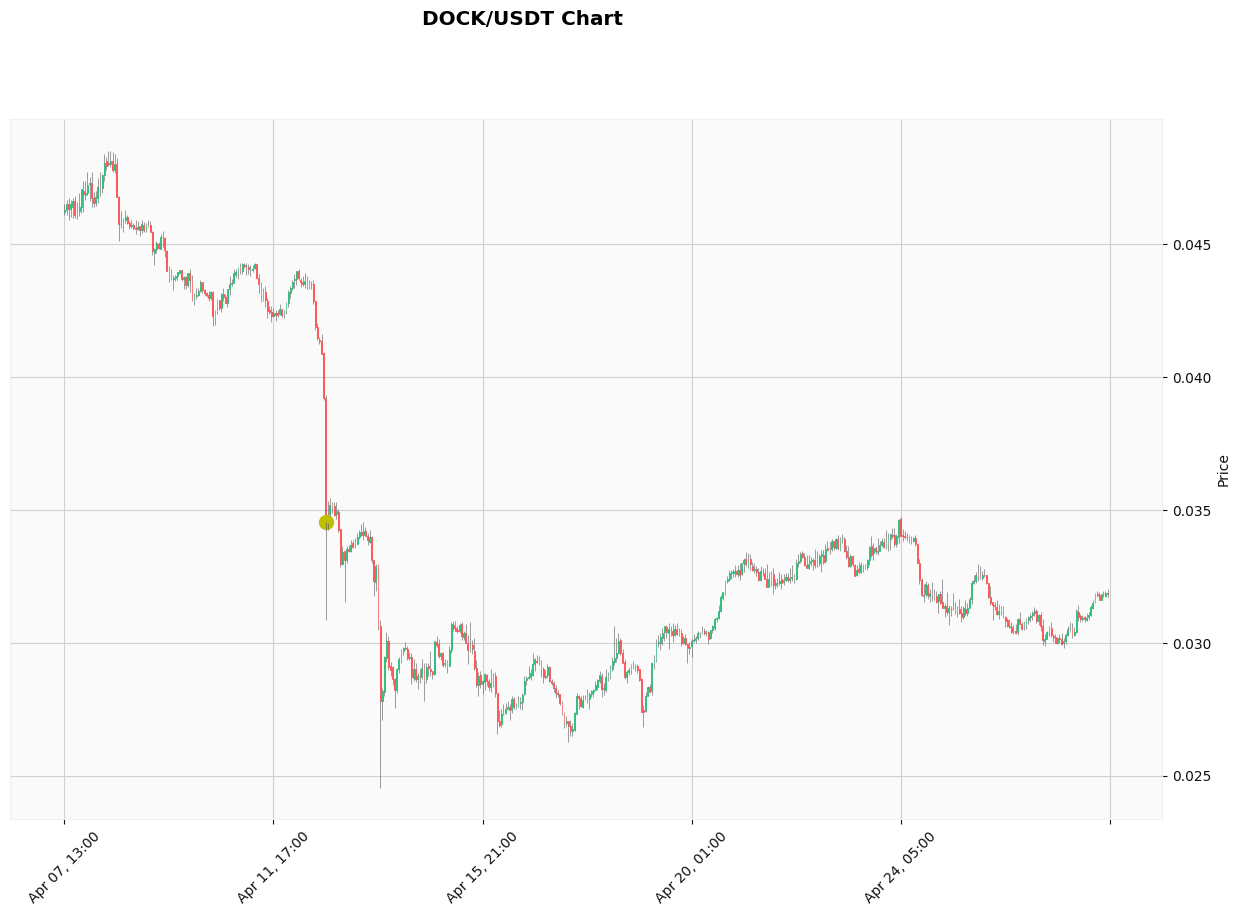

2024-04-12 18:00:00 买入


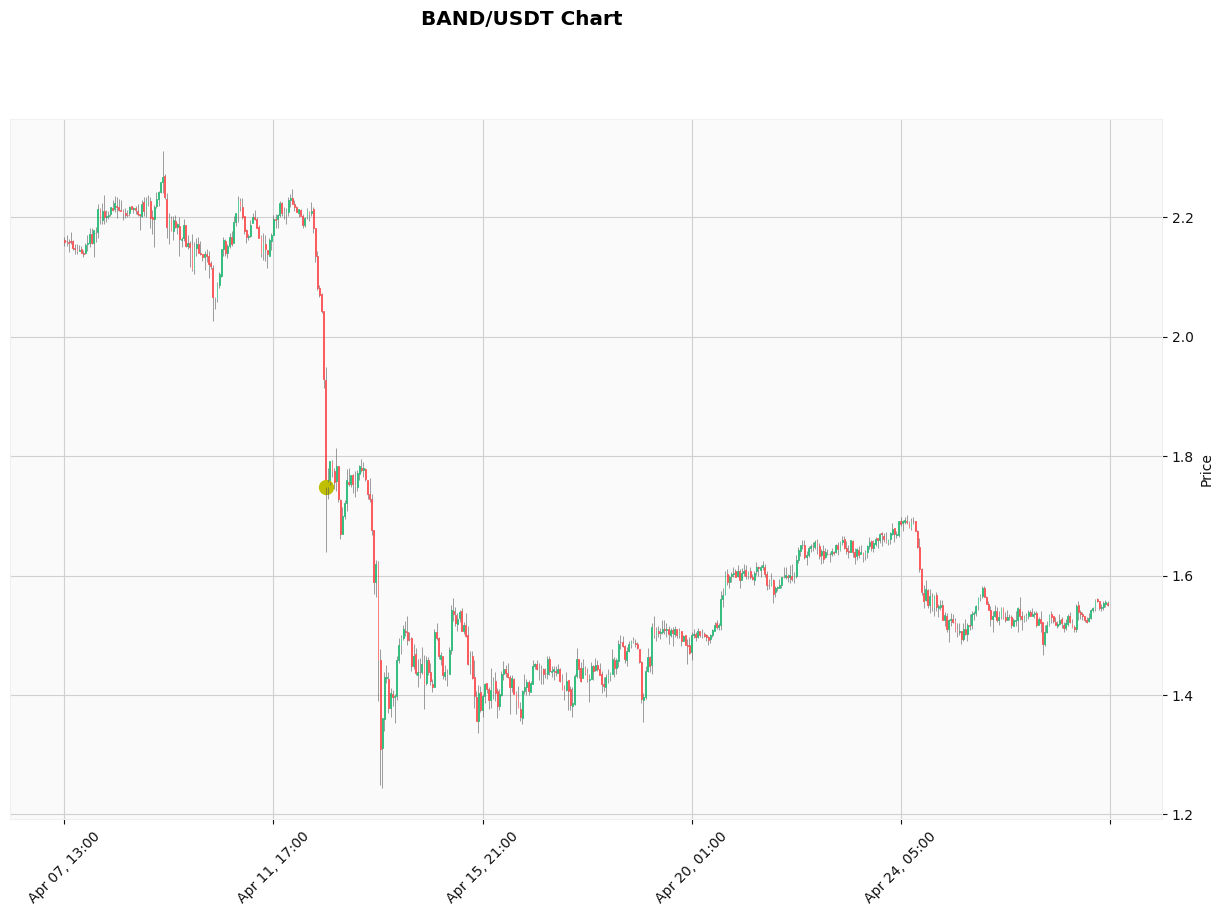

2024-04-12 18:00:00 买入


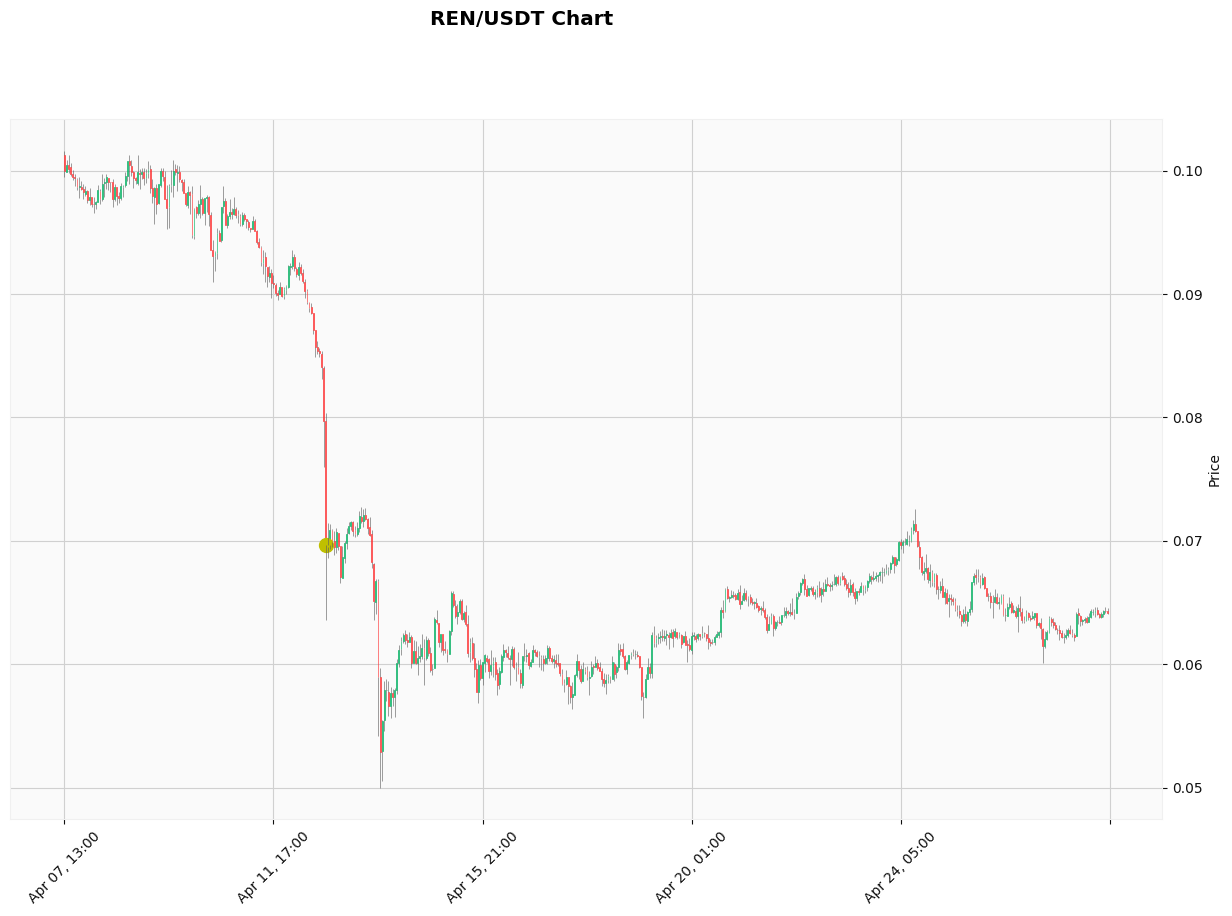

2020-10-30 15:00:00 买入


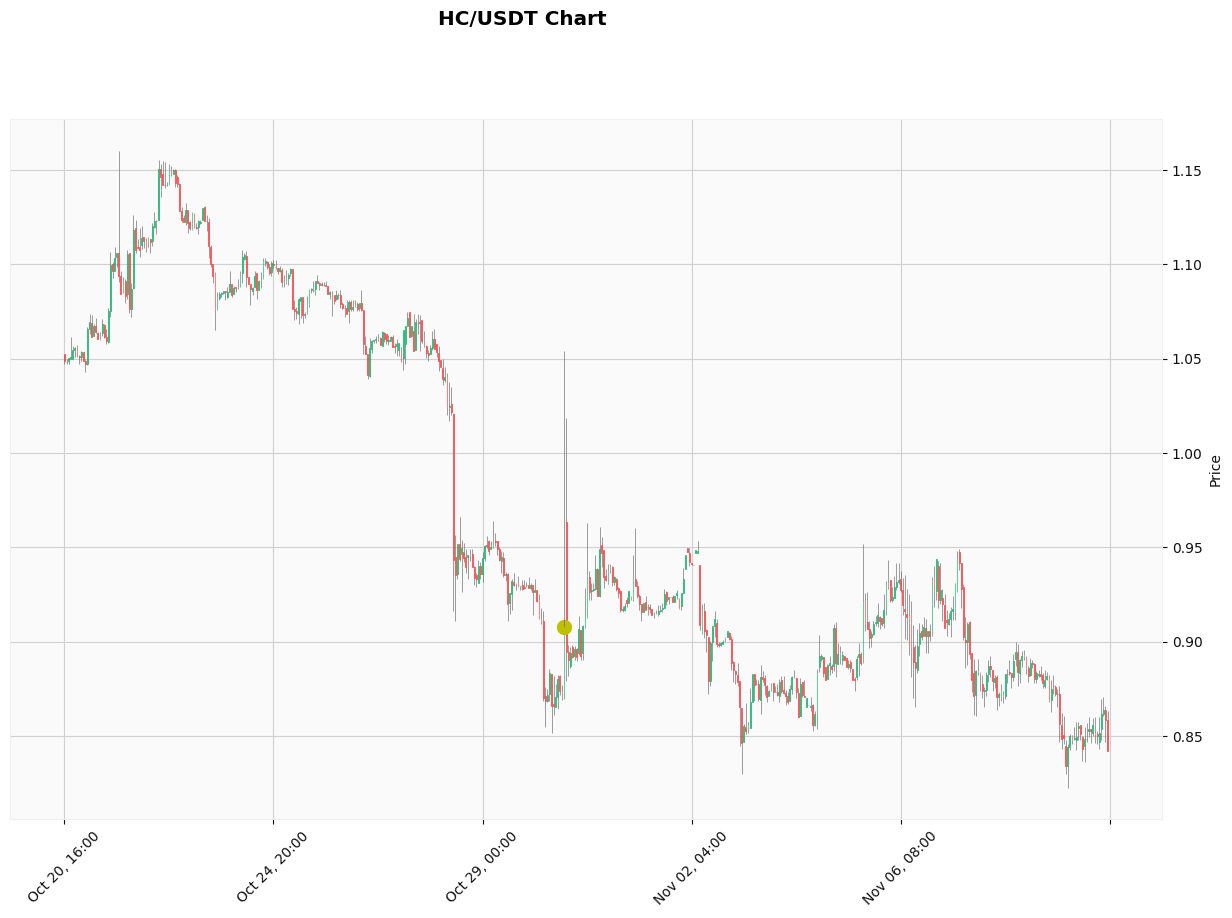

2024-04-24 00:00:00 买入
2024-04-24 03:00:00 卖出, 收益率: 6.145251396648064%
2024-04-24 05:00:00 买入


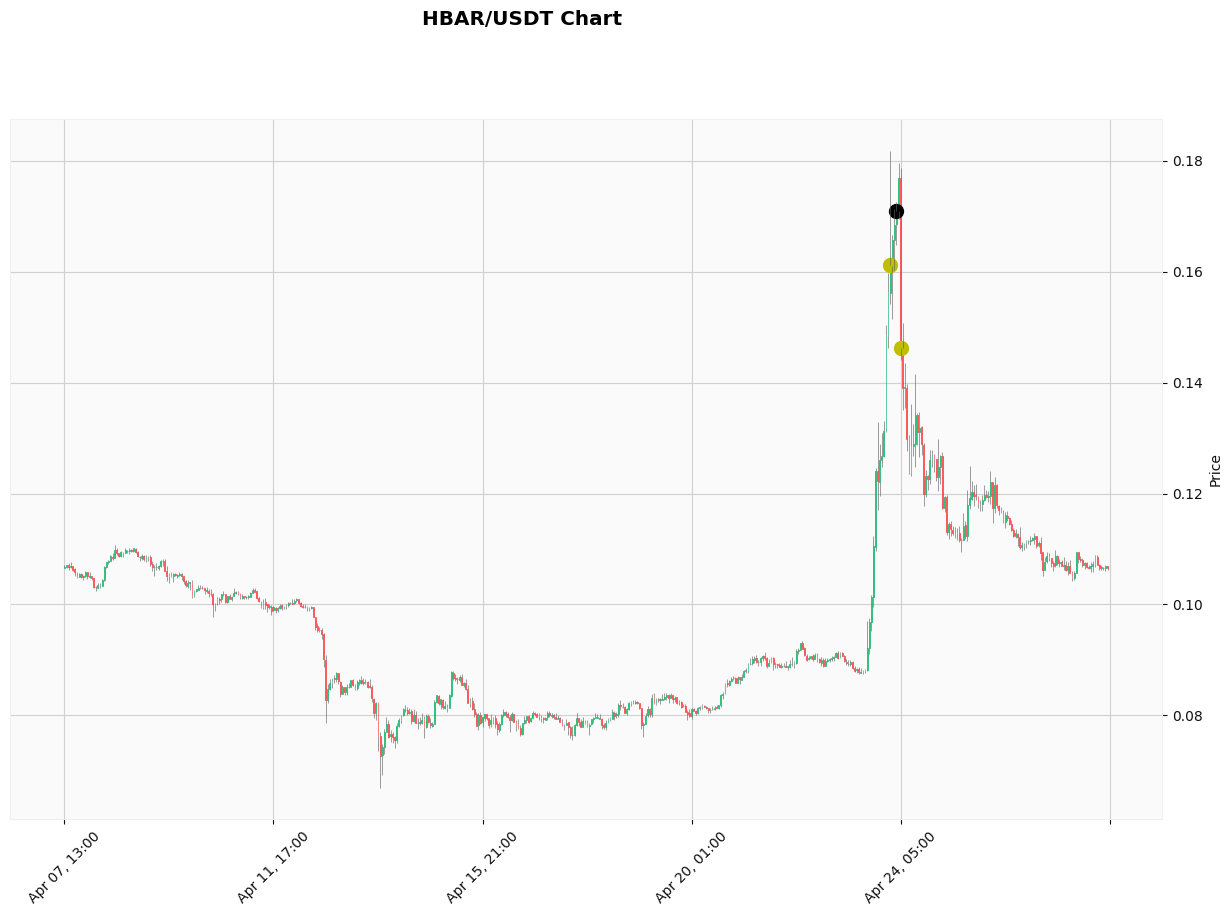

2024-03-20 06:00:00 买入
2024-03-20 08:00:00 卖出, 收益率: 16.11341632088518%
2024-03-20 09:00:00 买入
2024-03-21 07:00:00 卖出, 收益率: 6.254071661237788%
2024-03-21 08:00:00 买入


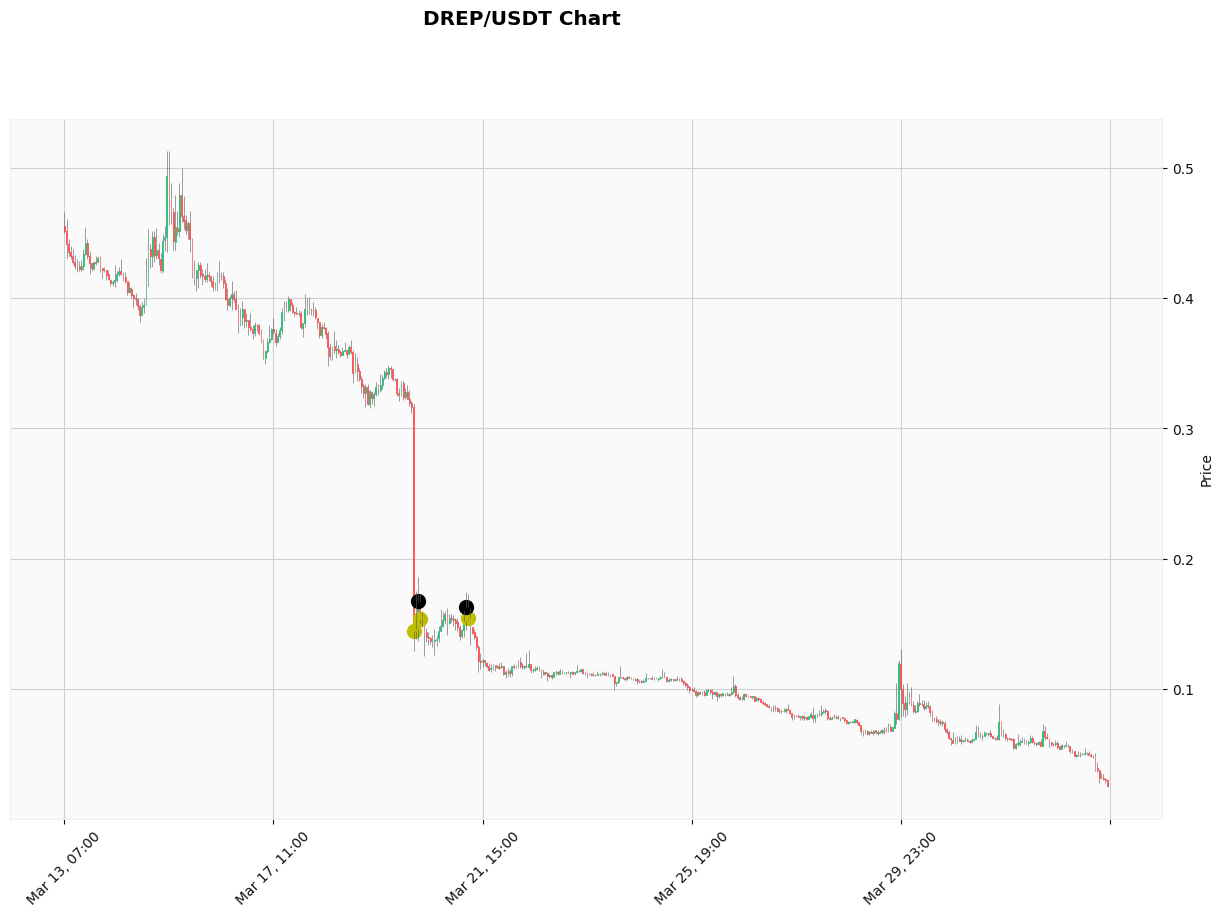

2020-03-12 10:00:00 买入
2020-03-12 11:00:00 卖出, 收益率: 21.90691760629305%
2020-03-12 12:00:00 买入


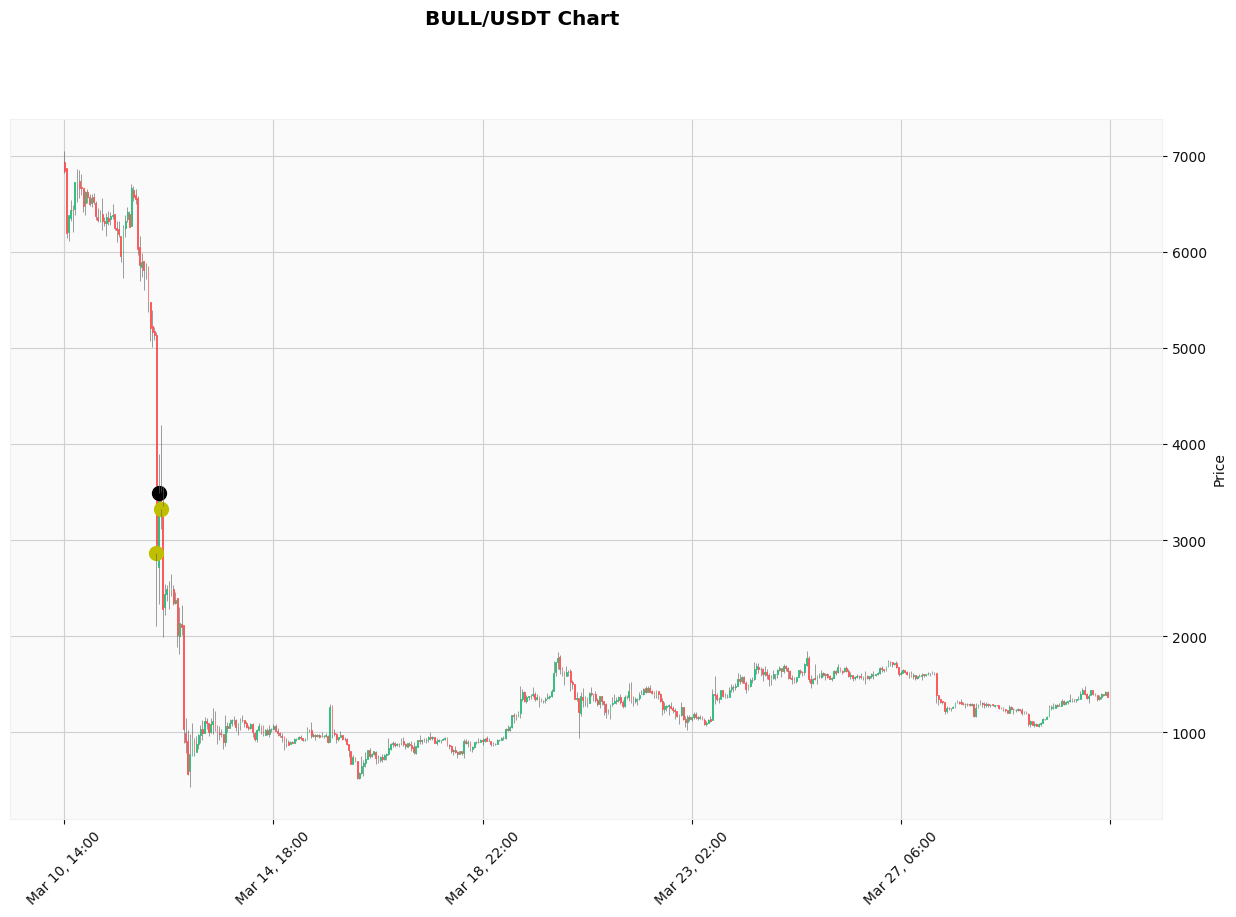

2020-03-13 02:00:00 买入


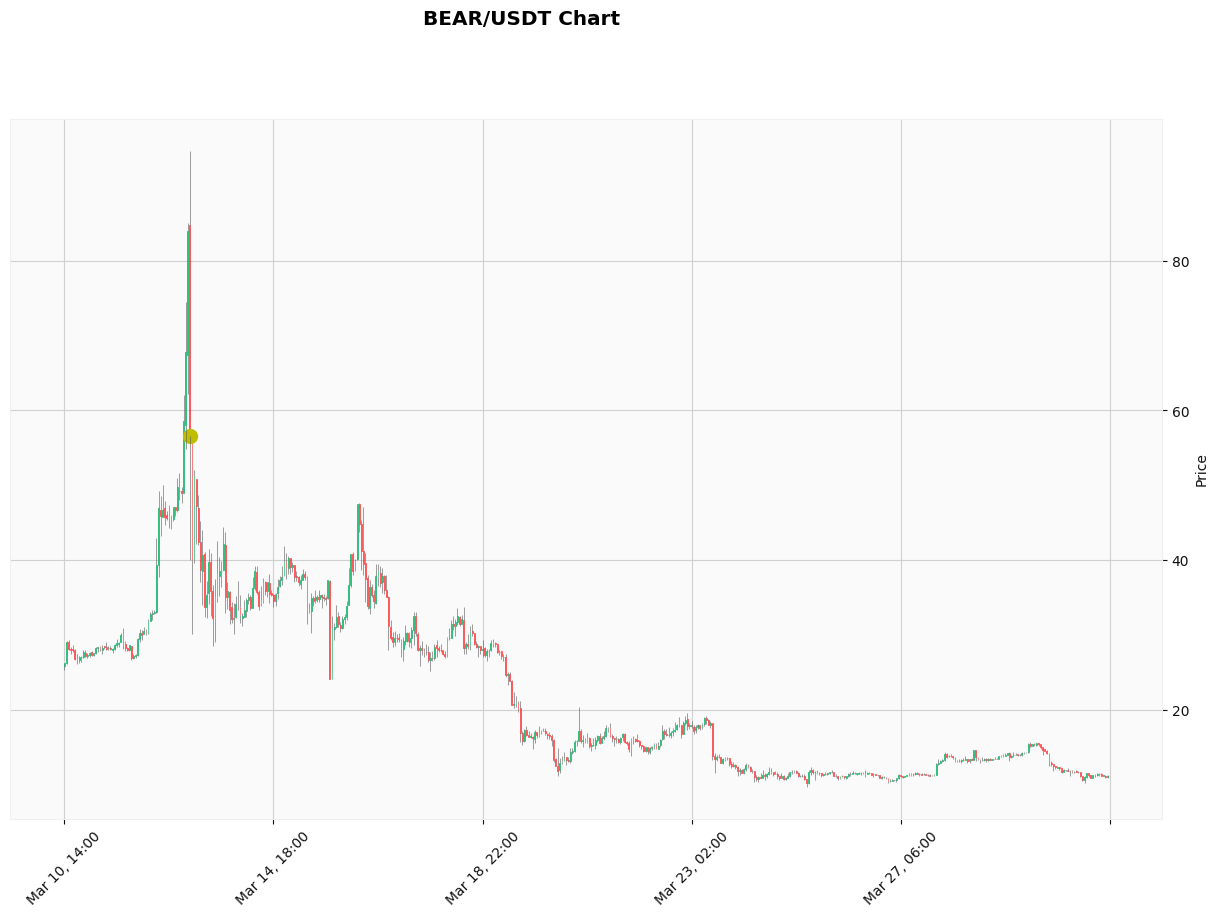

2020-03-10 15:00:00 买入
2020-03-10 17:00:00 卖出, 收益率: 8.033139895616628%
2020-03-11 17:00:00 买入
2020-03-11 18:00:00 卖出, 收益率: 9.965578670853597%
2020-03-12 01:00:00 买入


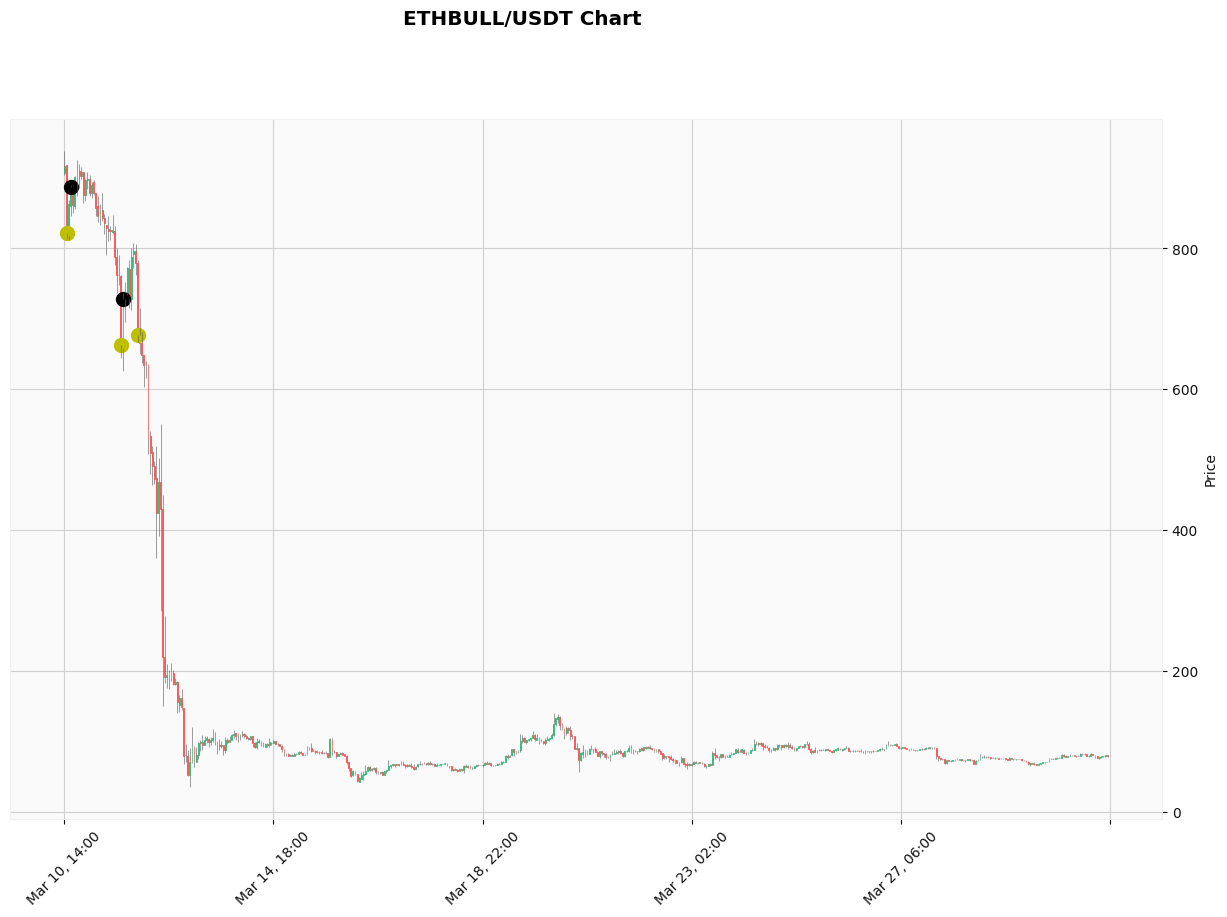

2020-03-12 10:00:00 买入
2020-03-12 11:00:00 卖出, 收益率: 37.341967314215225%
2020-03-13 02:00:00 买入


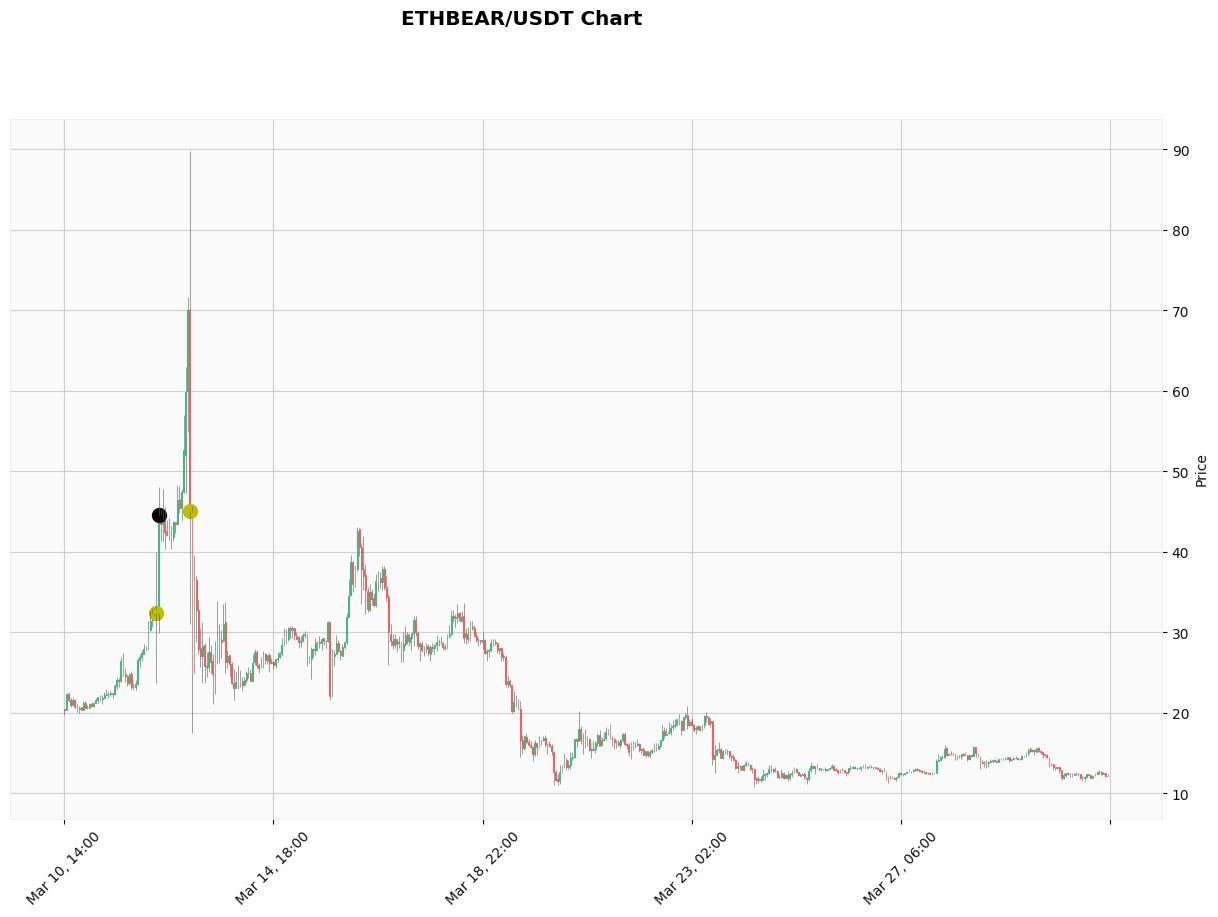

2022-10-13 04:00:00 买入
2022-10-18 14:00:00 卖出, 收益率: 14.0625%
2022-10-18 15:00:00 买入


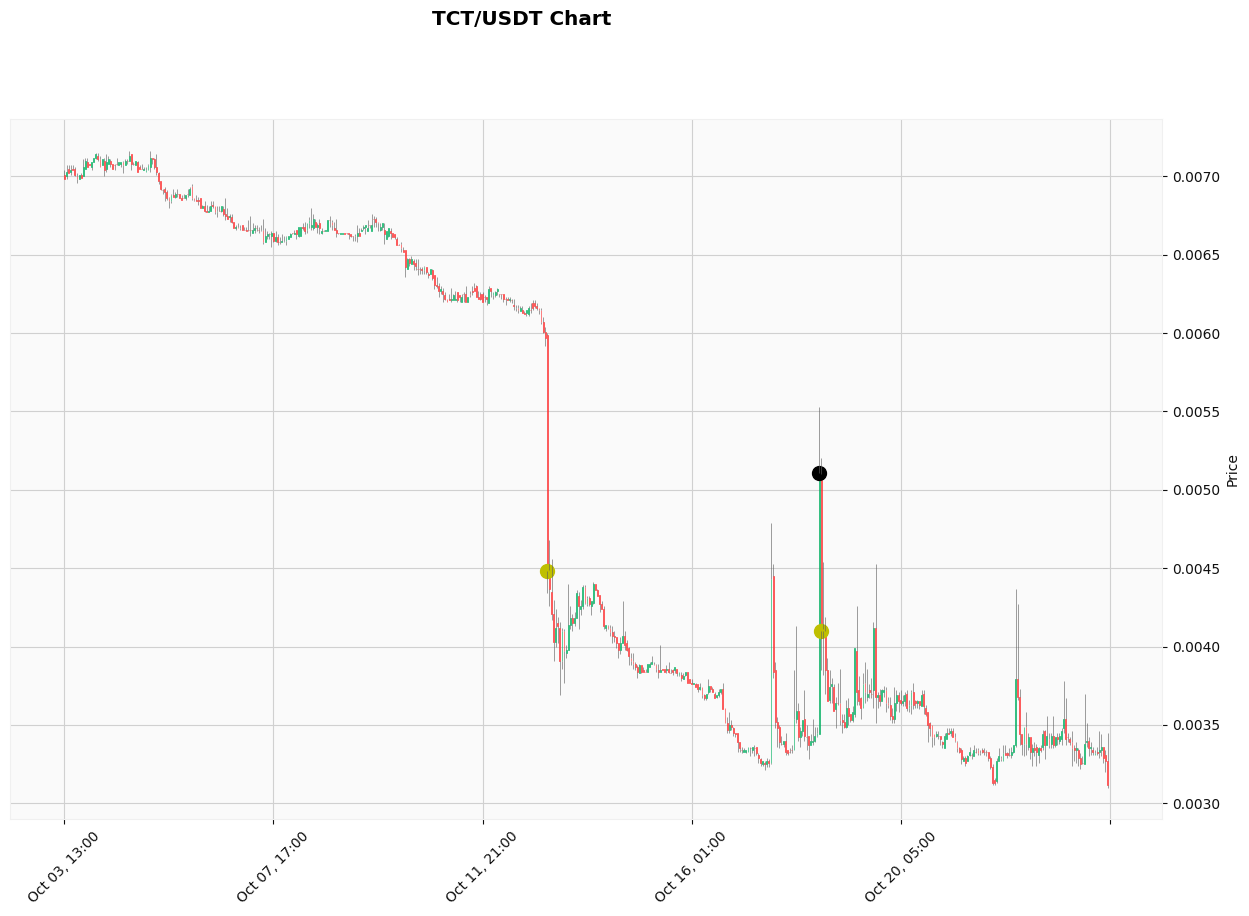

2024-04-07 22:00:00 买入


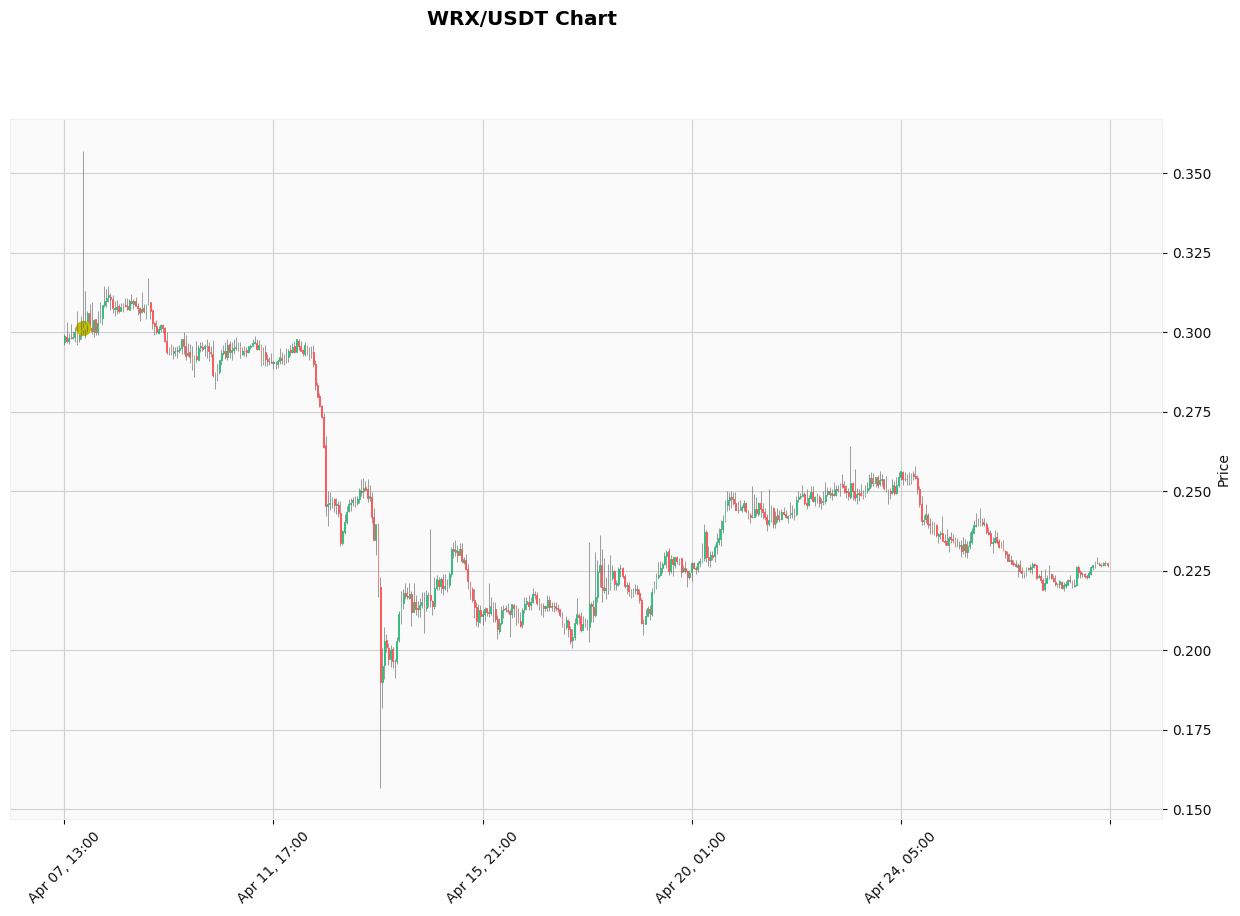

2023-11-27 06:00:00 买入
2023-11-27 08:00:00 卖出, 收益率: 10.929853181076666%
2023-11-27 09:00:00 买入
2023-11-28 07:00:00 卖出, 收益率: 25.528700906344405%
2023-11-28 08:00:00 买入
2023-11-30 15:00:00 卖出, 收益率: 8.309859154929558%
2023-11-30 16:00:00 买入


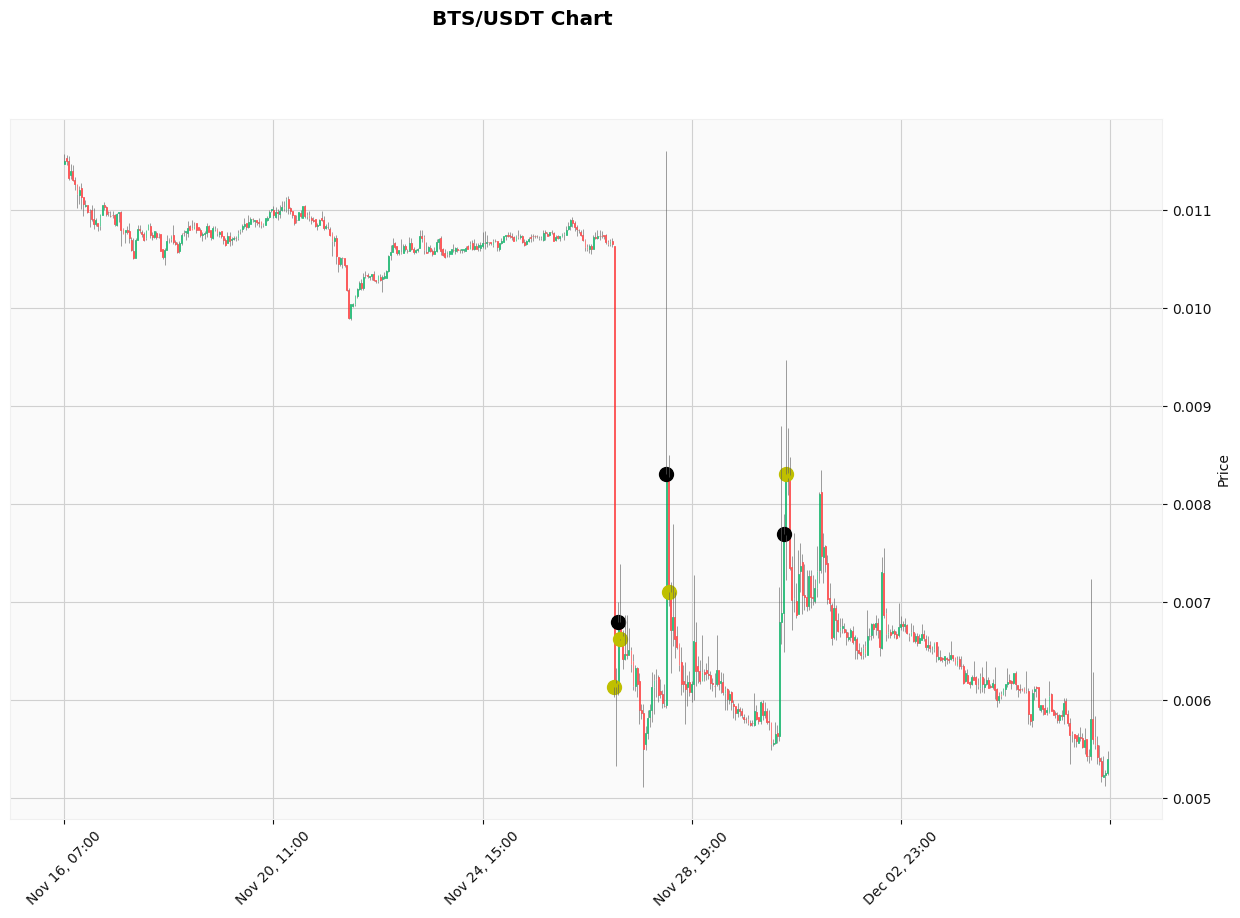

2020-03-12 01:00:00 买入


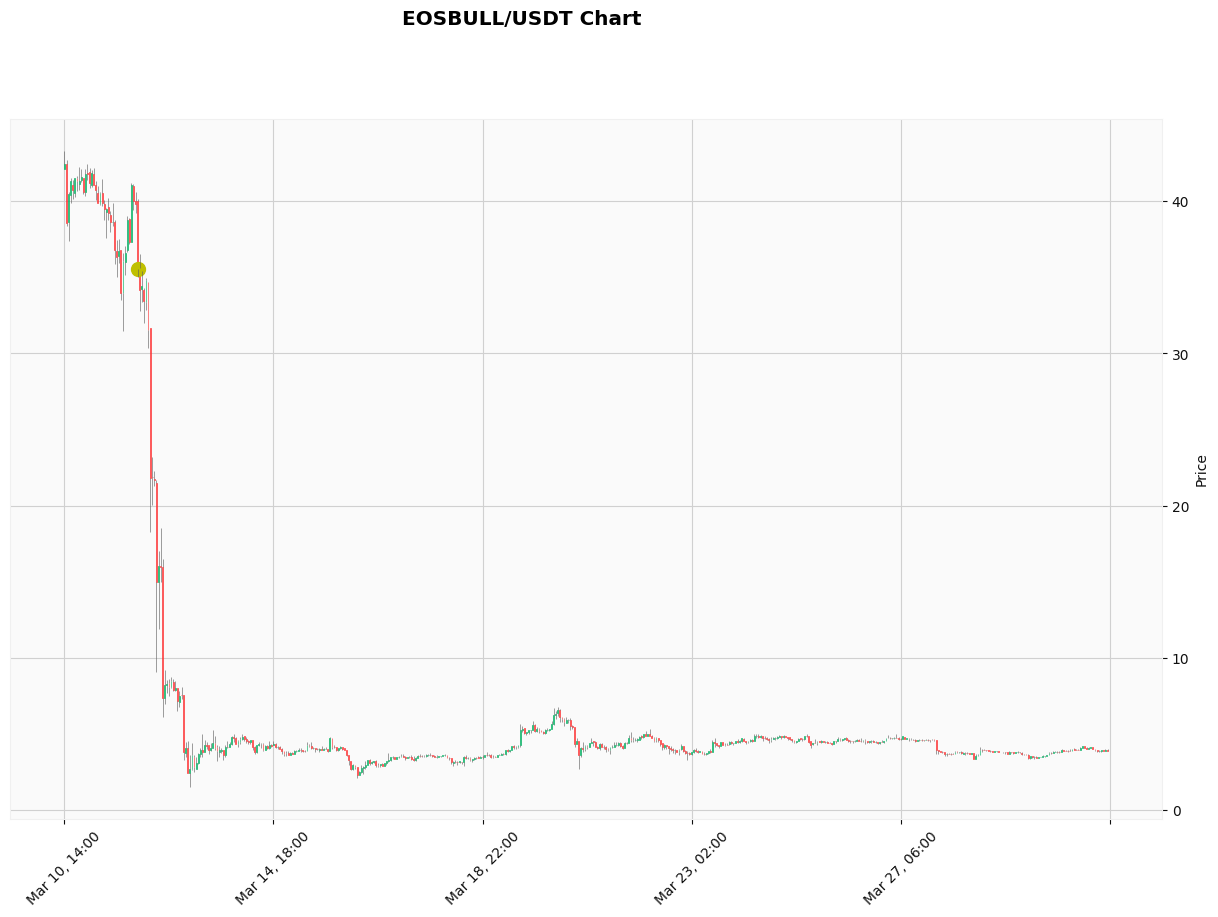

2020-03-12 10:00:00 买入
2020-03-12 11:00:00 卖出, 收益率: 9.712643678160916%
2020-03-13 02:00:00 买入


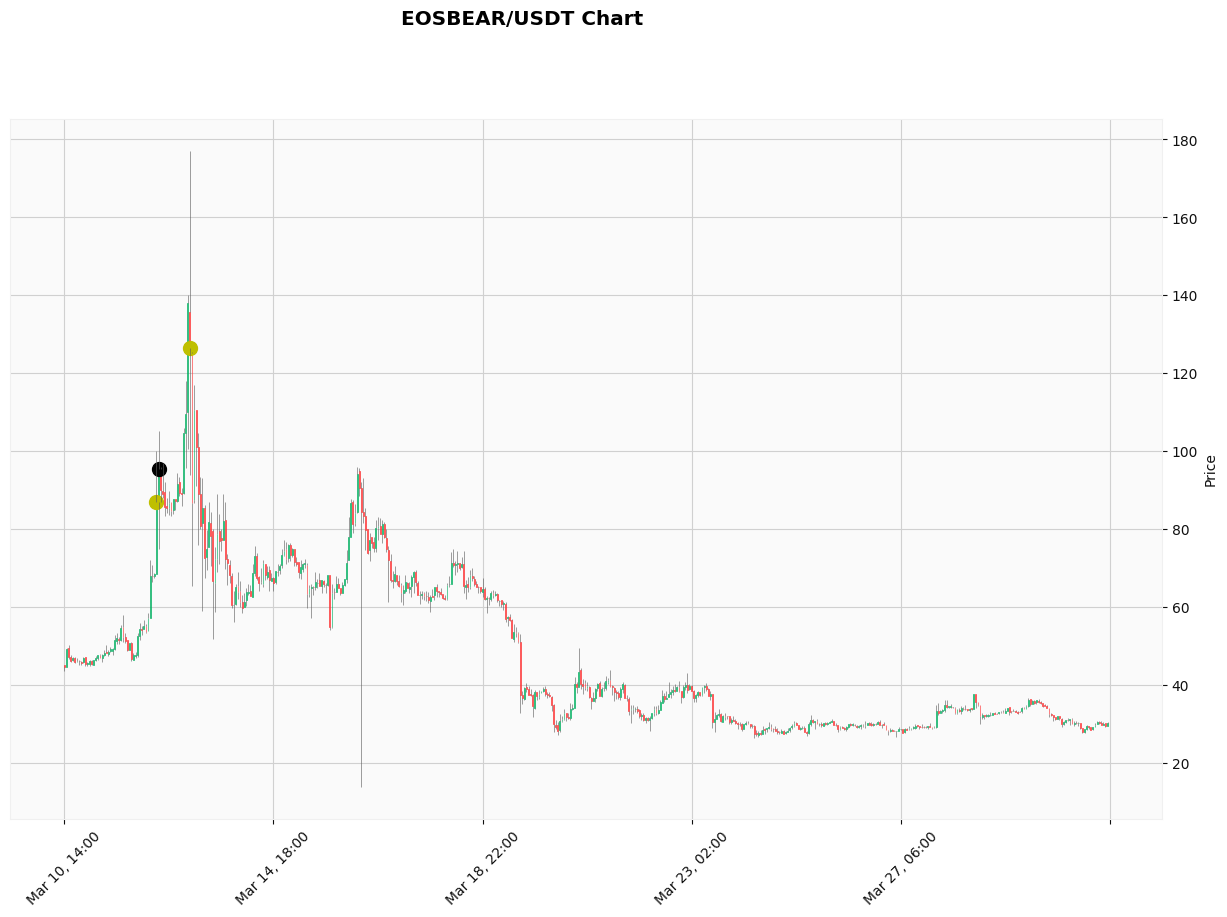

2020-03-12 07:00:00 买入


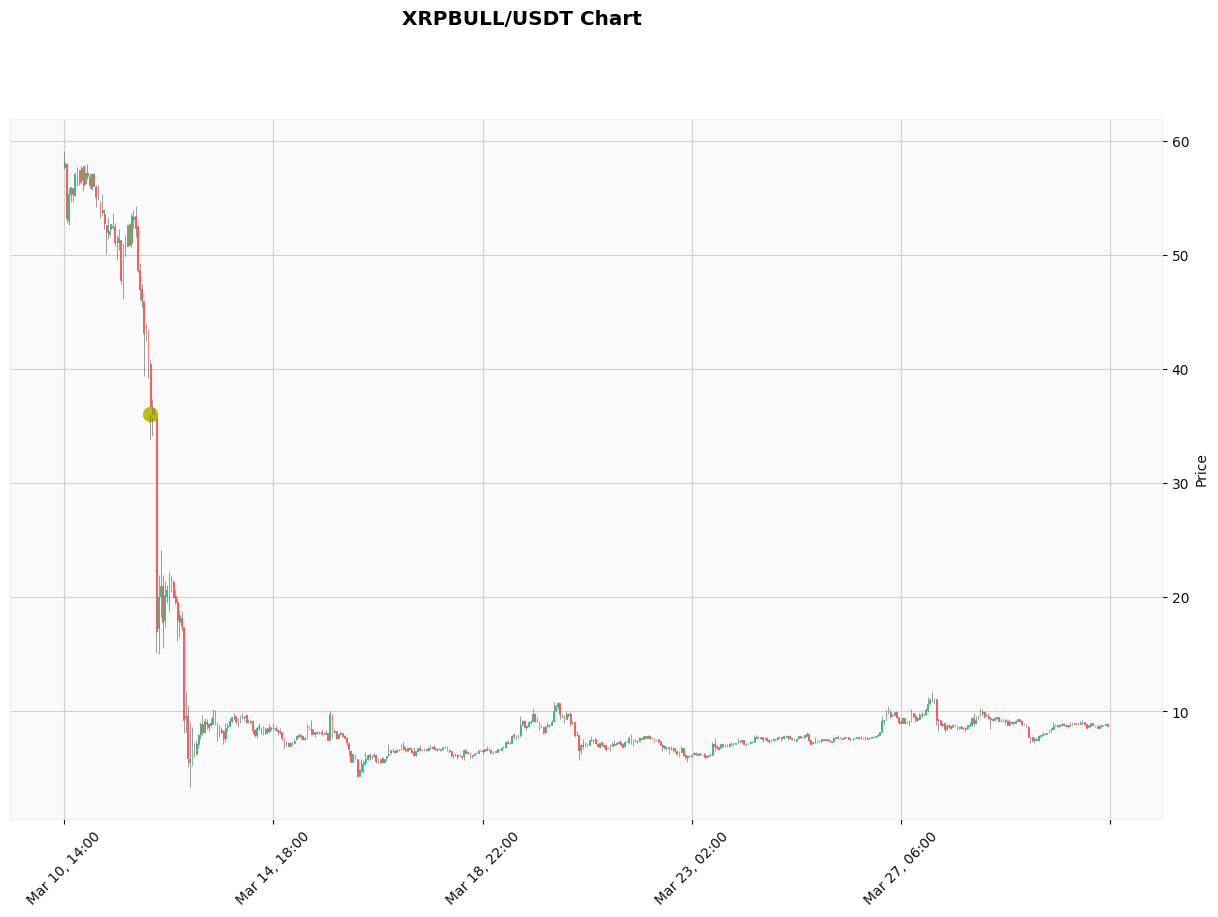

2020-03-12 12:00:00 买入
2020-03-12 22:00:00 卖出, 收益率: 5.973887240356092%
2020-03-13 02:00:00 买入


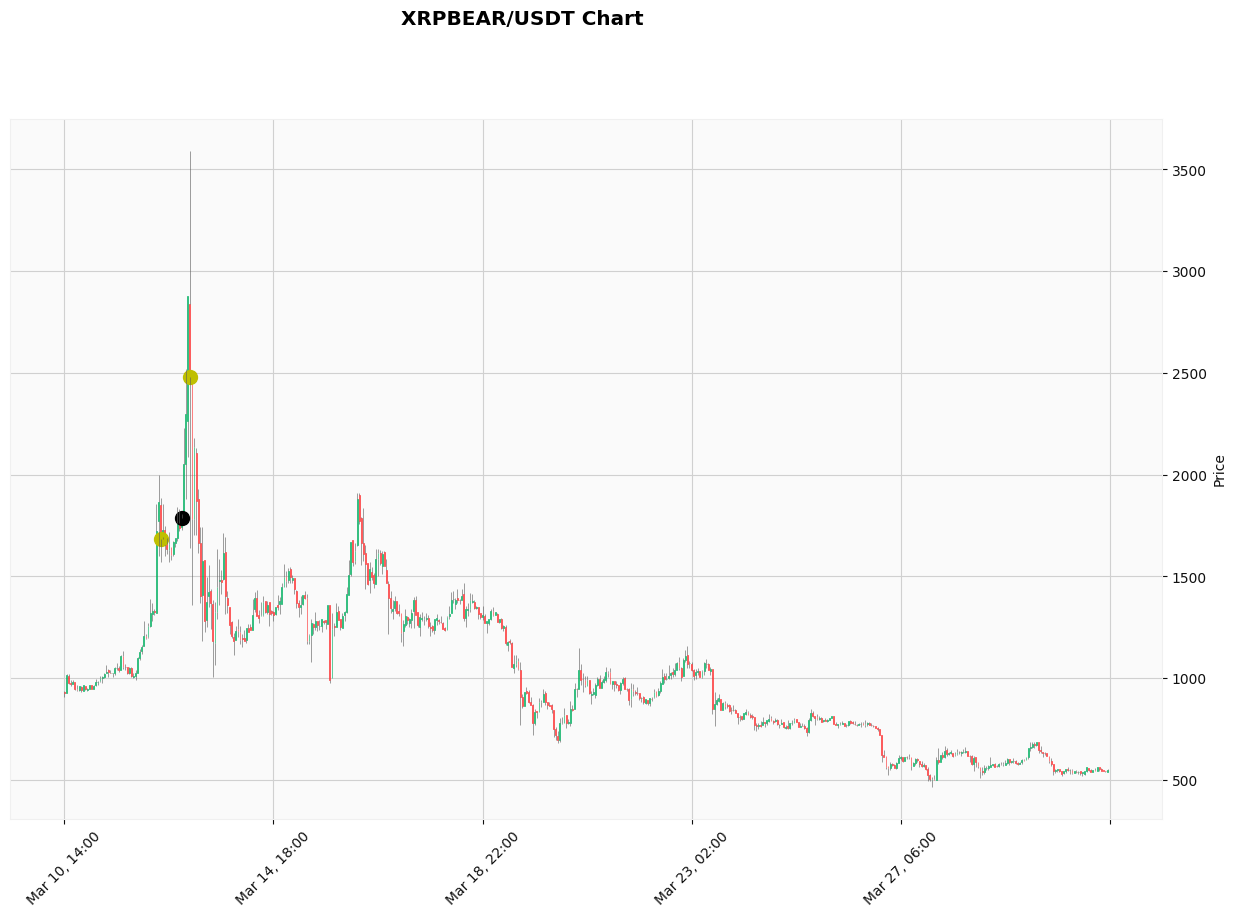

2023-02-06 15:00:00 买入


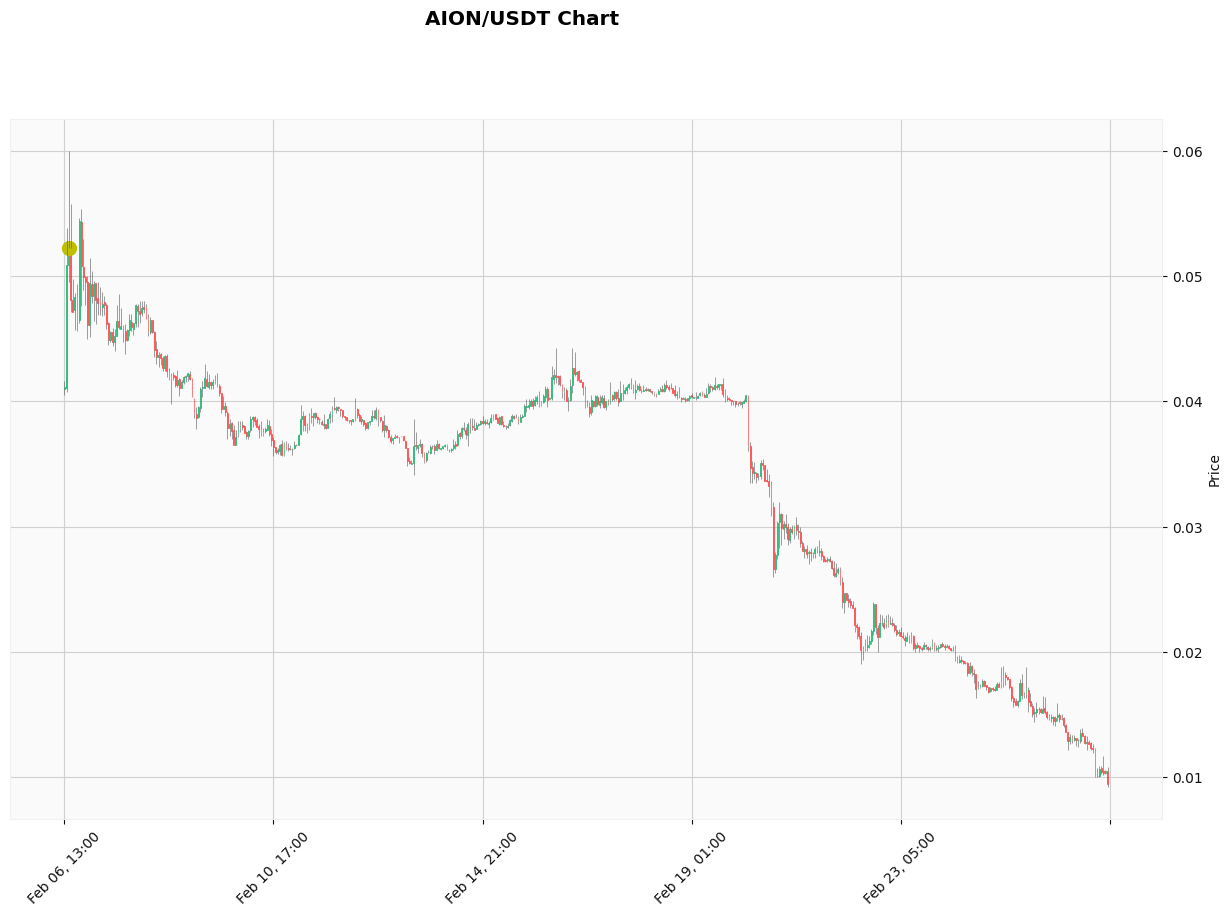

2020-03-12 01:00:00 买入


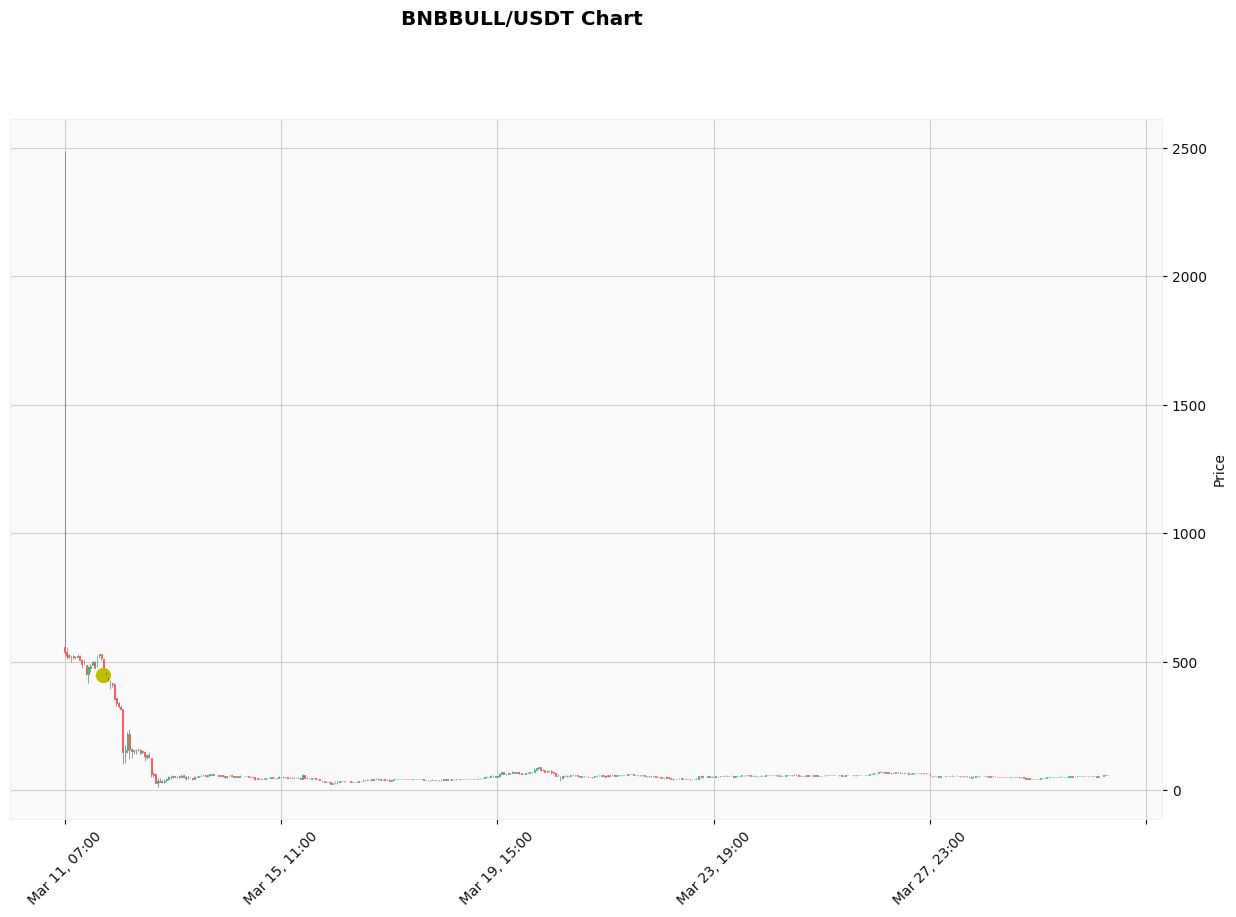

2020-03-13 02:00:00 买入
2020-03-13 03:00:00 卖出, 收益率: 6.676470588235304%
2020-03-13 05:00:00 买入


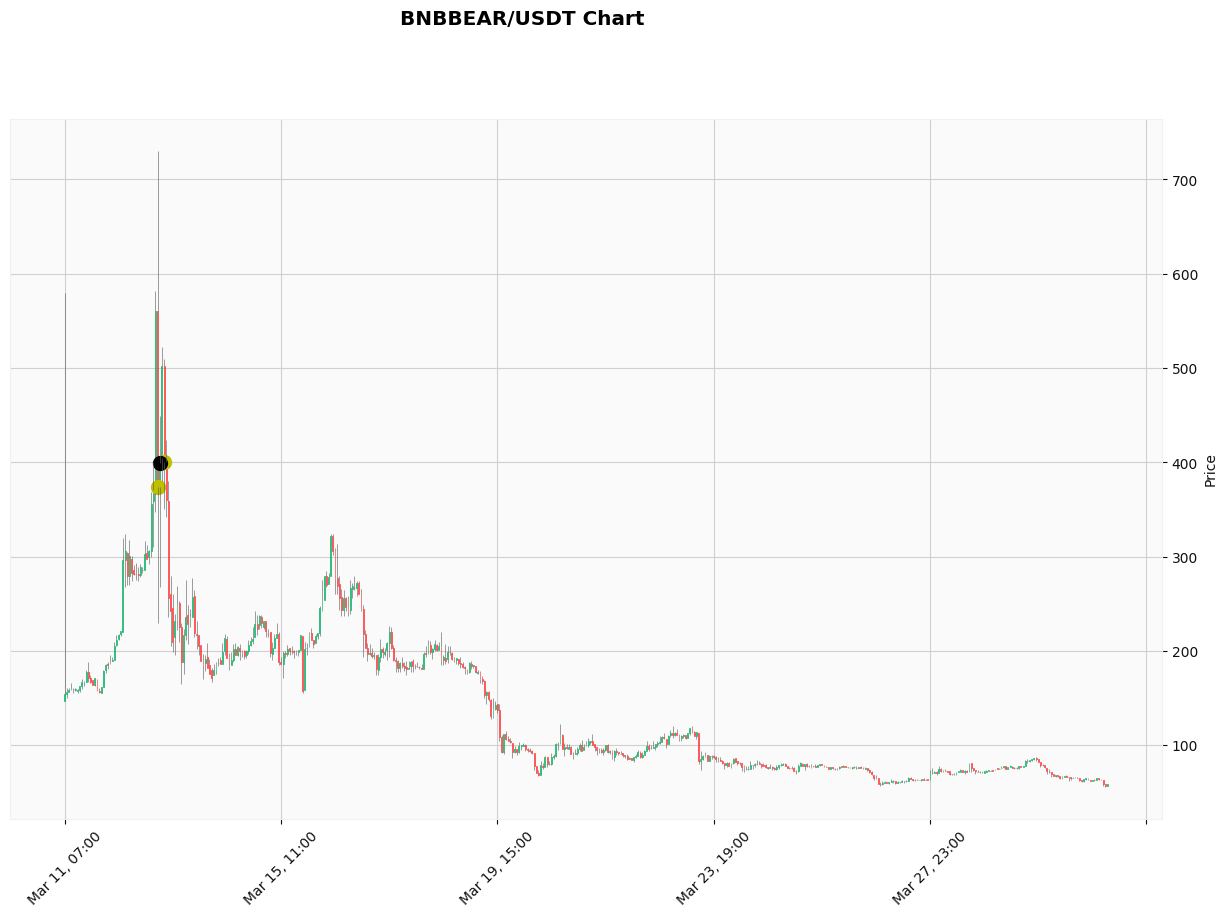

2023-11-27 06:00:00 买入
2023-11-27 07:00:00 卖出, 收益率: 7.008368200836827%
2023-11-27 12:00:00 买入


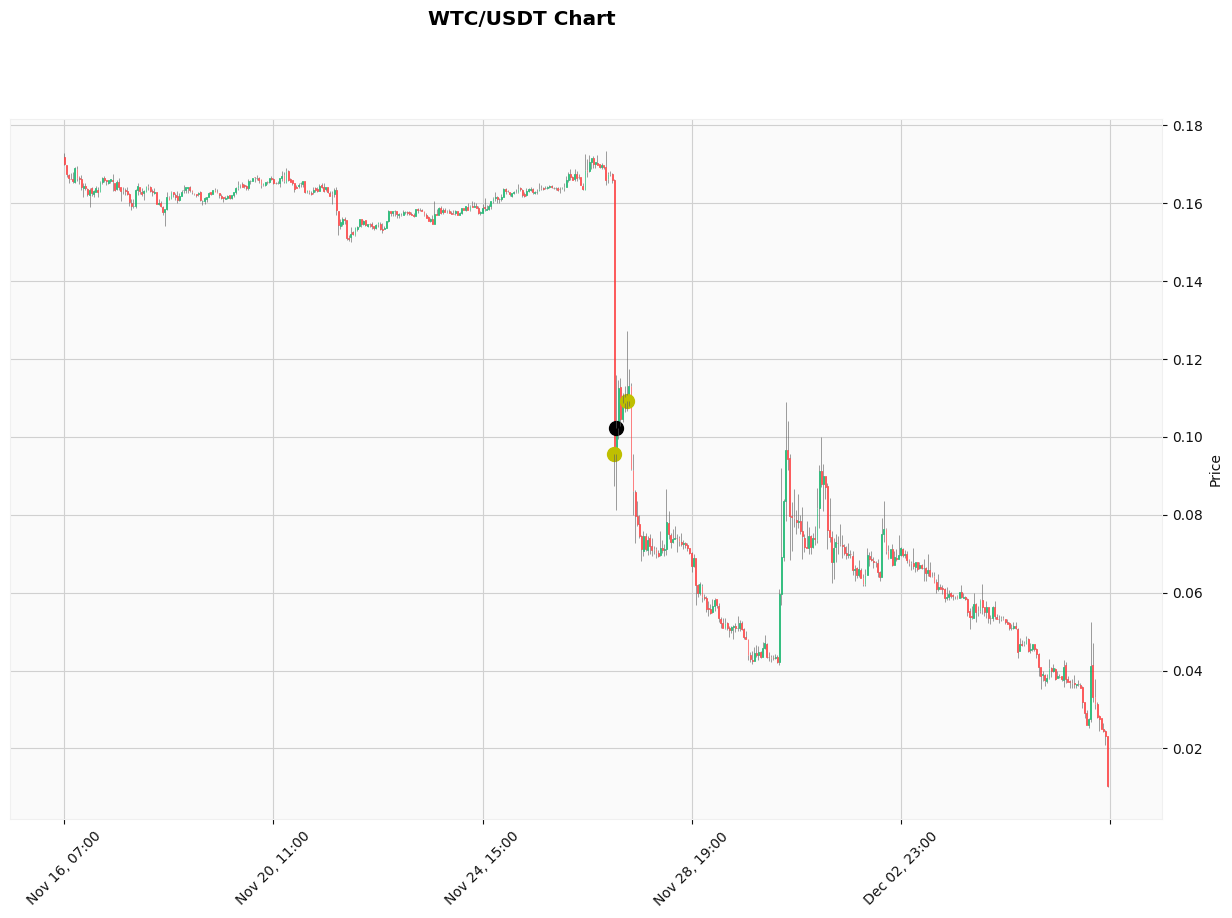

2021-01-07 18:00:00 买入
2021-01-08 08:00:00 卖出, 收益率: 10.318840579710141%
2021-01-18 10:00:00 买入
2021-01-18 14:00:00 卖出, 收益率: 30.279169649248377%
2021-01-18 15:00:00 买入


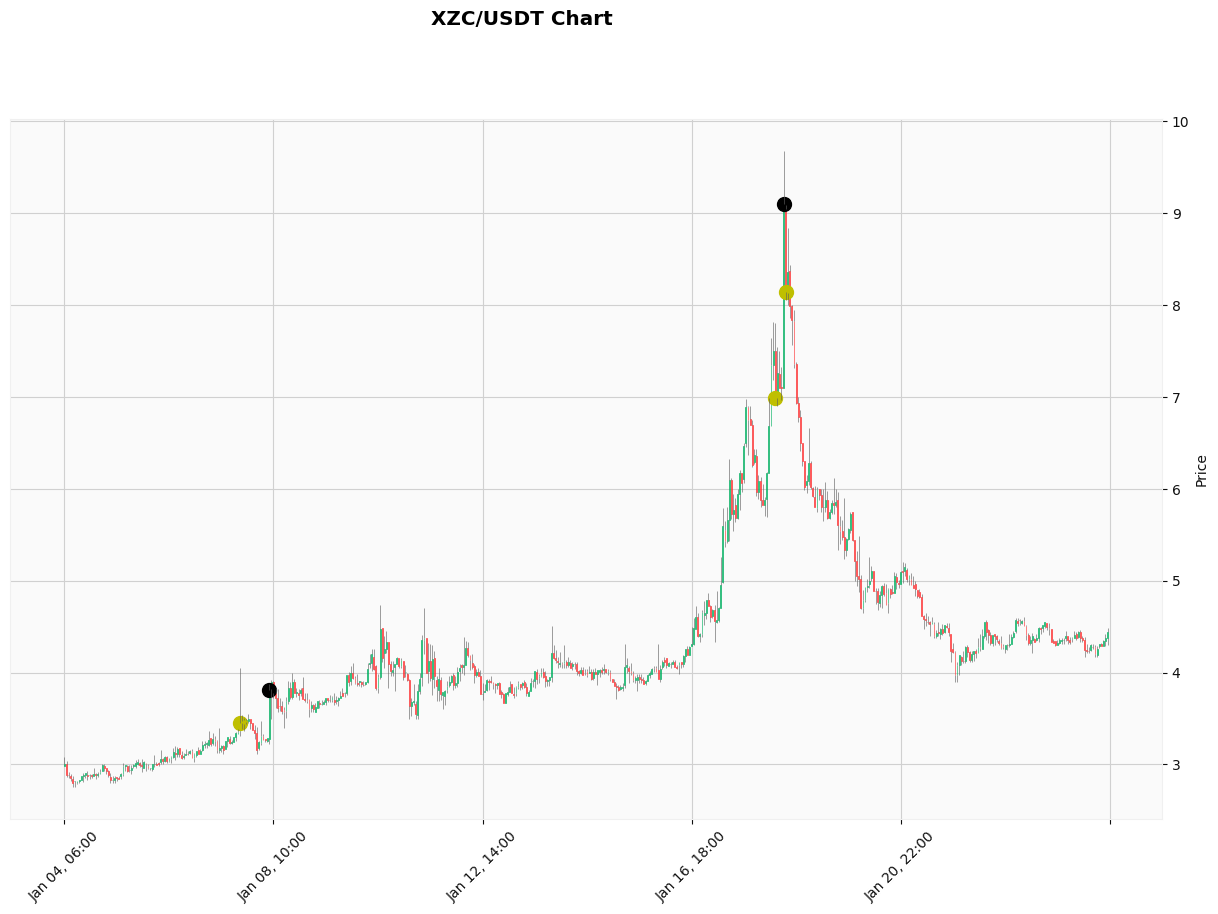

2022-04-04 21:00:00 买入


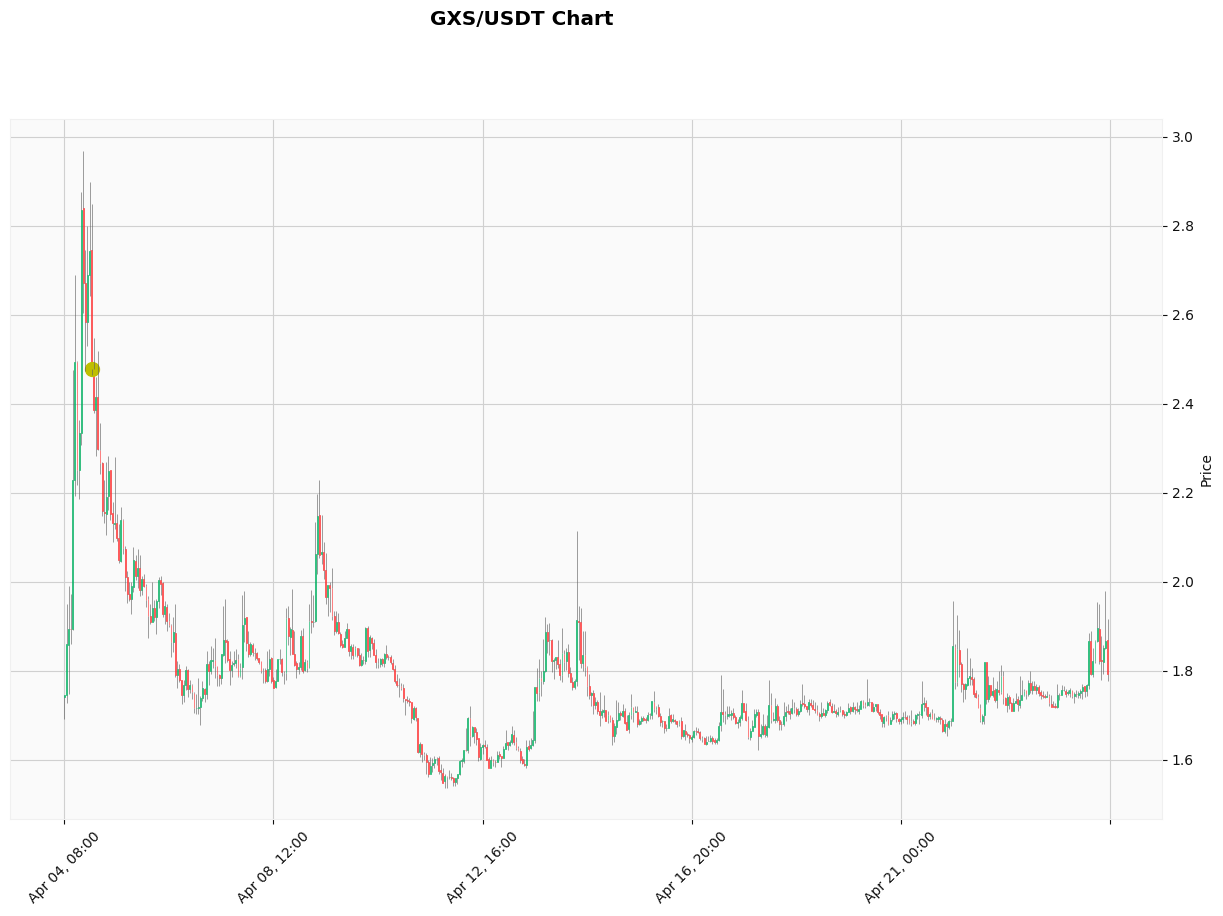

2022-12-10 16:00:00 买入


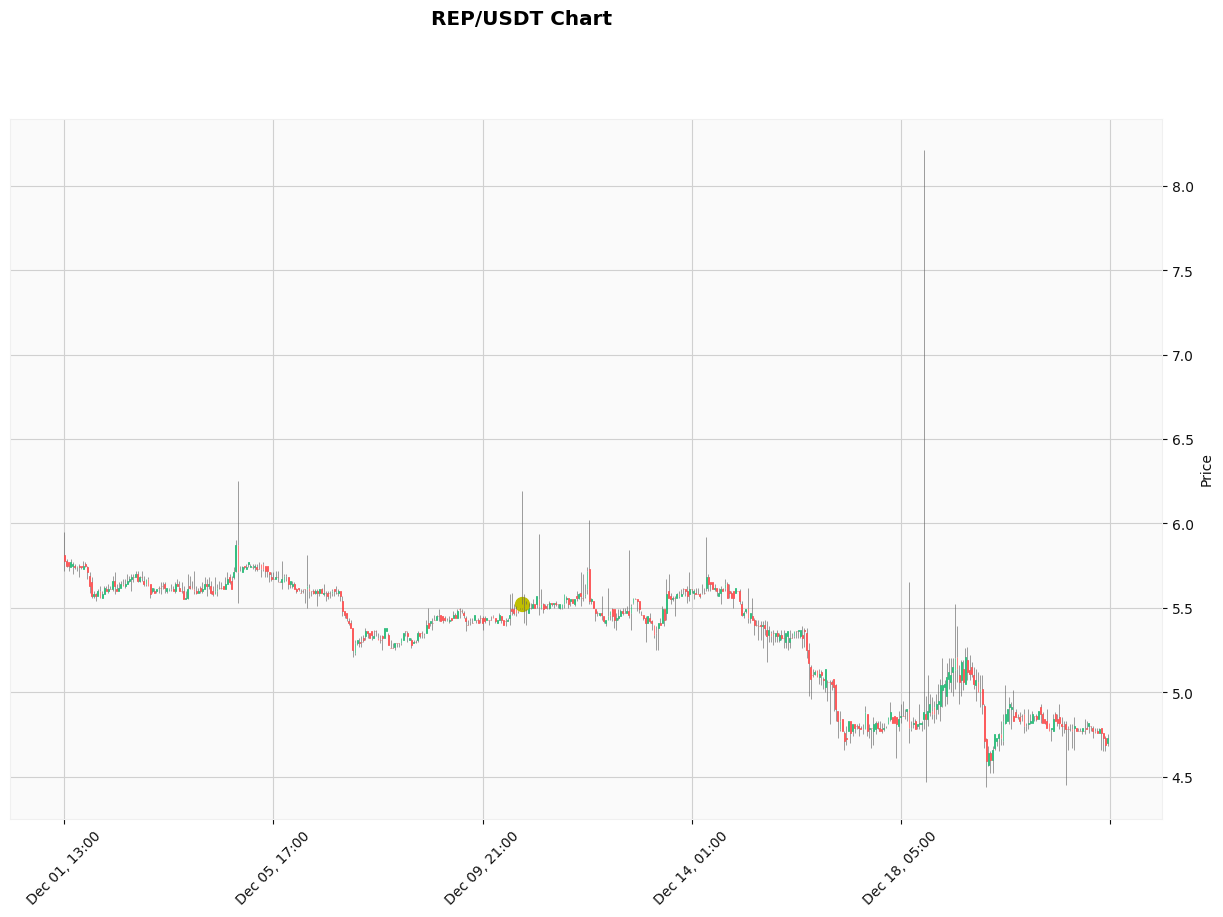

2024-03-20 06:00:00 买入
2024-03-20 22:00:00 卖出, 收益率: 7.403055229142183%
2024-03-21 08:00:00 买入


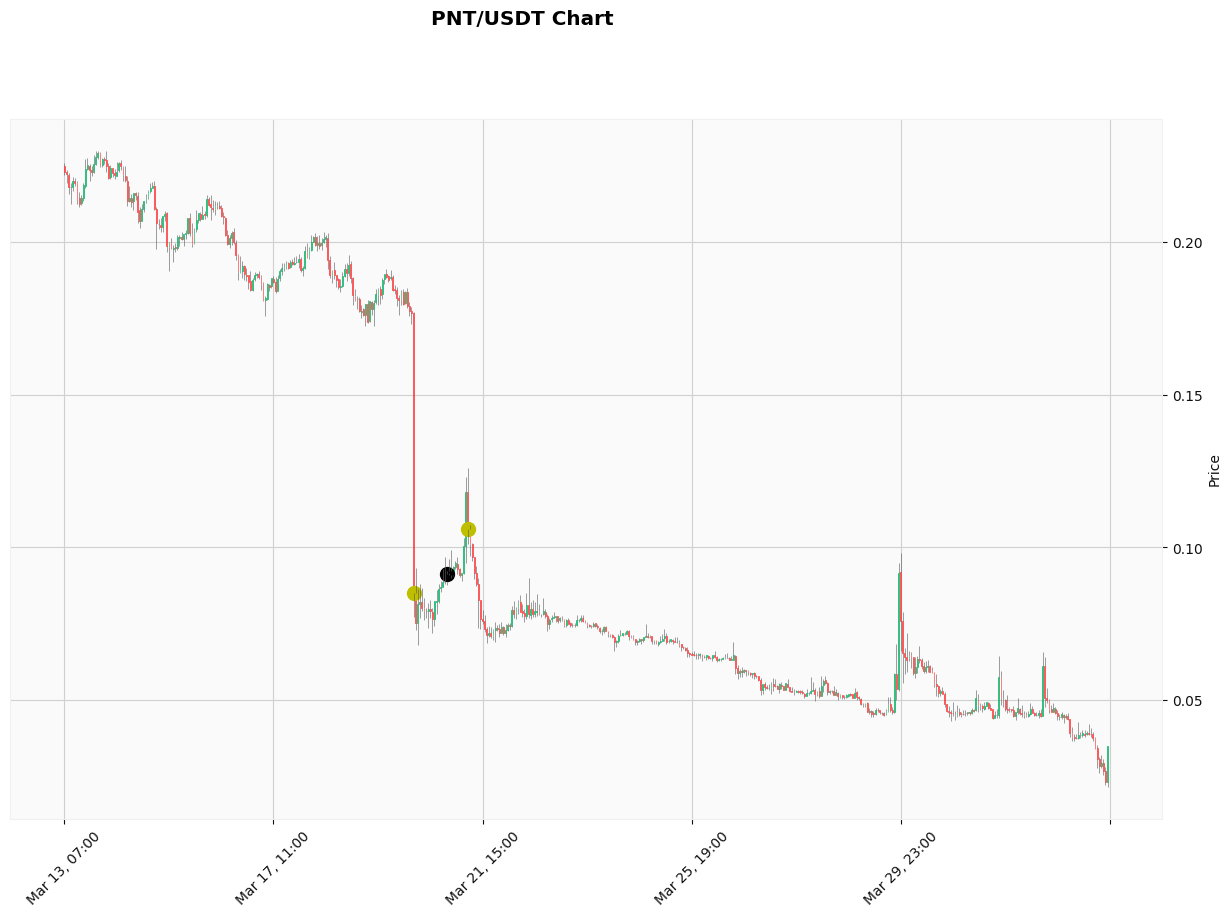

2024-04-12 18:00:00 买入


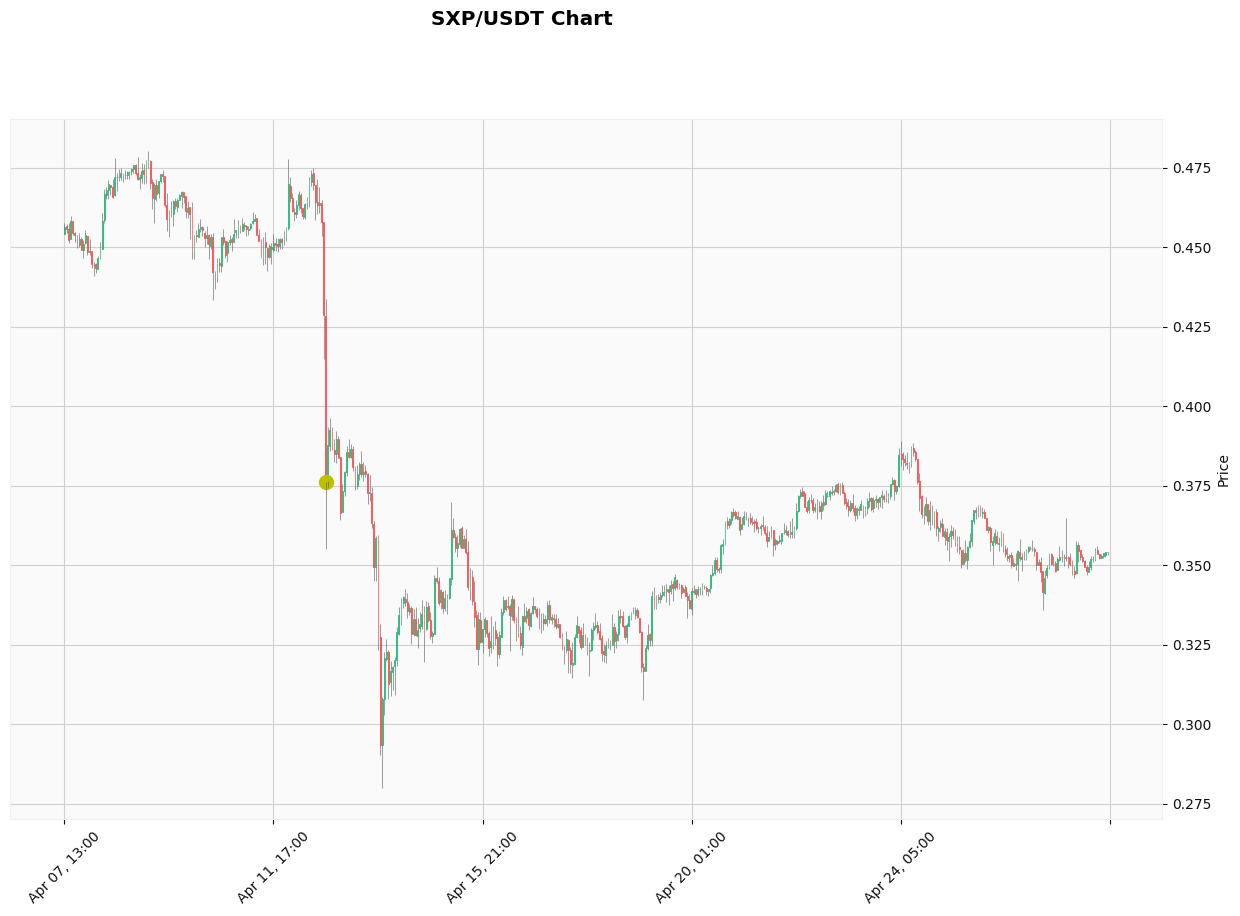

2022-01-07 03:00:00 买入
2022-01-07 08:00:00 卖出, 收益率: 6.021505376344109%
2022-01-20 21:00:00 买入


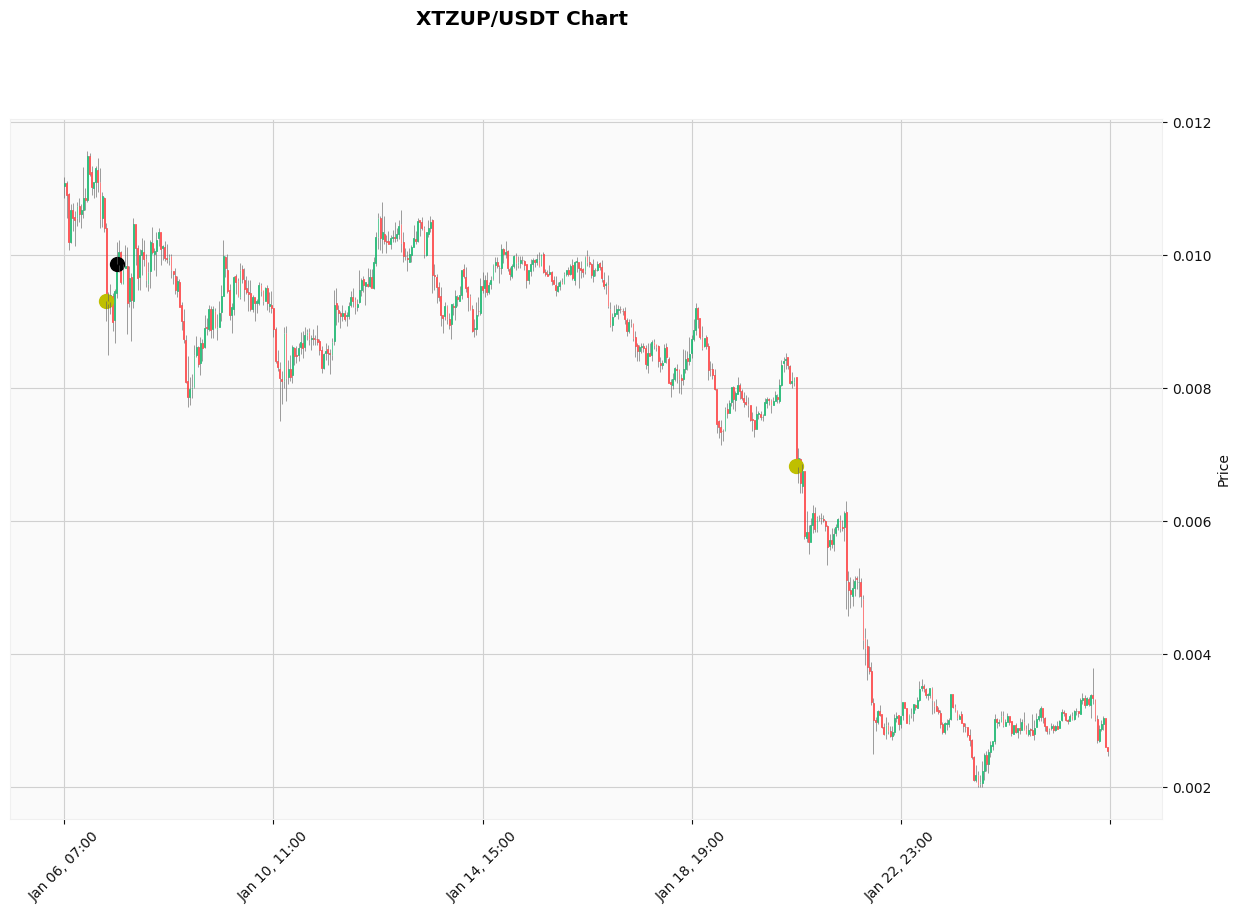

2024-04-12 18:00:00 买入


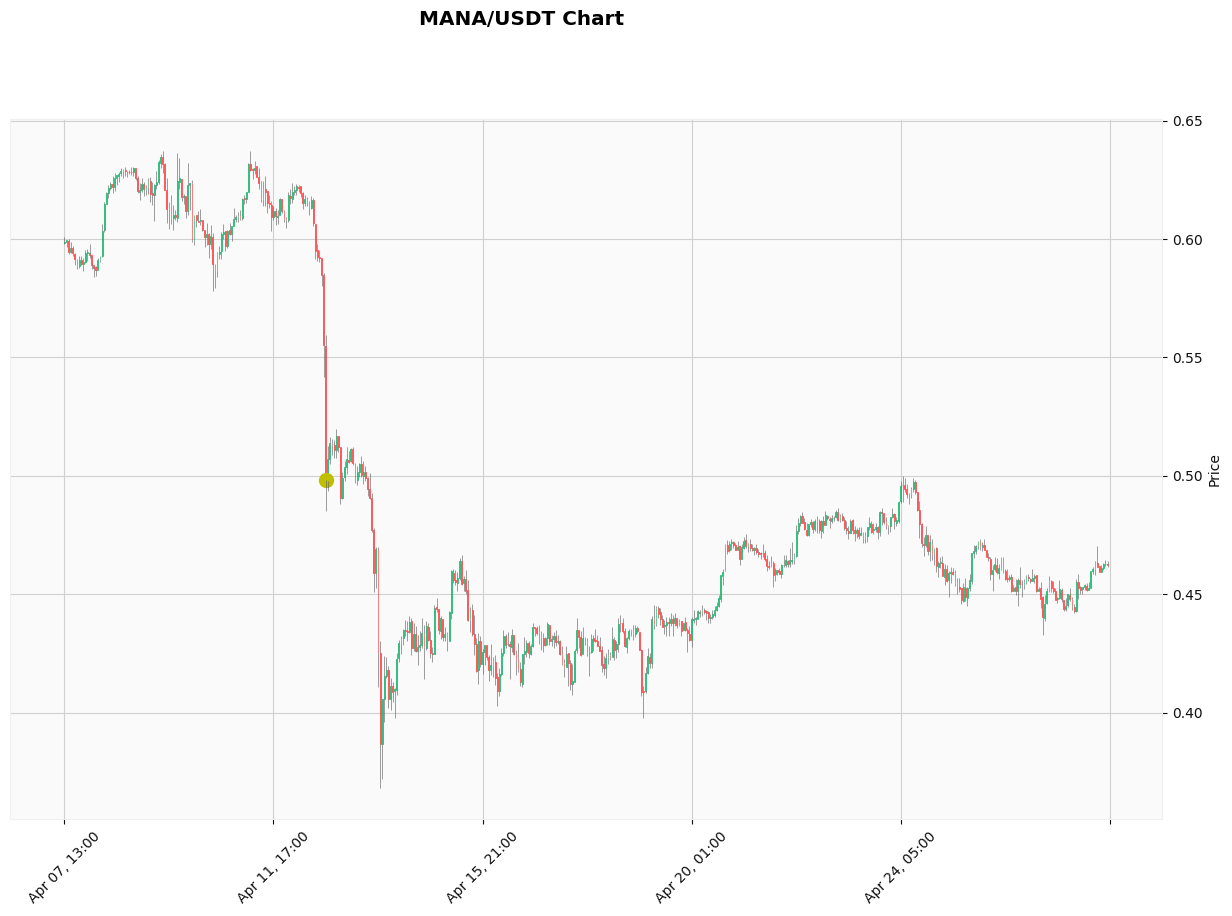

2023-05-27 08:00:00 买入


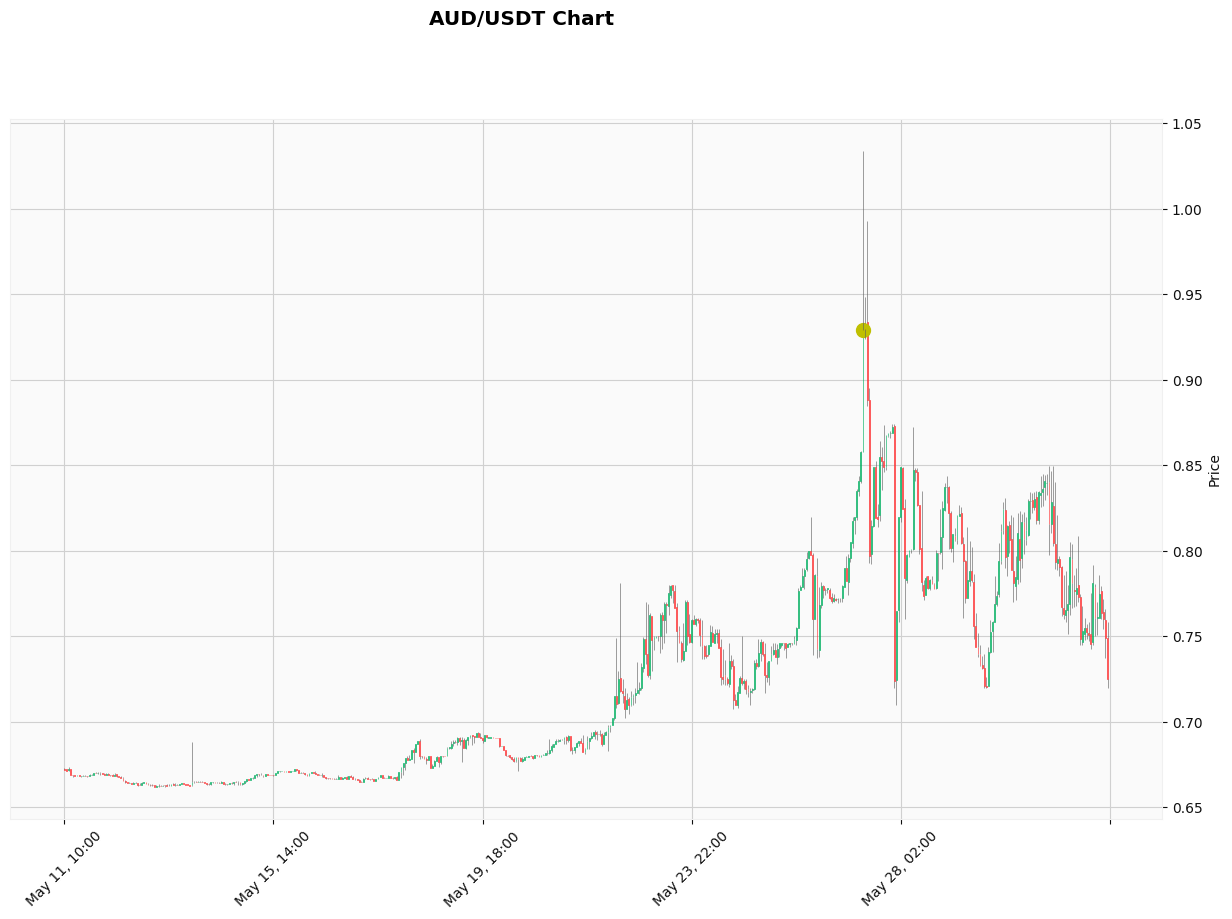

2022-11-09 20:00:00 买入
2022-11-10 00:00:00 卖出, 收益率: 6.6666666666666705%
2022-11-10 01:00:00 买入
2022-11-10 03:00:00 卖出, 收益率: 9.855072463768133%
2022-11-10 04:00:00 买入
2022-11-10 13:00:00 卖出, 收益率: 5.0938337801608595%
2022-11-11 00:00:00 买入


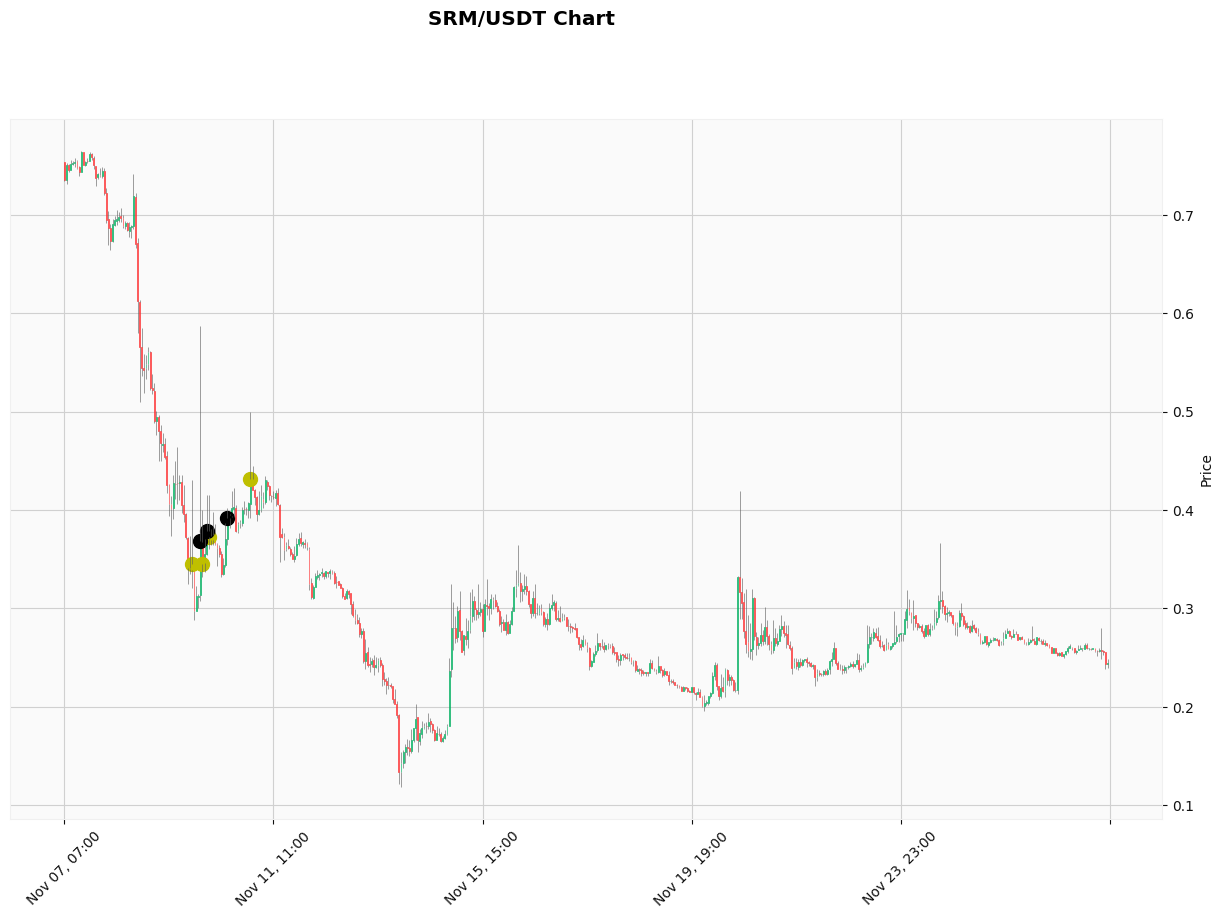

2024-04-12 18:00:00 买入


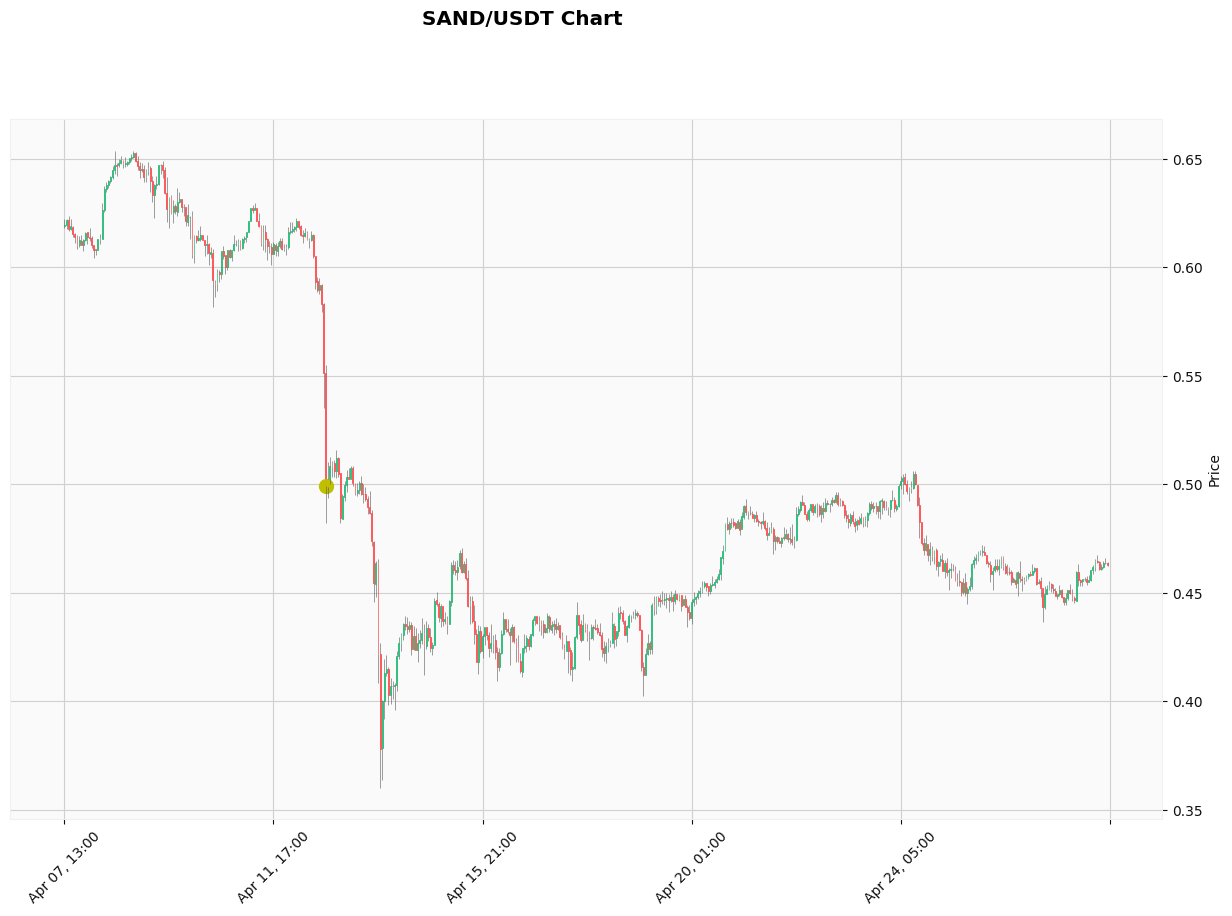

2024-04-13 20:00:00 买入


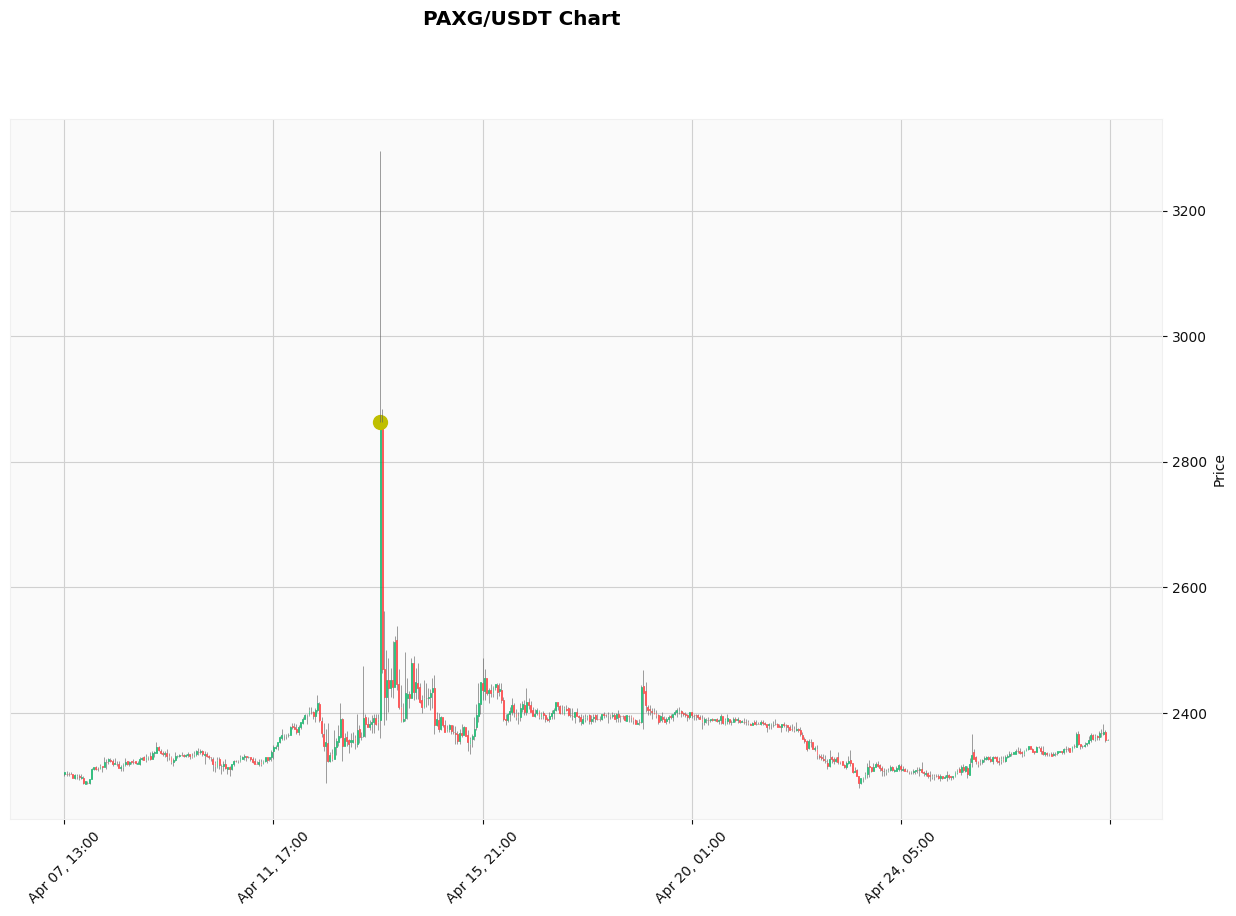

2024-04-12 18:00:00 买入


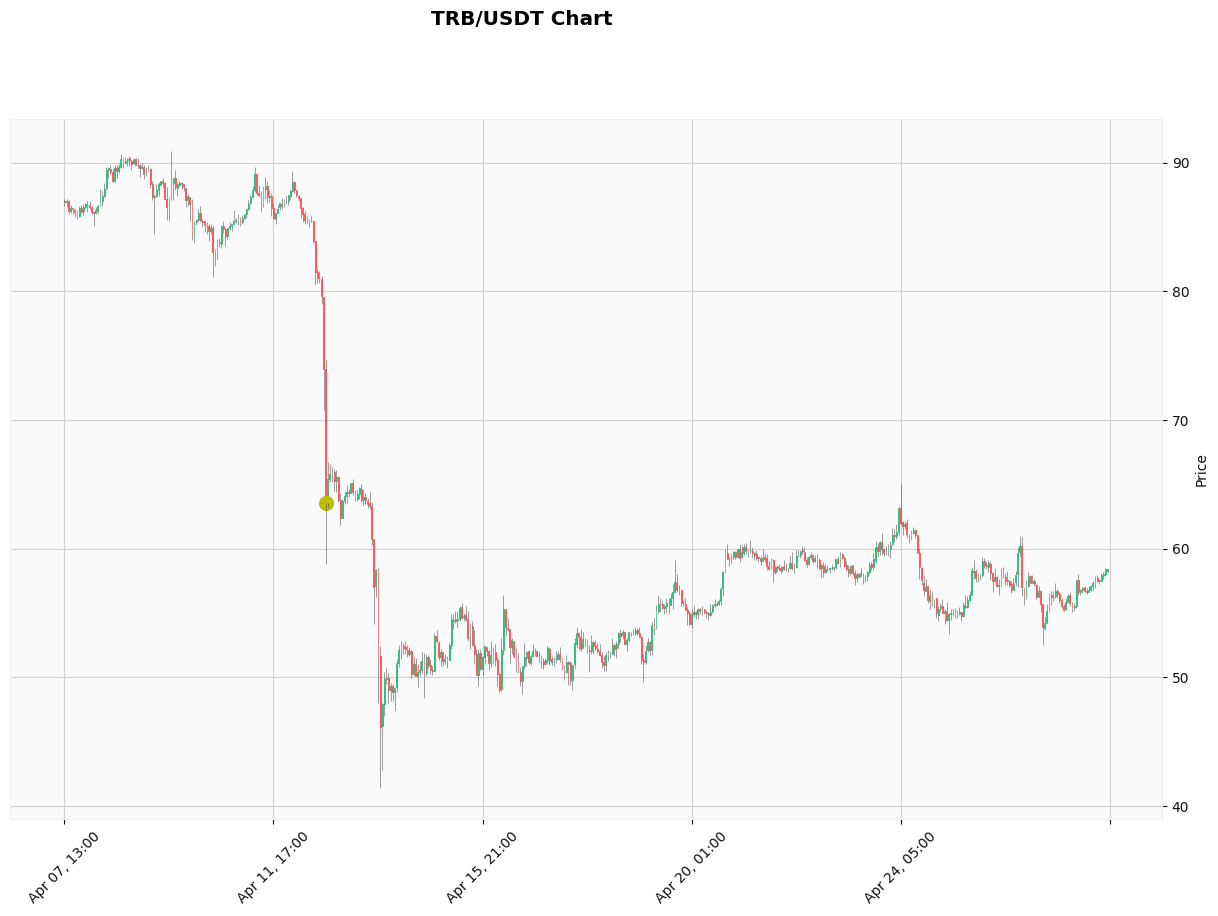

2021-12-16 13:00:00 买入


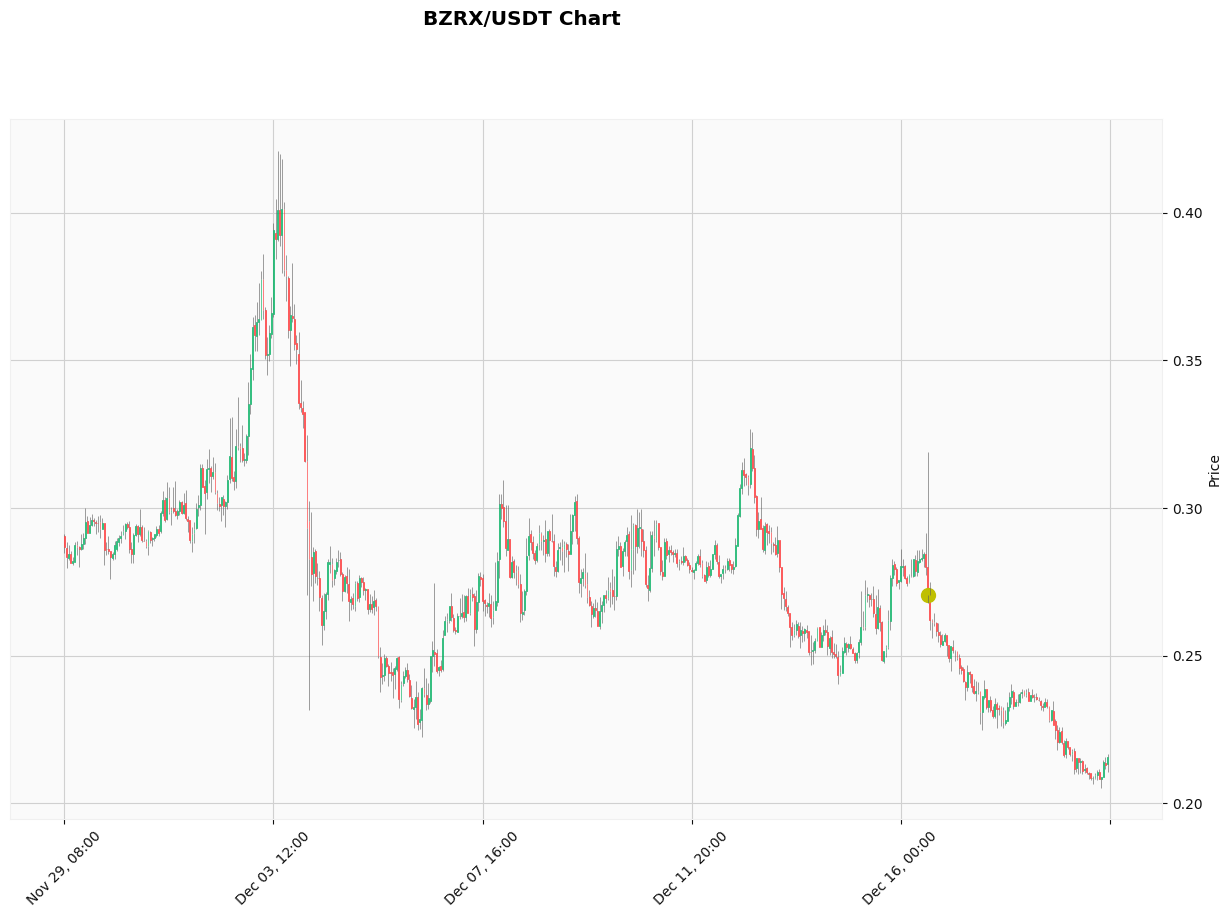

2023-08-15 07:00:00 买入


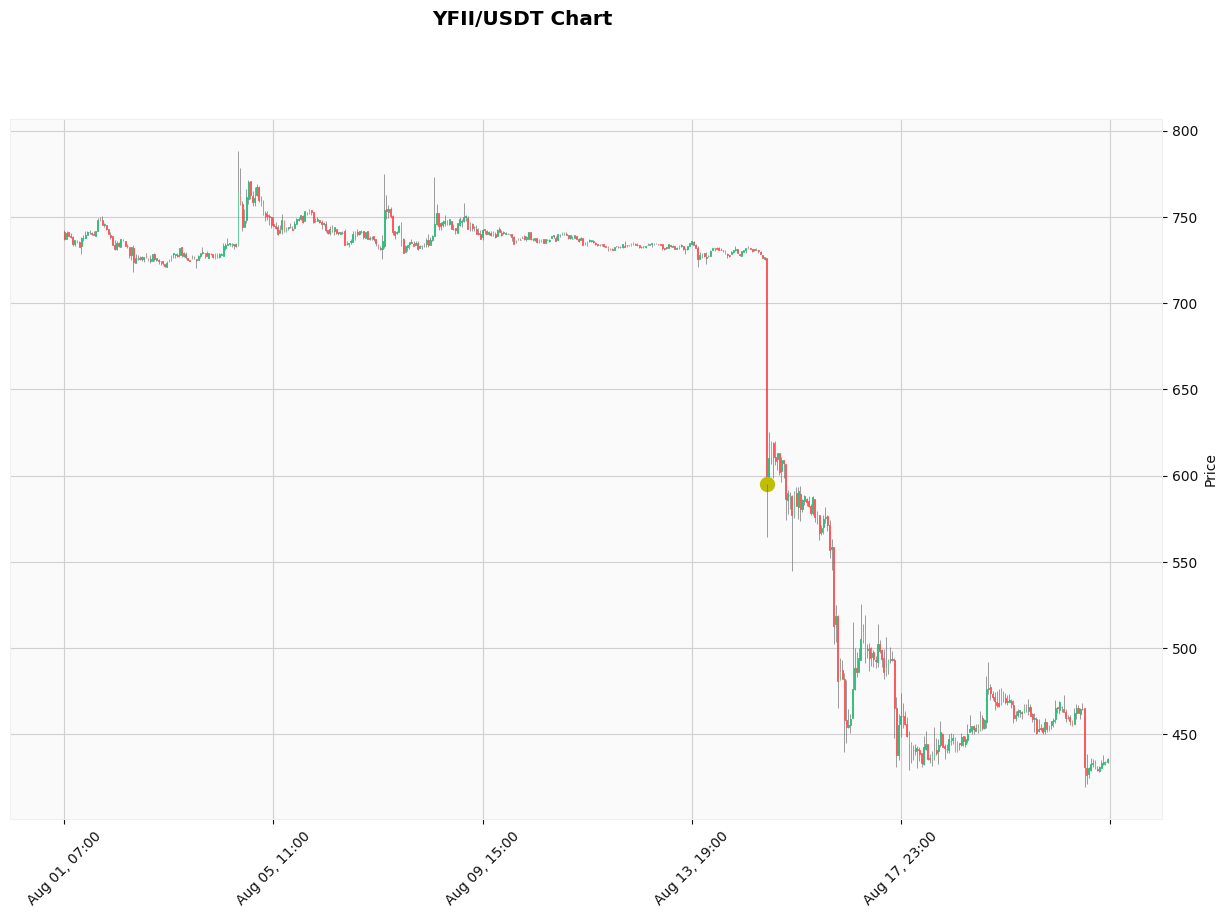

2024-04-12 18:00:00 买入


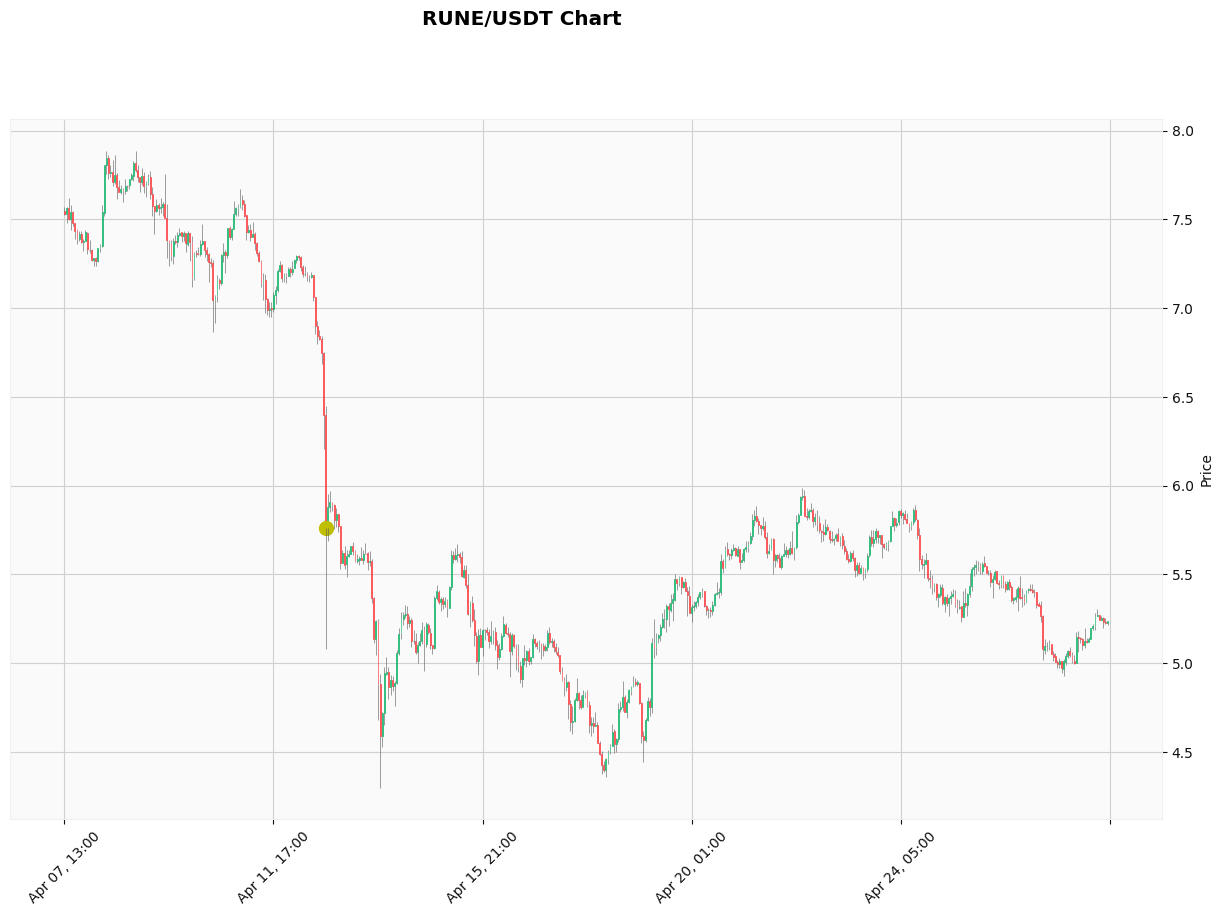

2021-12-04 03:00:00 买入


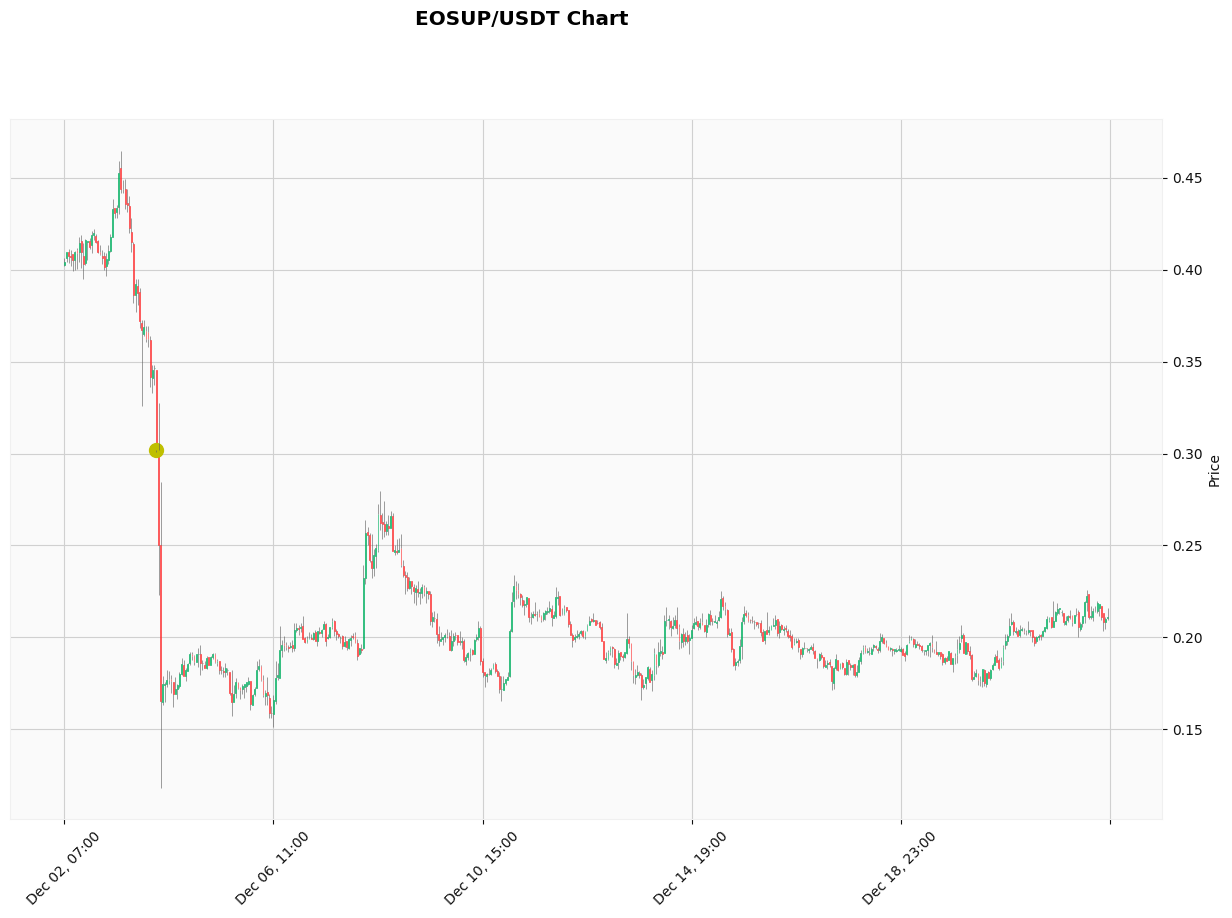

2021-12-04 05:00:00 买入


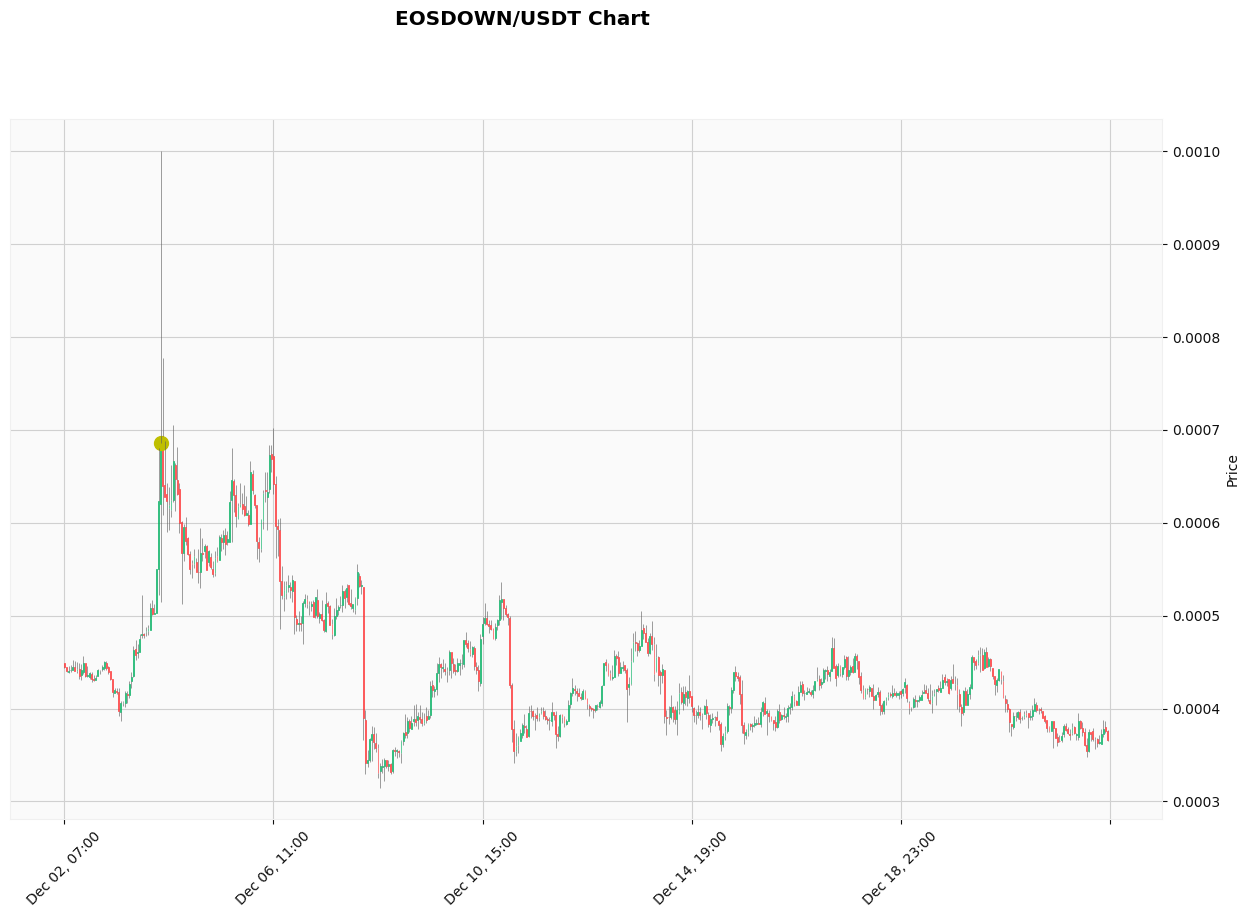

2022-11-09 05:00:00 买入
2022-11-09 07:00:00 卖出, 收益率: 7.2359463139467115%
2022-11-10 06:00:00 买入
2022-11-10 13:00:00 卖出, 收益率: 8.988256549232158%
2022-11-10 17:00:00 买入


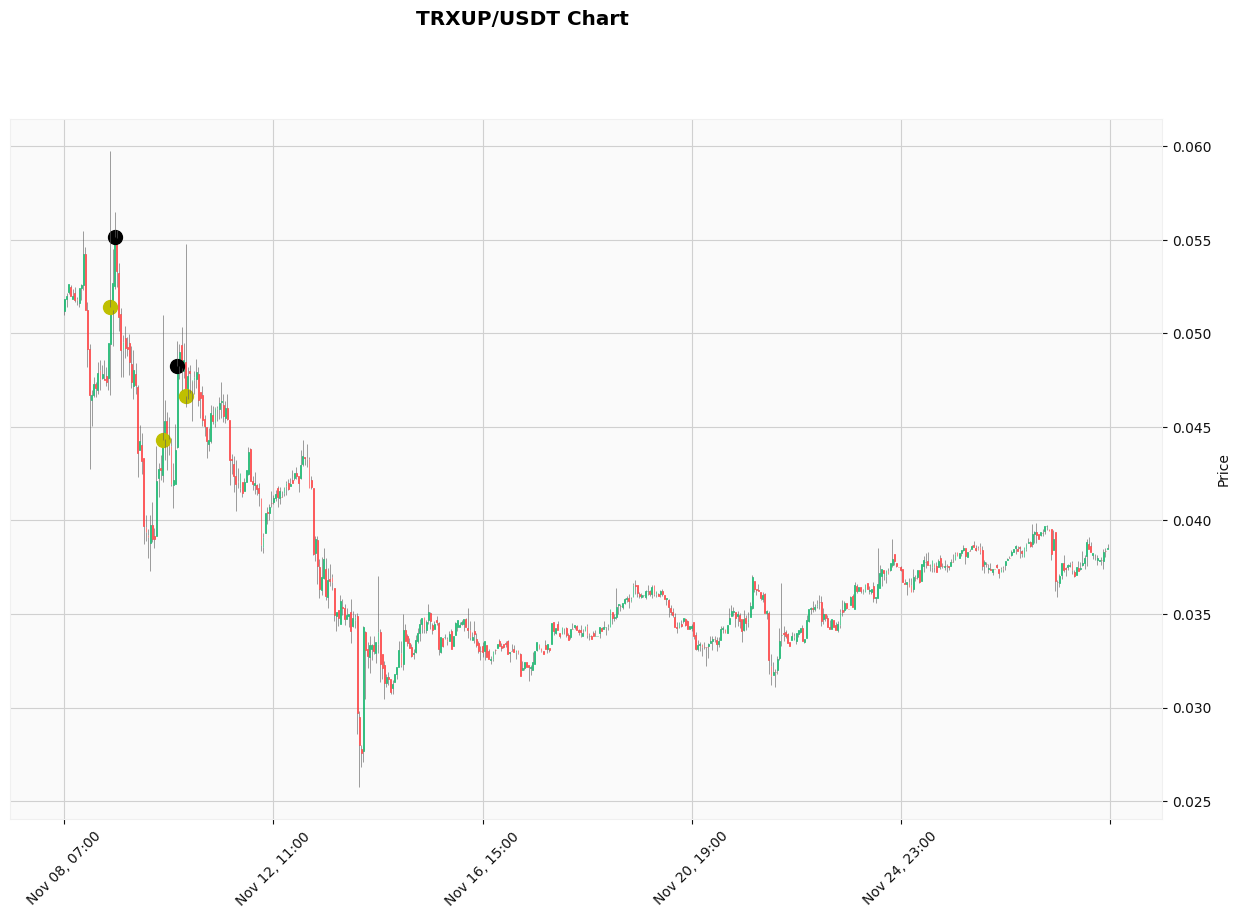

2024-04-12 18:00:00 买入


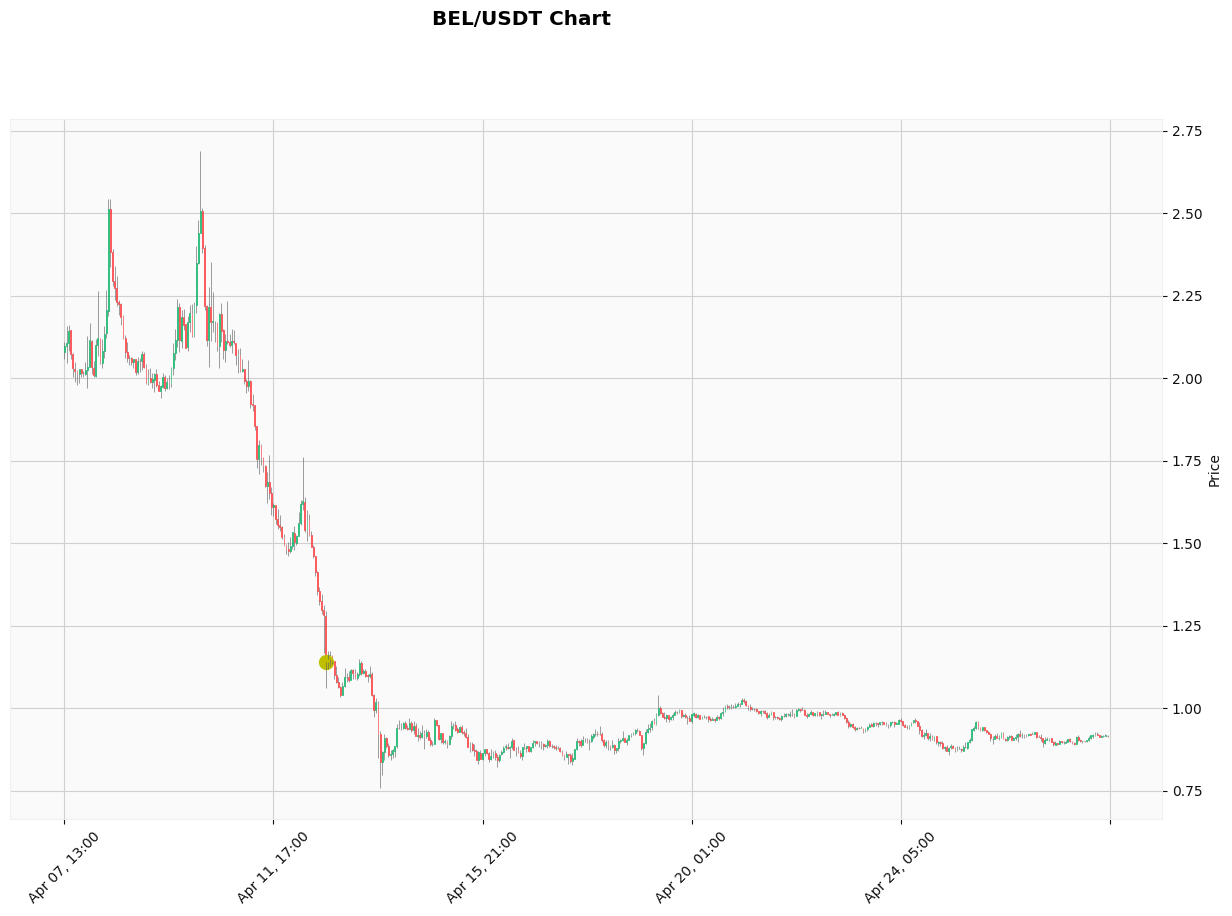

2022-01-20 21:00:00 买入


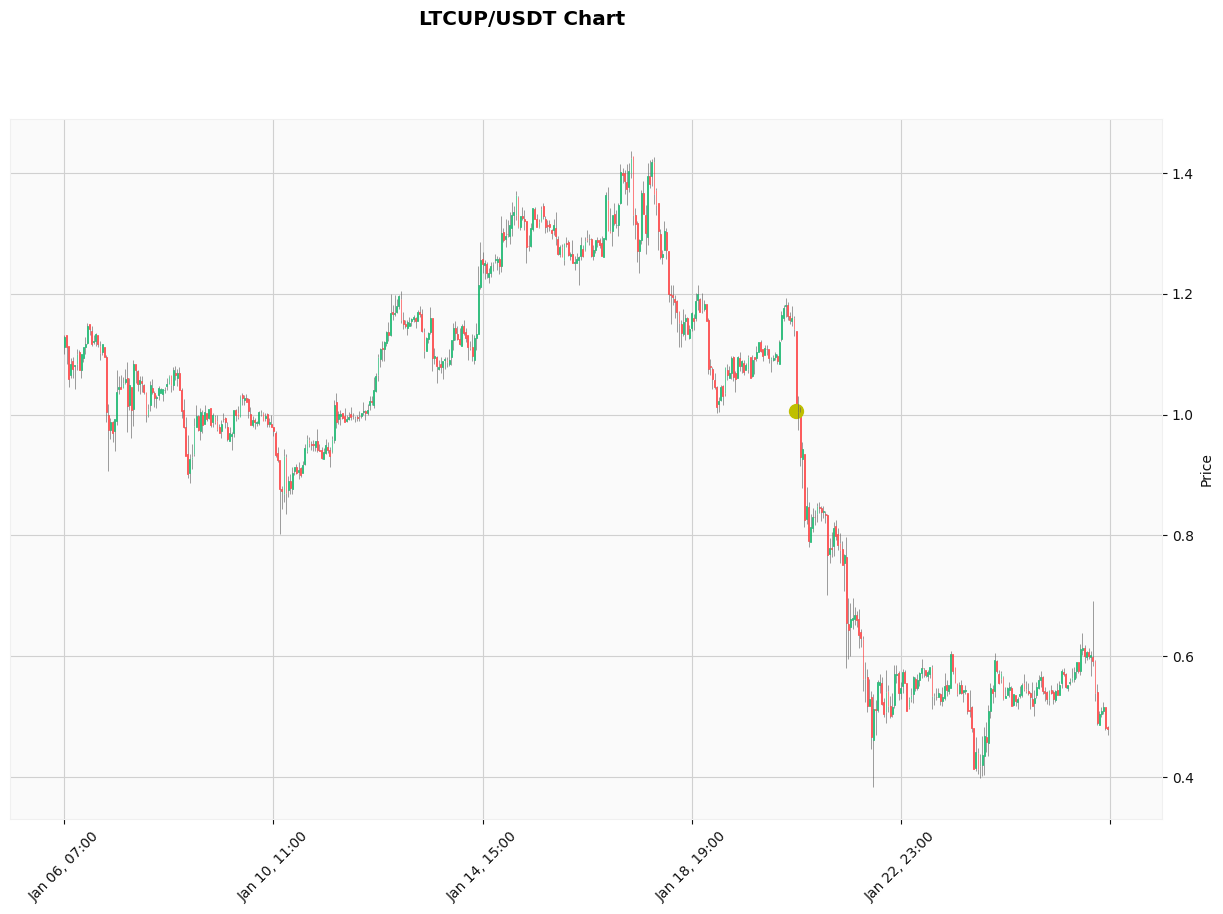

2022-10-13 04:00:00 买入
2022-10-14 02:00:00 卖出, 收益率: 5.283018867924525%
2022-10-17 15:00:00 买入
2022-10-18 14:00:00 卖出, 收益率: 11.999999999999982%
2022-10-18 15:00:00 买入


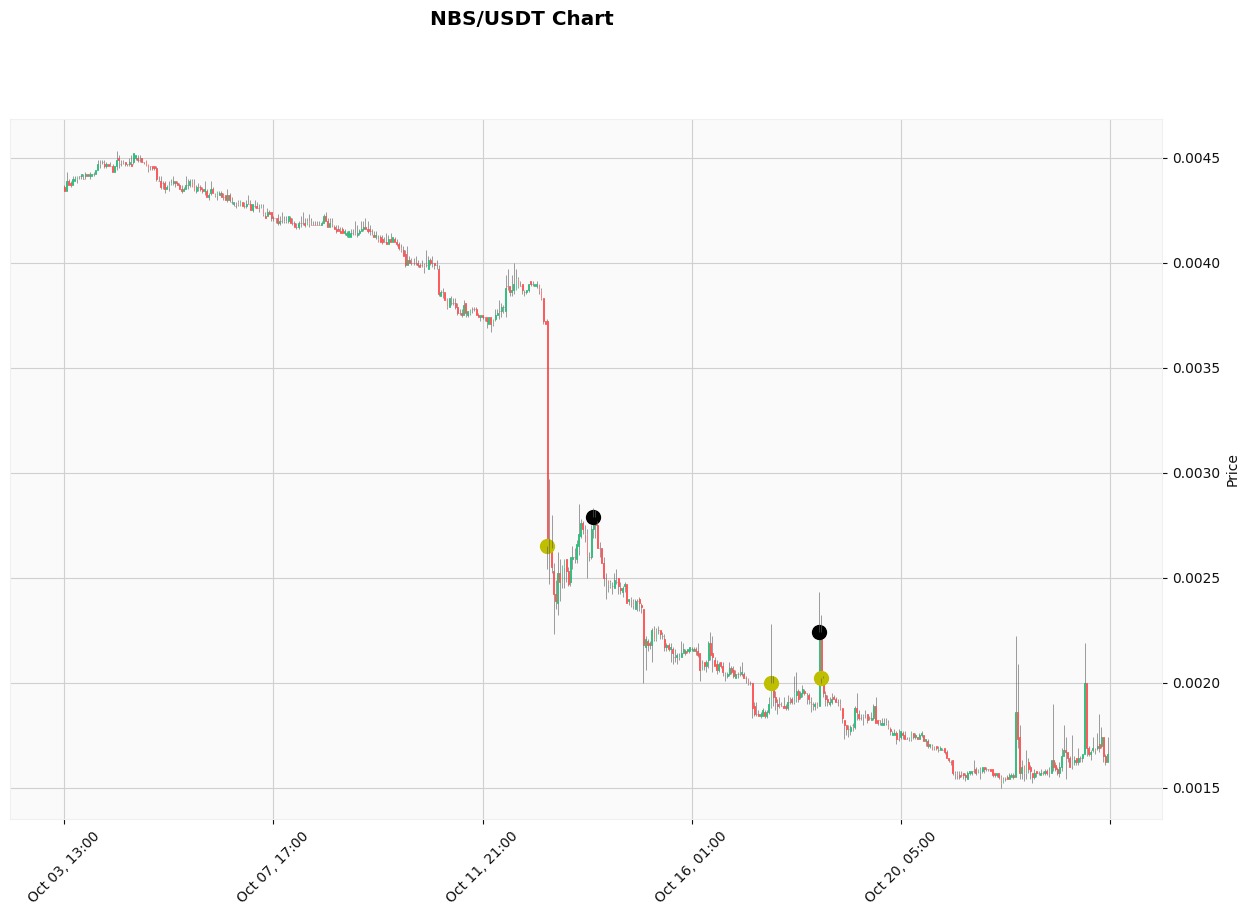

2024-04-12 18:00:00 买入


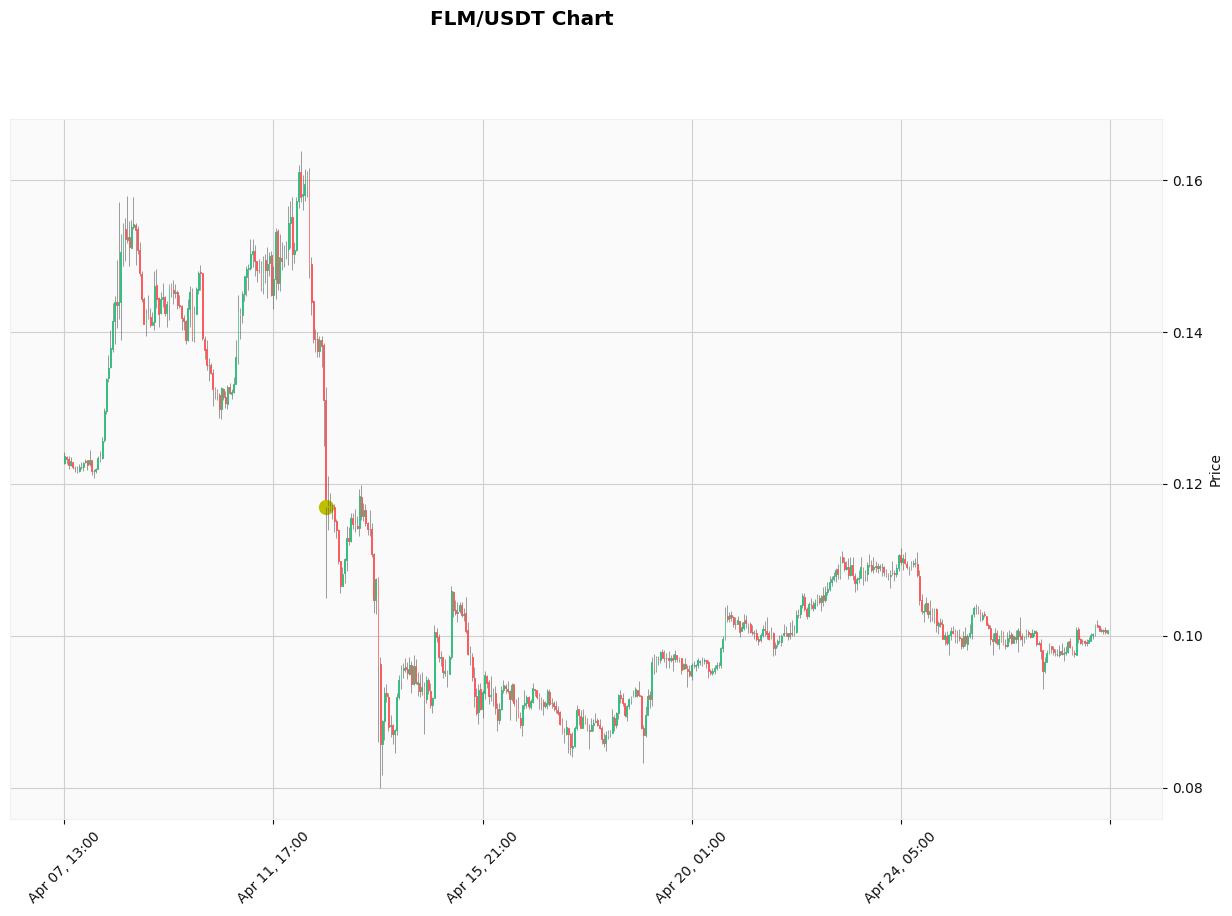

2021-12-04 04:00:00 买入


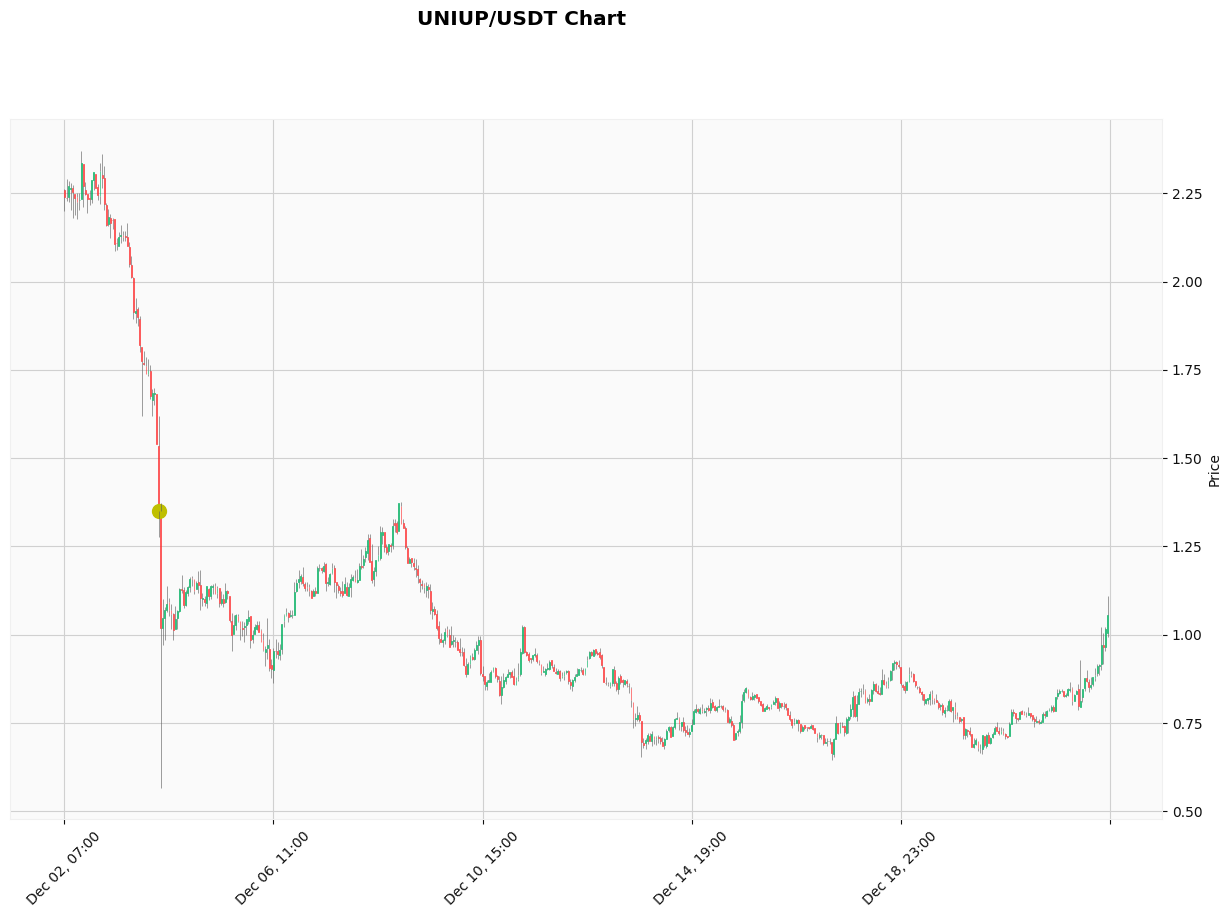

2024-04-12 18:00:00 买入


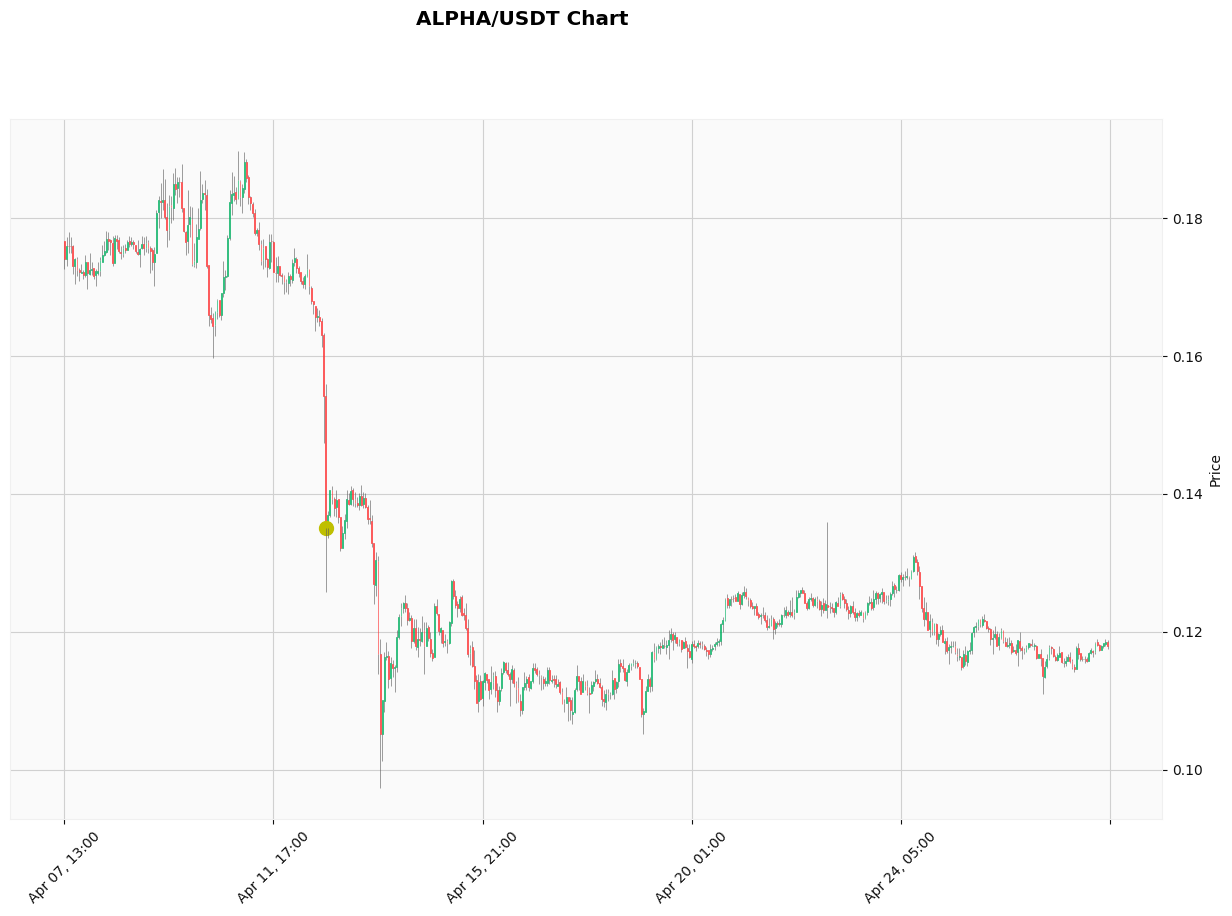

2021-11-10 19:00:00 买入
2021-11-13 10:00:00 卖出, 收益率: 6.133970805147229%
2021-11-16 02:00:00 买入
2021-11-16 08:00:00 卖出, 收益率: 13.60834318527275%
2021-11-16 15:00:00 买入


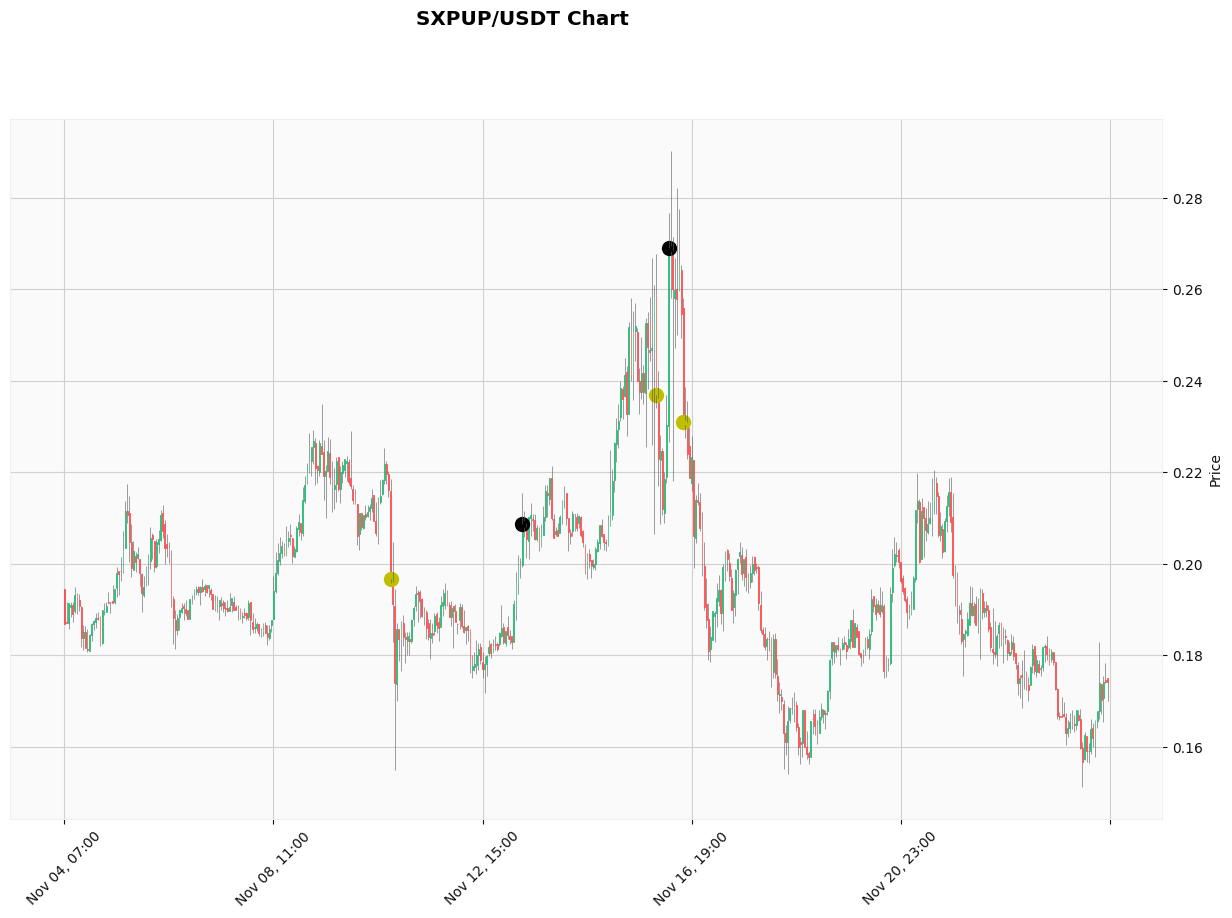

2021-11-18 03:00:00 买入


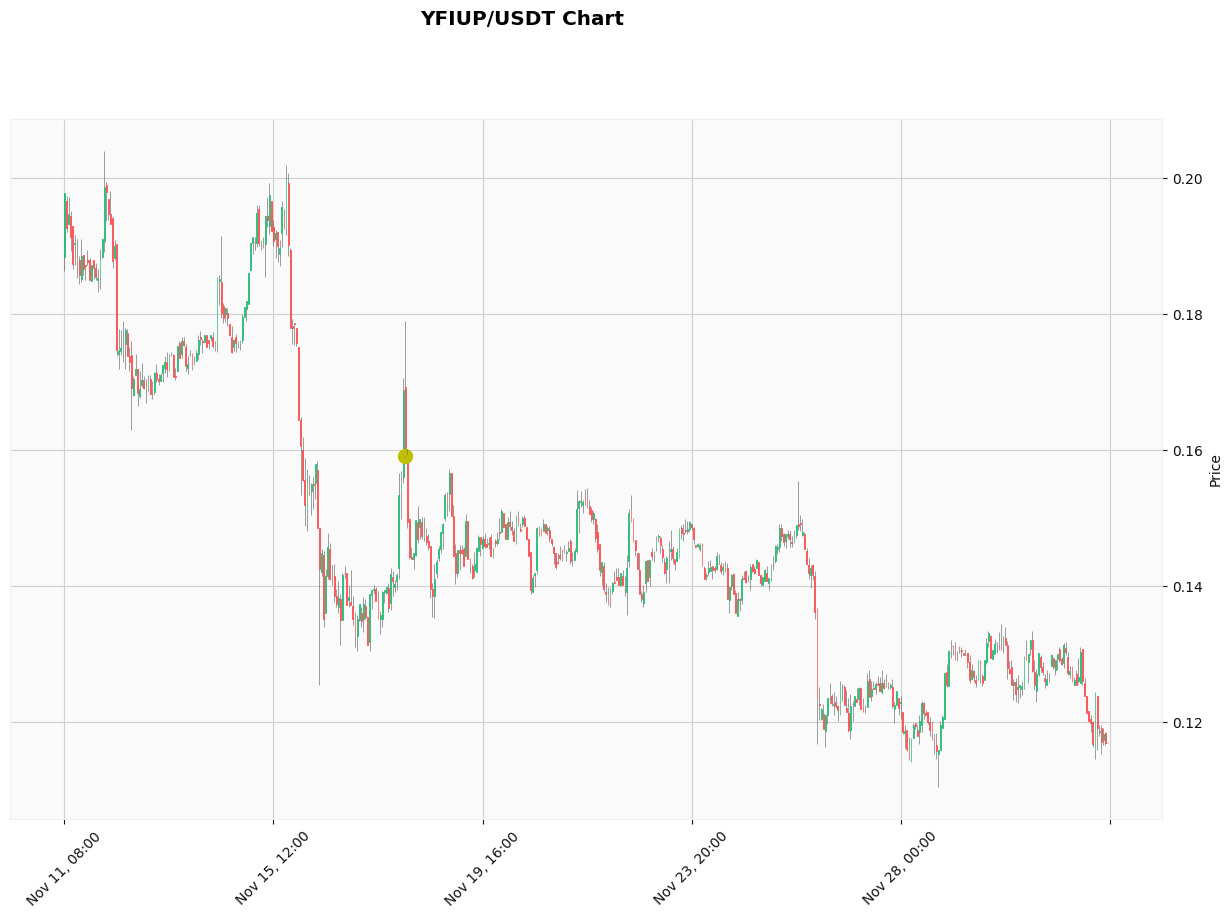

2024-04-12 18:00:00 买入


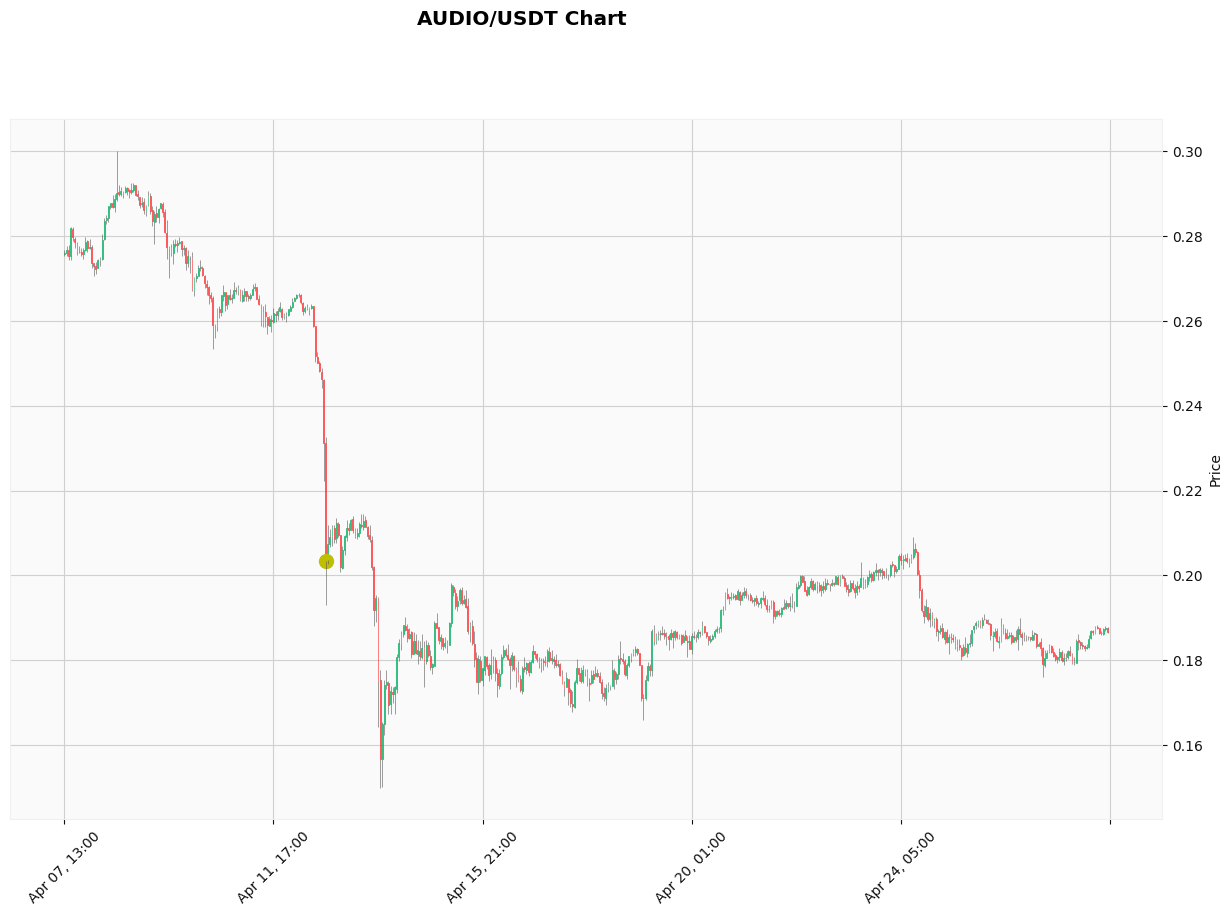

2021-10-27 09:00:00 买入


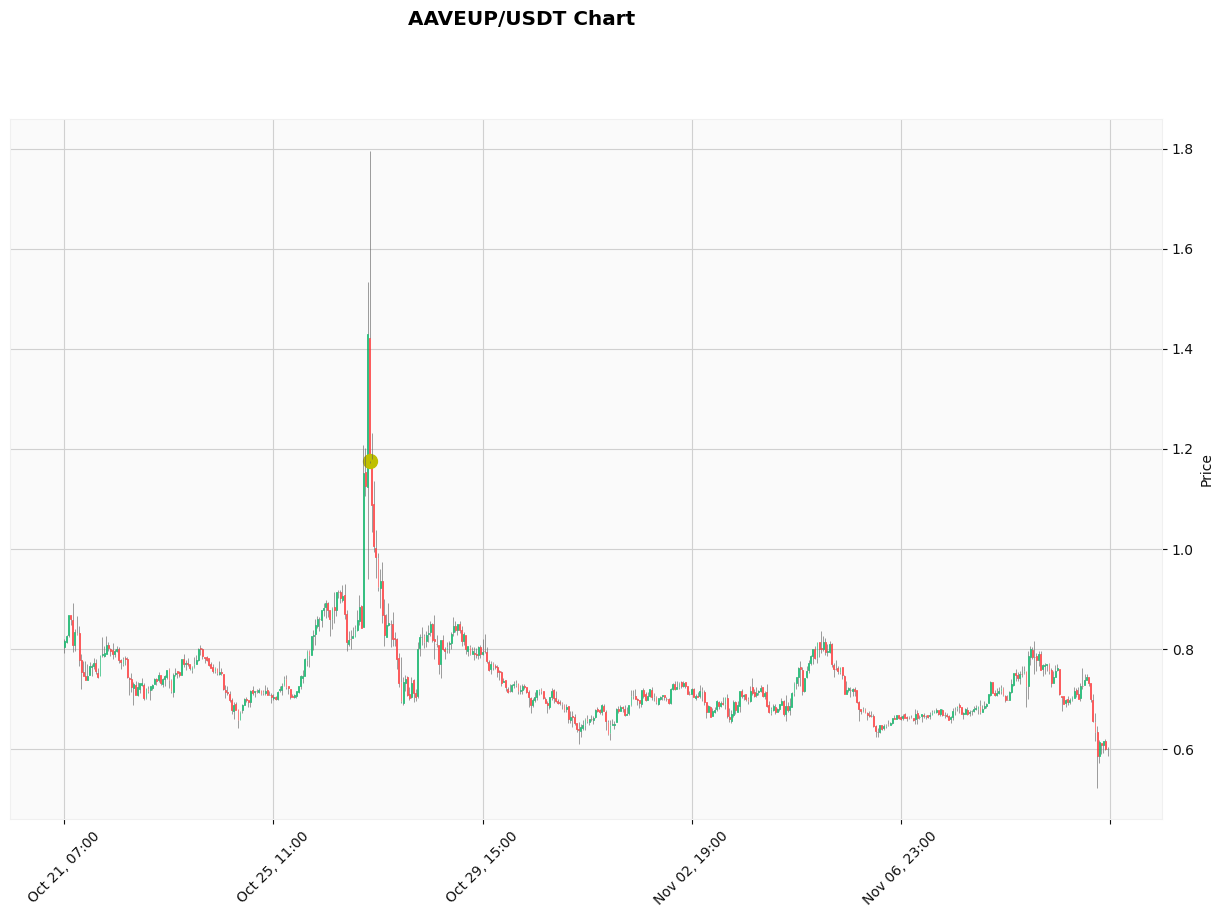

2021-11-26 08:00:00 买入
2021-11-28 18:00:00 卖出, 收益率: 10.516372795969772%
2021-12-04 03:00:00 买入


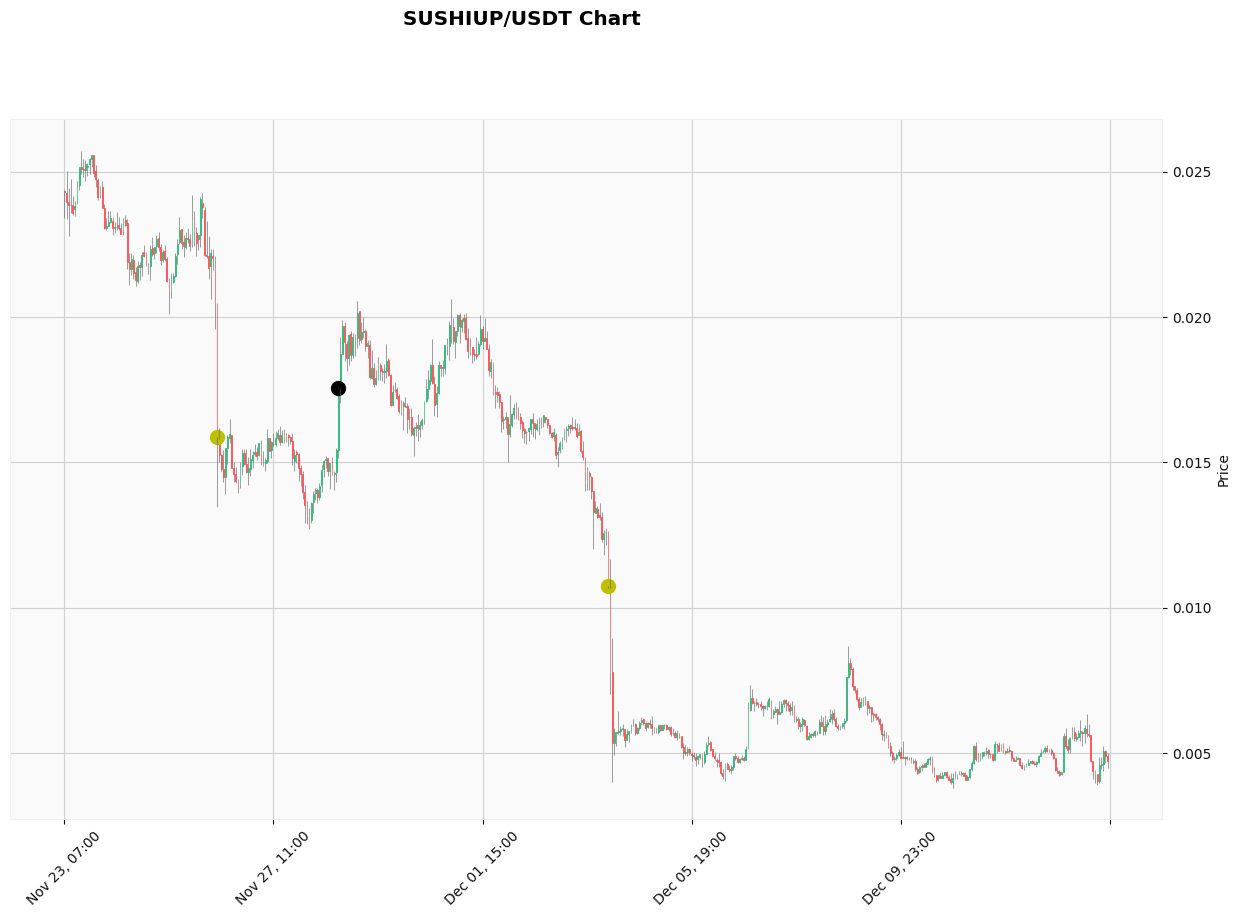

2021-11-26 08:00:00 买入
2021-11-26 10:00:00 卖出, 收益率: 5.376868977237791%
2021-11-28 18:00:00 买入
2021-12-03 16:00:00 卖出, 收益率: 8.131764705882366%
2021-12-04 05:00:00 买入
2021-12-06 00:00:00 卖出, 收益率: 5.180786374446382%
2021-12-06 11:00:00 买入


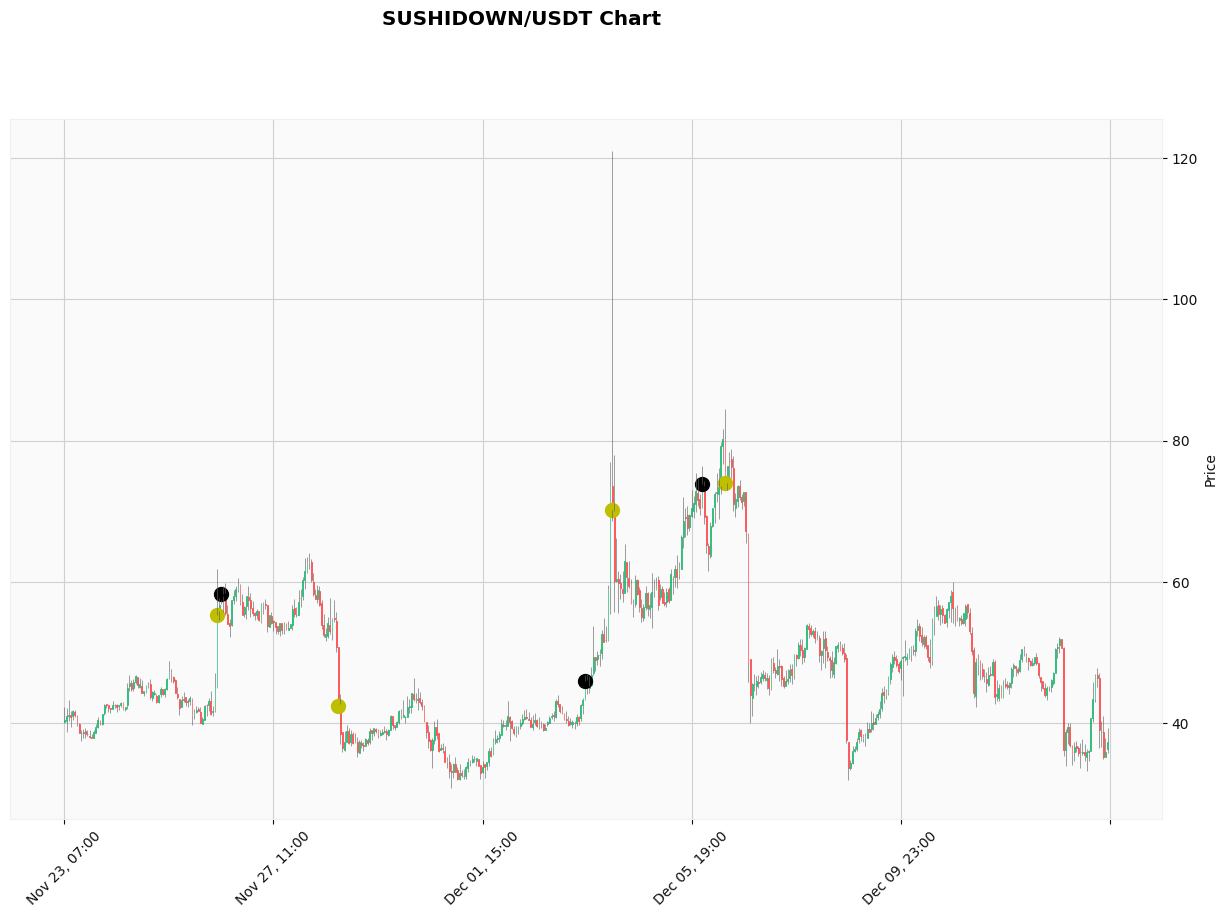

2021-11-26 08:00:00 买入
2021-11-26 14:00:00 卖出, 收益率: 5.432846455290331%
2021-12-04 00:00:00 买入


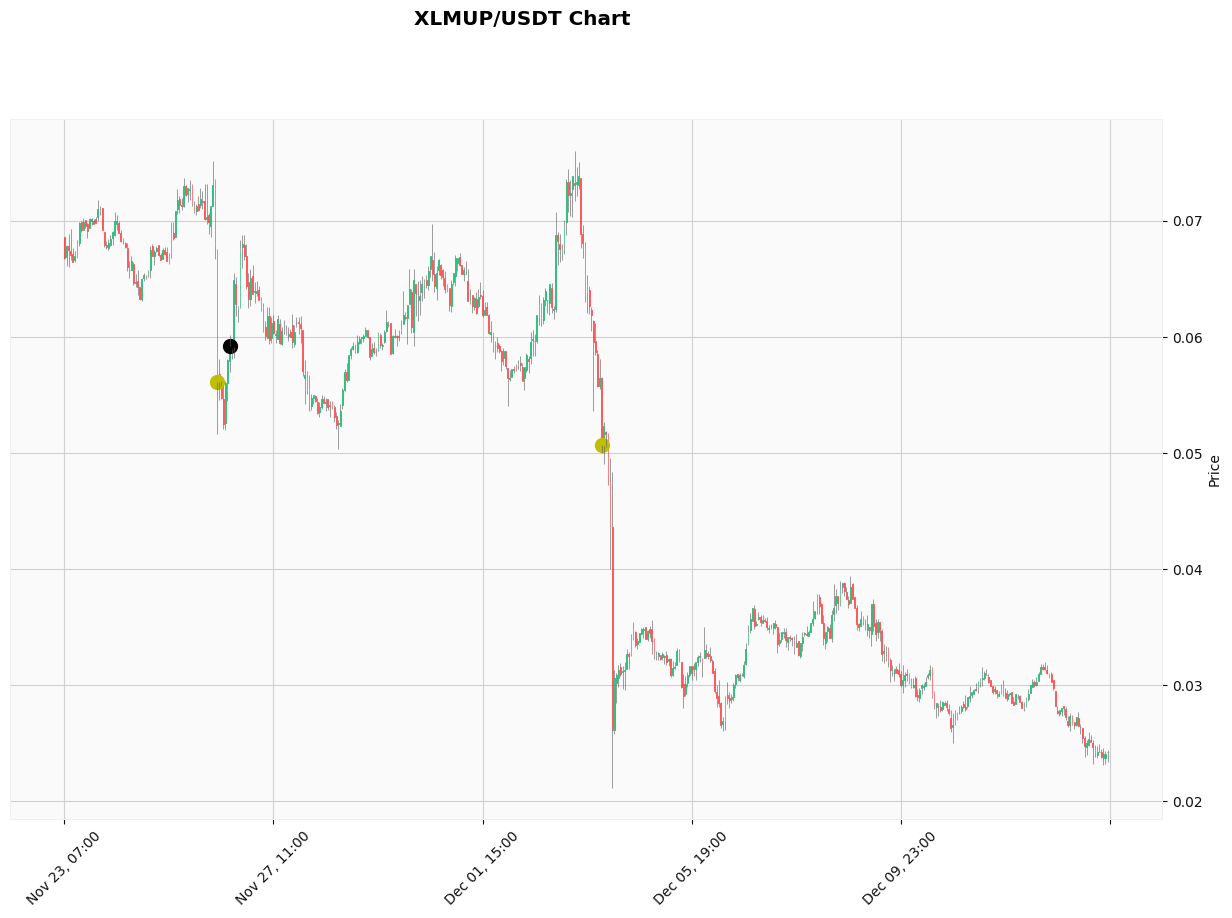

2021-12-04 05:00:00 买入


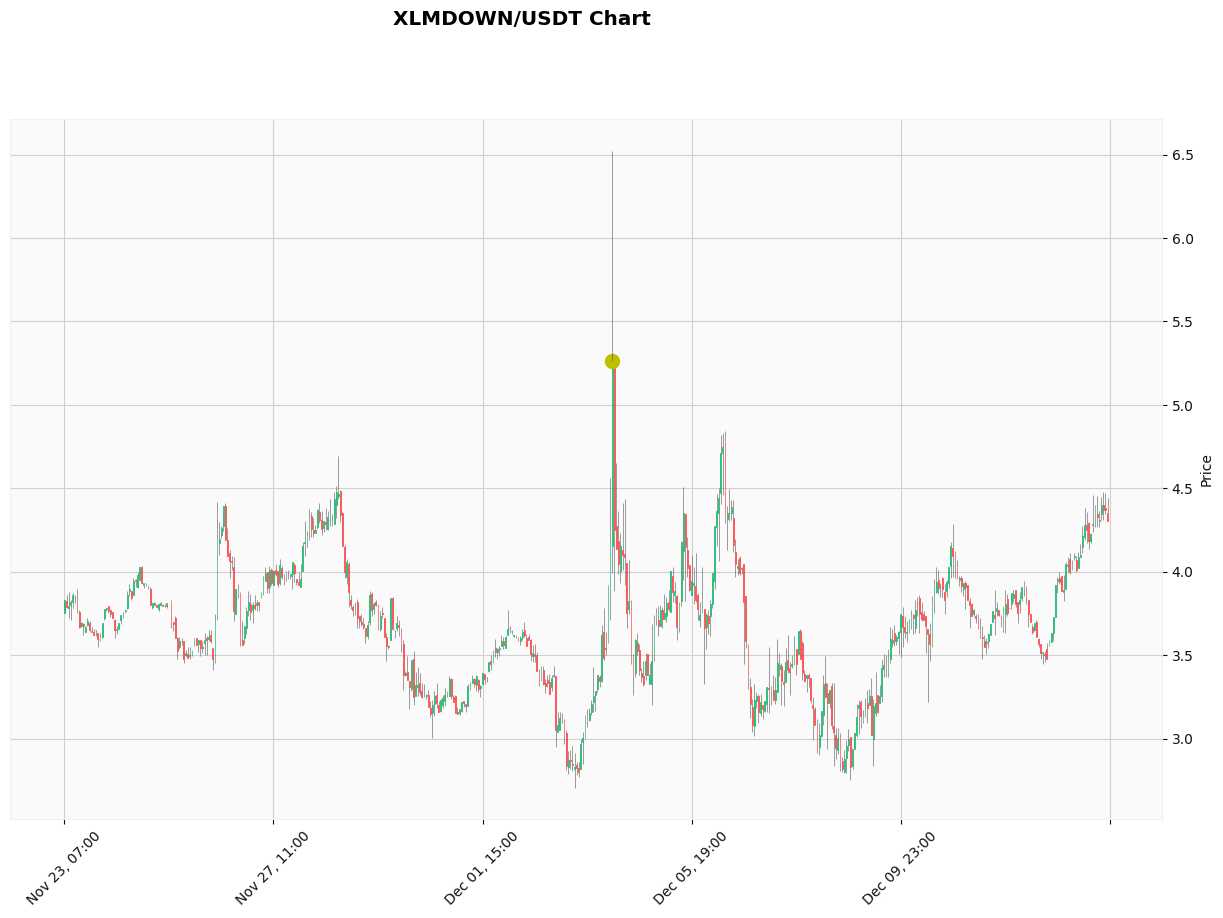

2024-04-12 18:00:00 买入


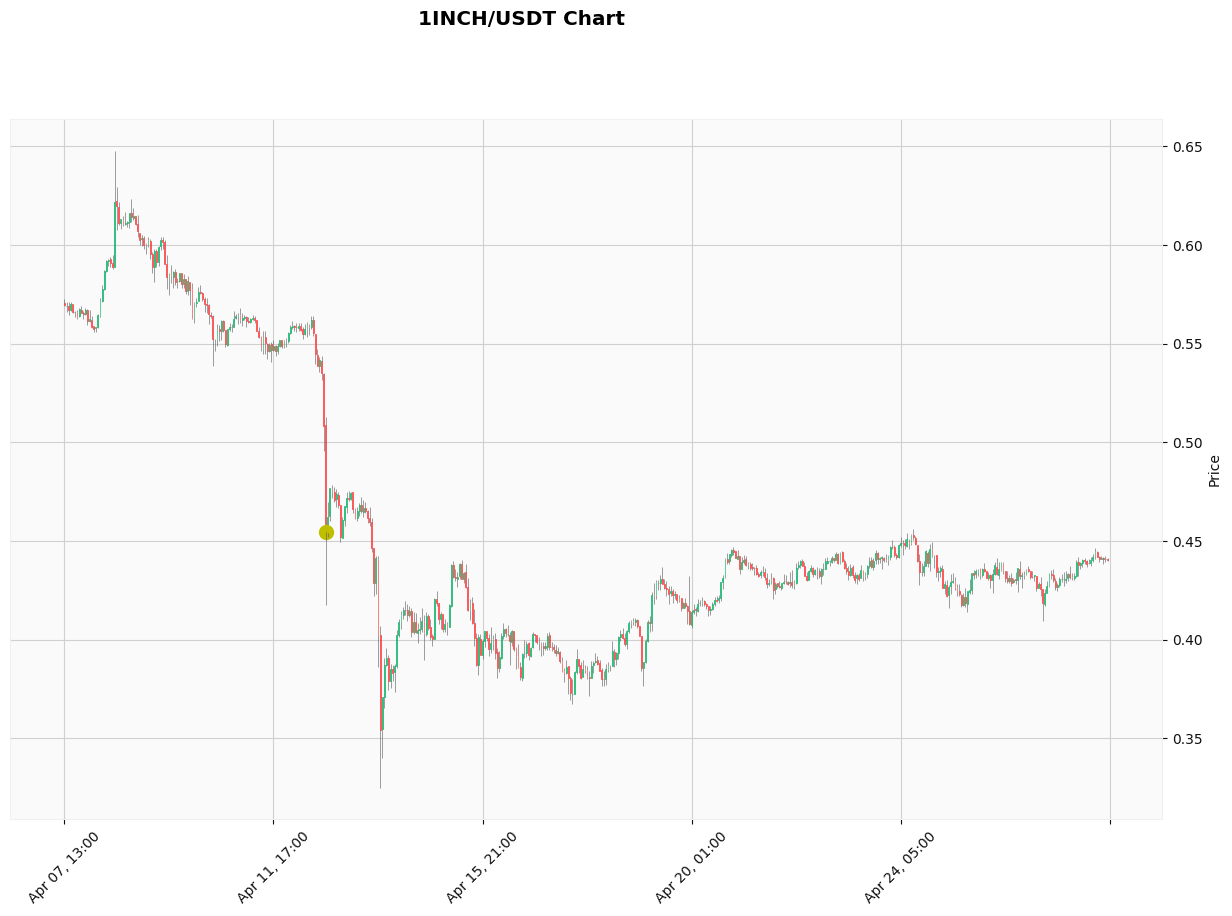

2024-04-12 18:00:00 买入


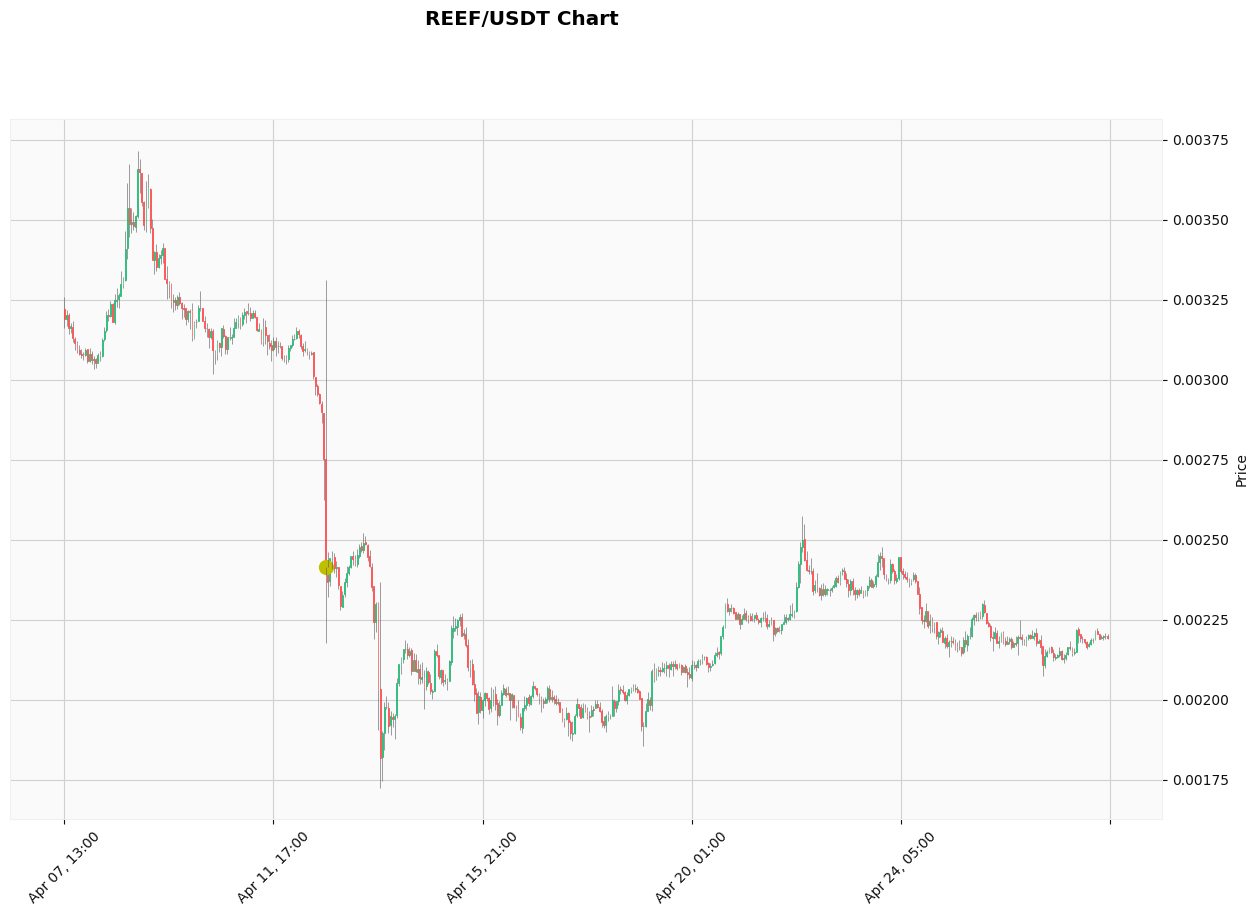

2024-04-10 10:00:00 买入


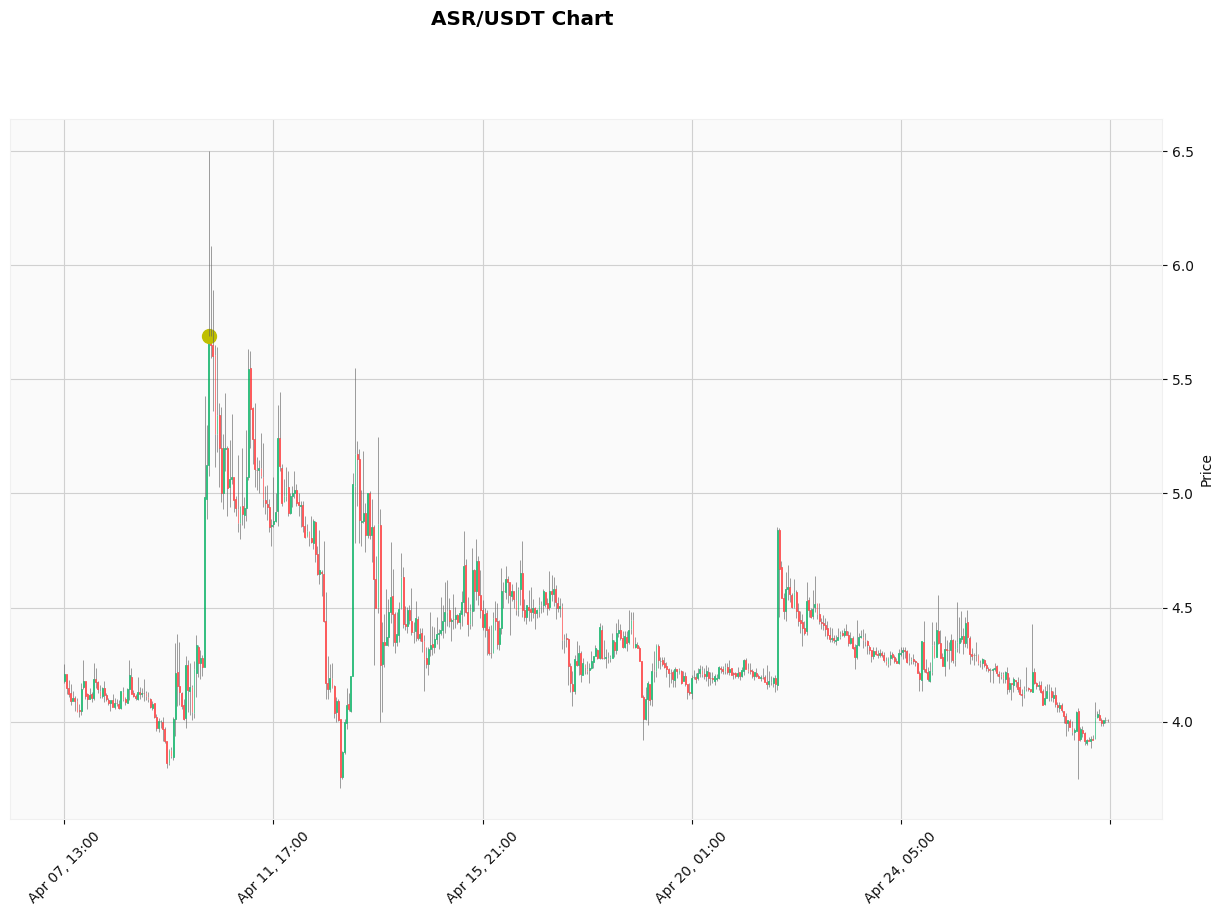

2022-11-09 19:00:00 买入
2022-11-10 04:00:00 卖出, 收益率: 8.347529812606481%
2022-11-14 12:00:00 买入
2022-11-15 05:00:00 卖出, 收益率: 9.218749999999986%
2022-11-20 23:00:00 买入


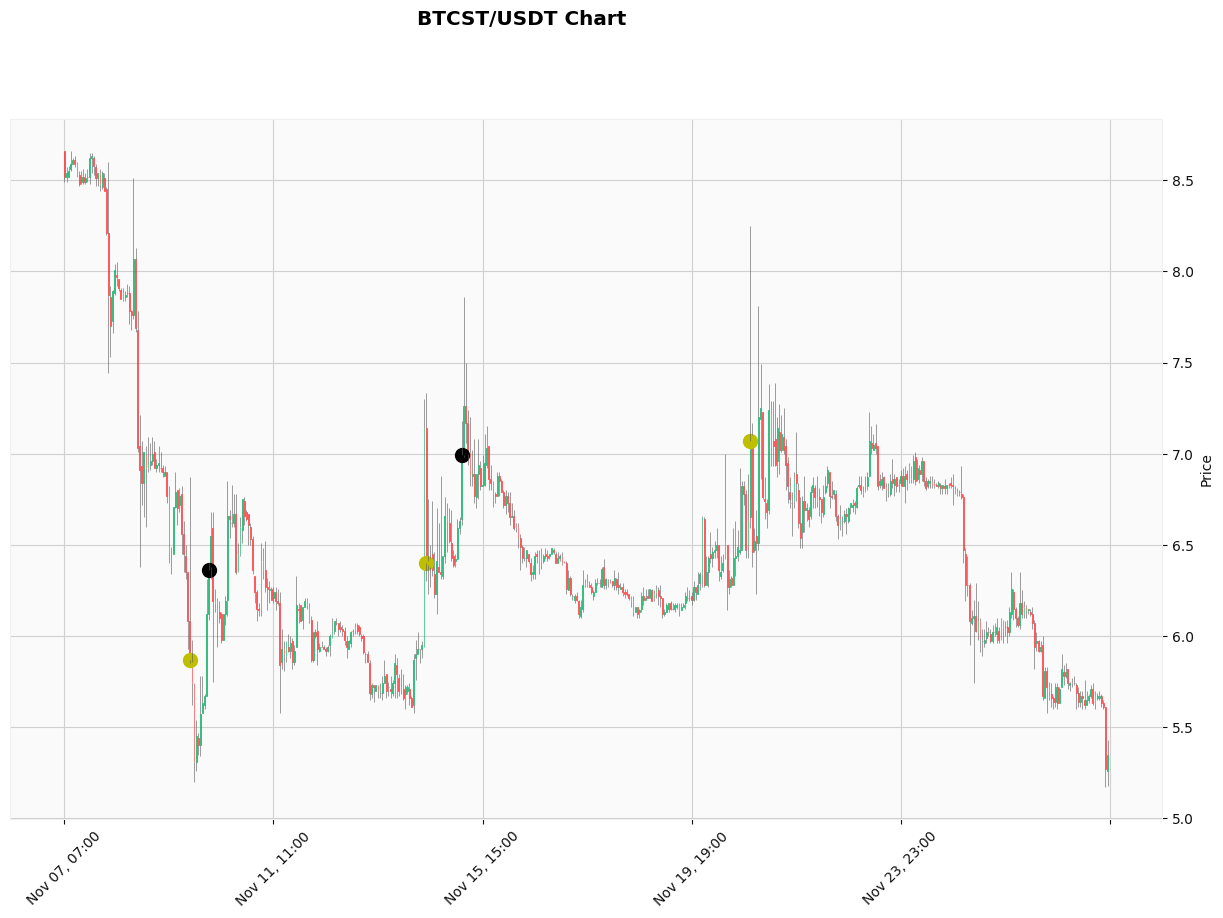

2024-04-07 17:00:00 买入
2024-04-08 10:00:00 卖出, 收益率: 5.17168441091448%
2024-04-12 18:00:00 买入


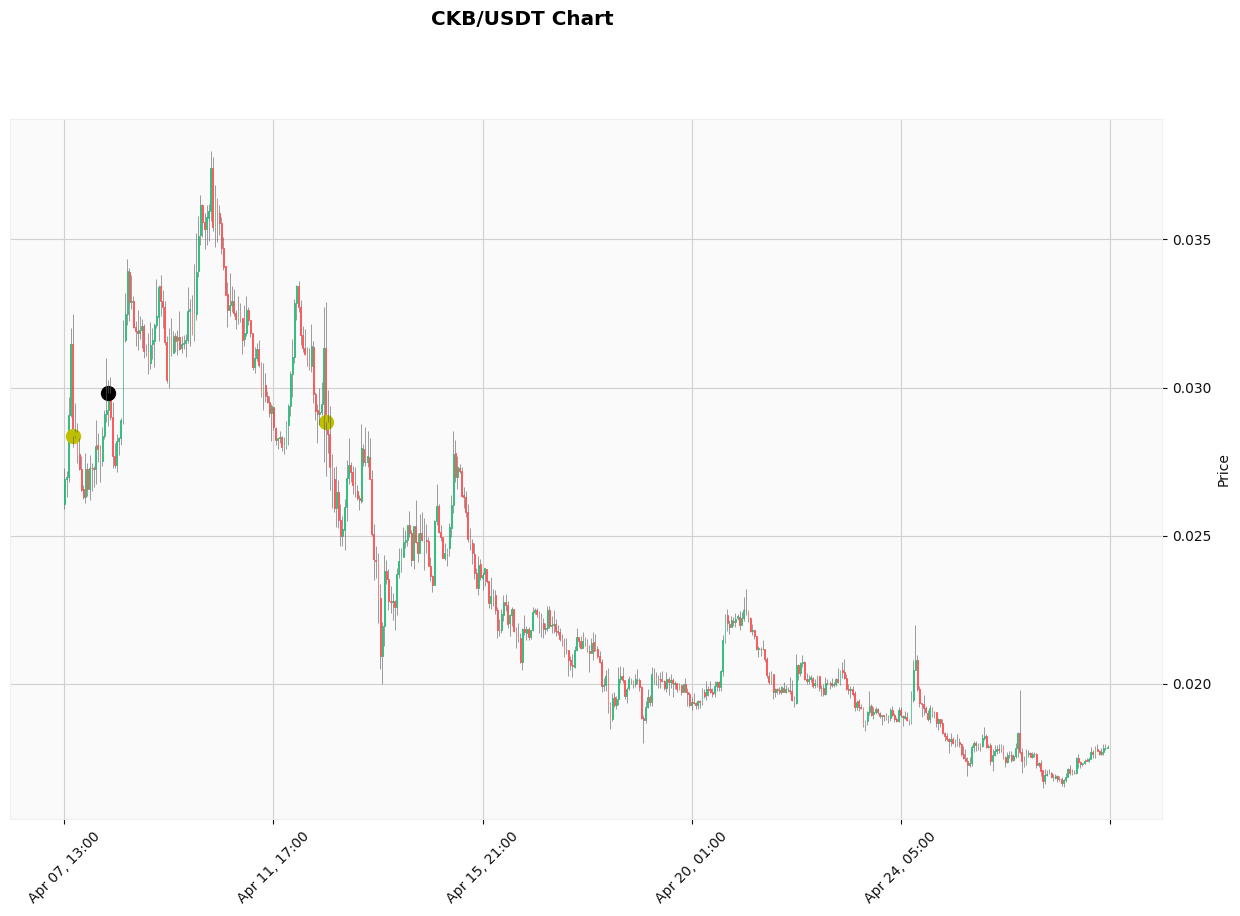

2024-04-12 18:00:00 买入


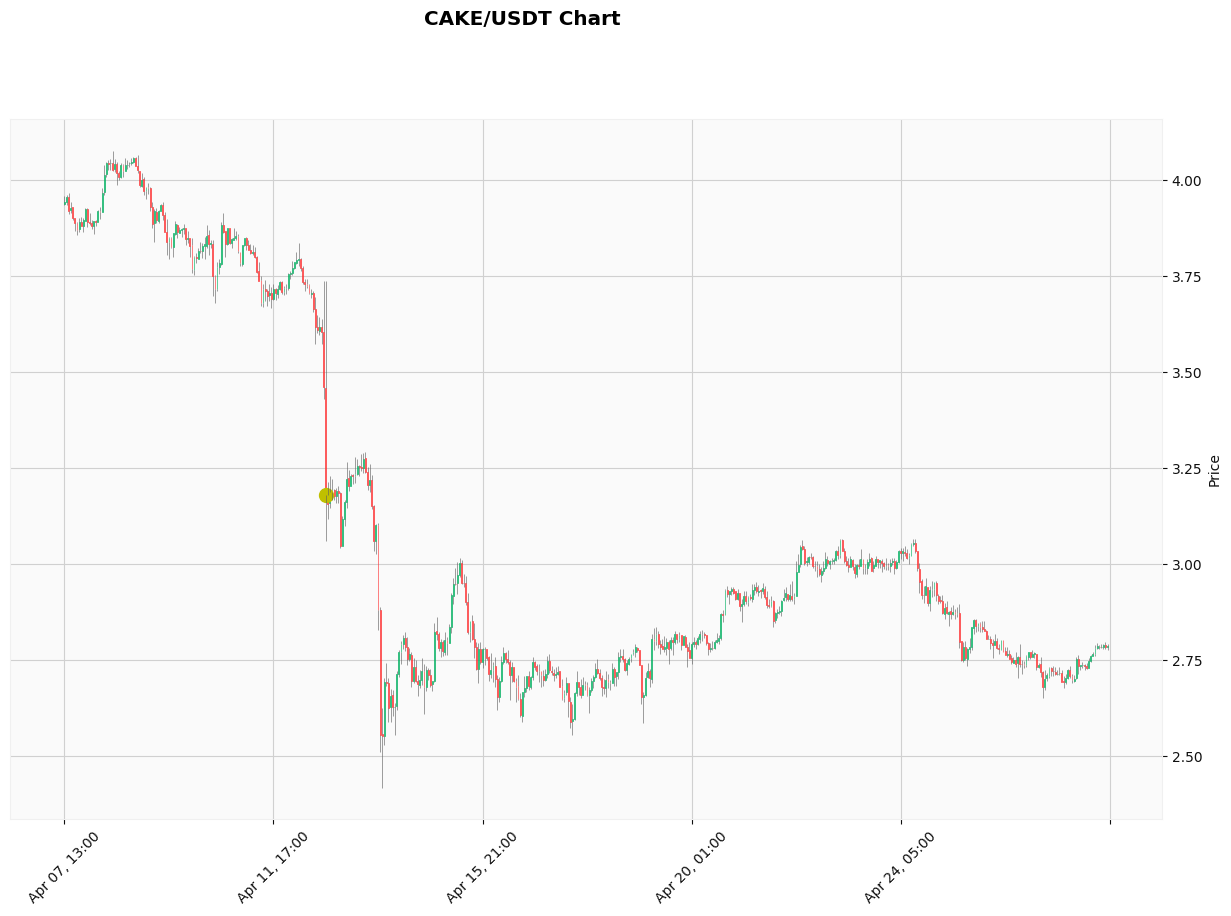

2024-04-12 18:00:00 买入


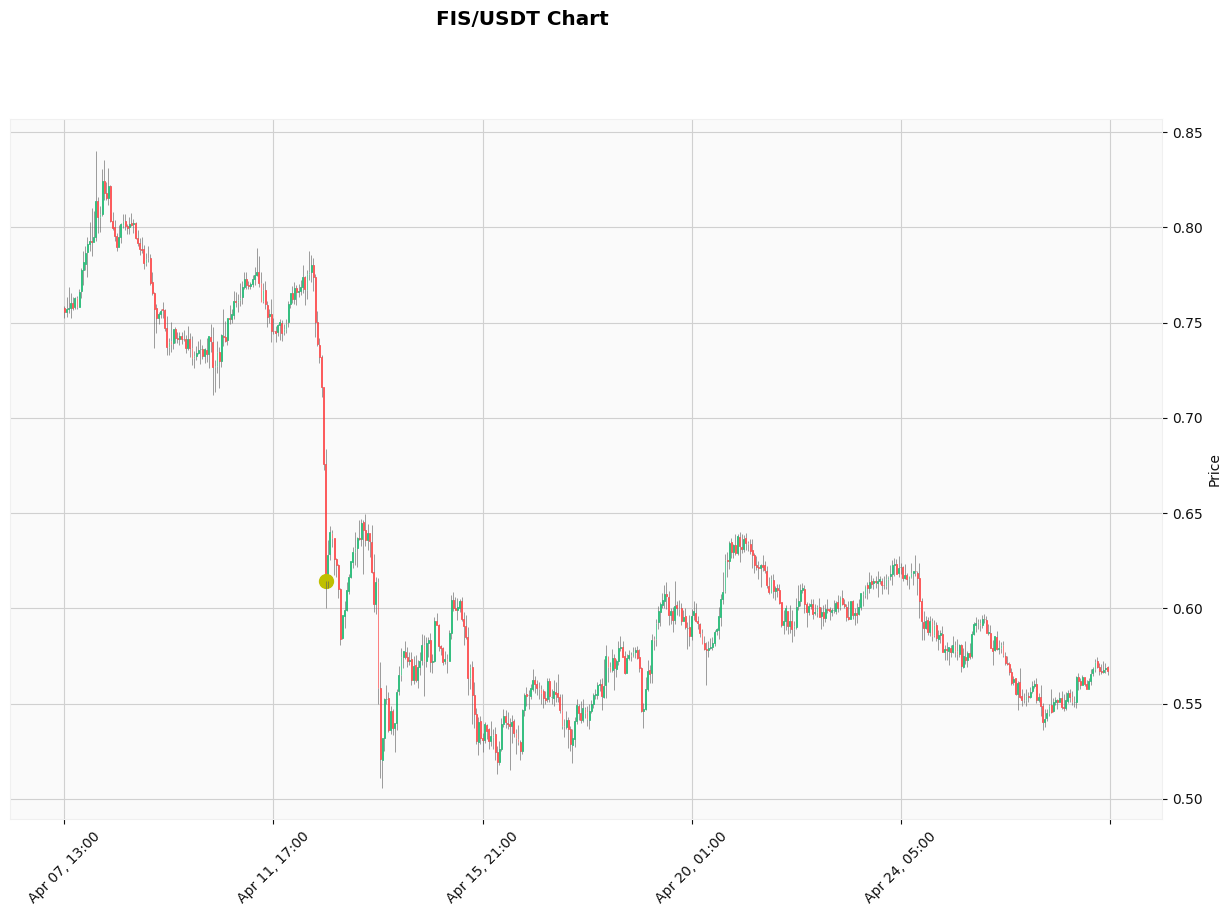

2024-04-20 16:00:00 买入


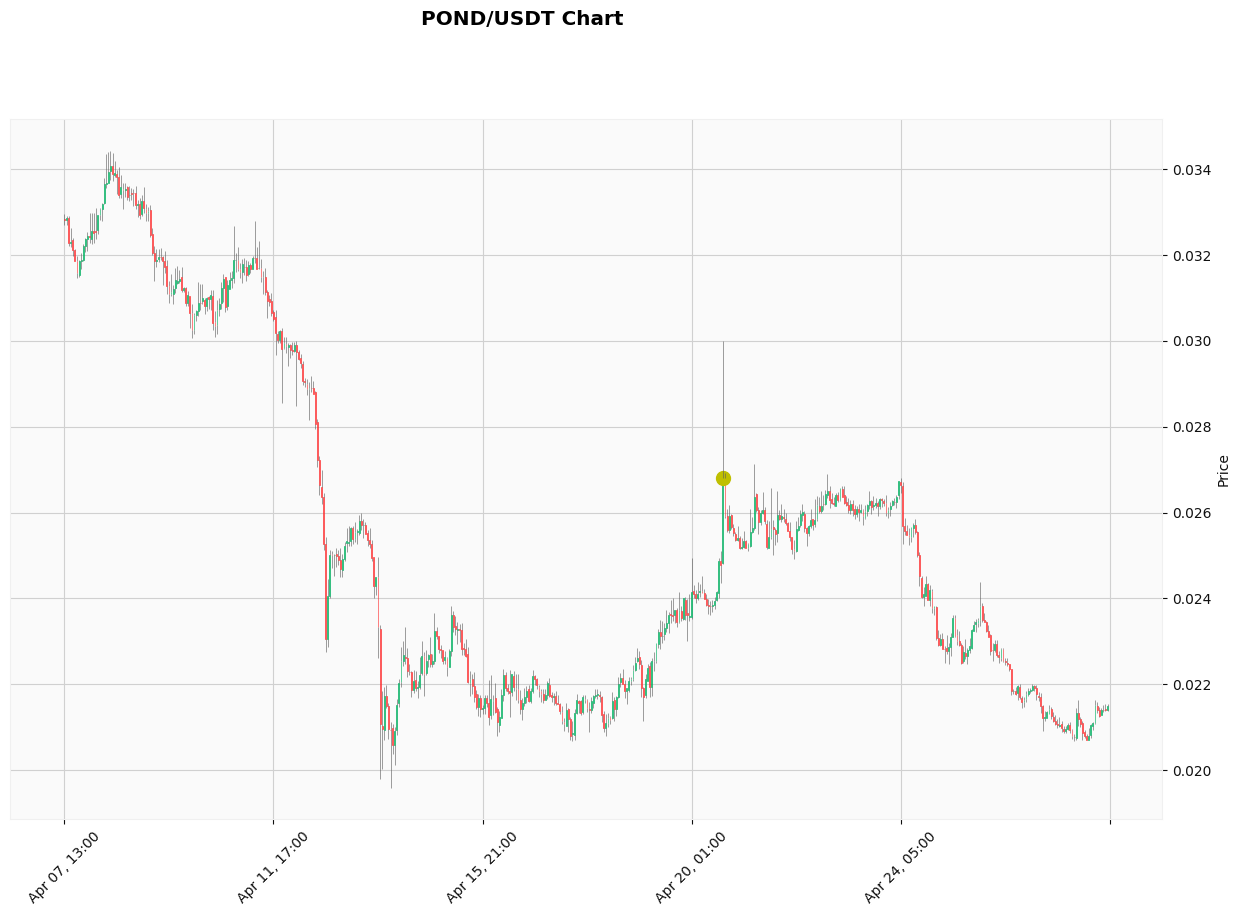

2024-04-12 18:00:00 买入


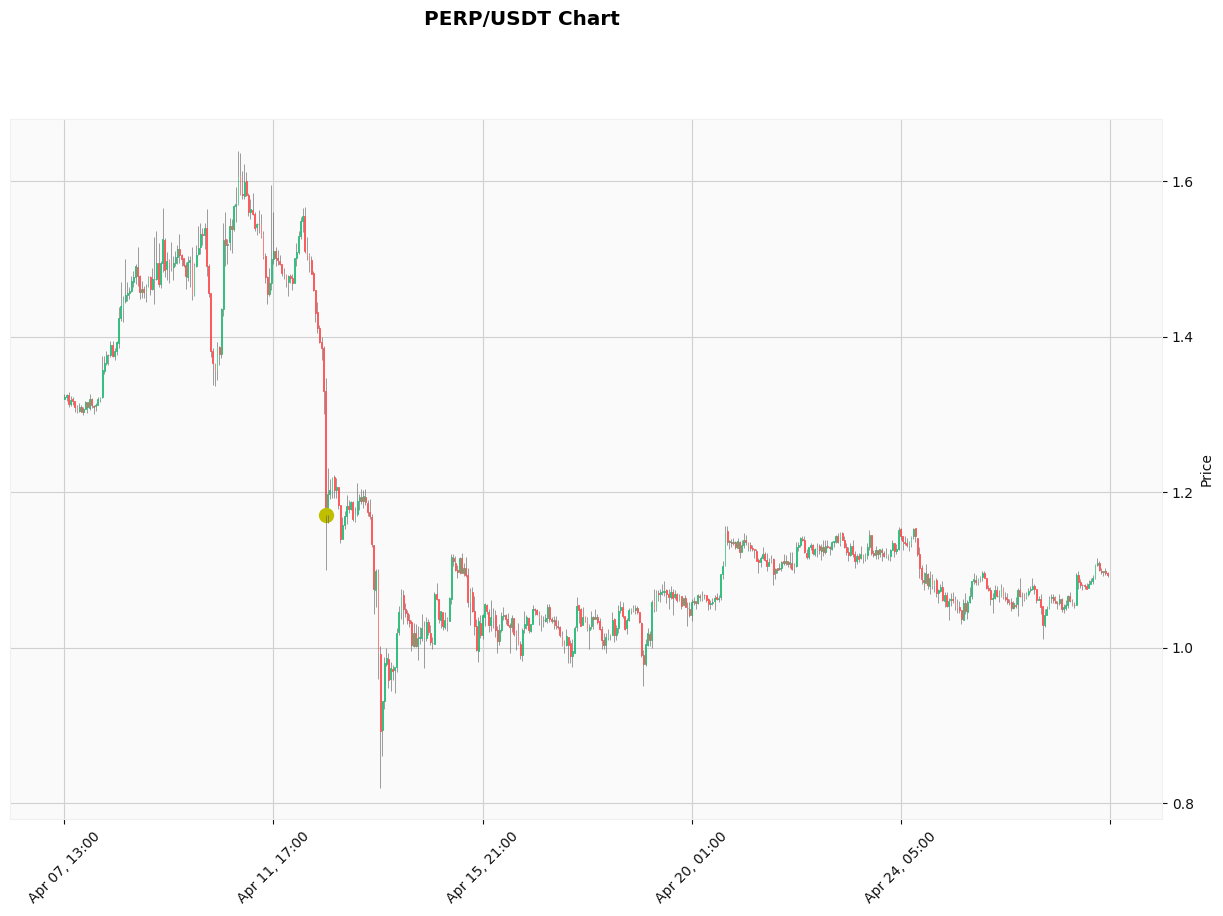

2023-04-11 07:00:00 买入


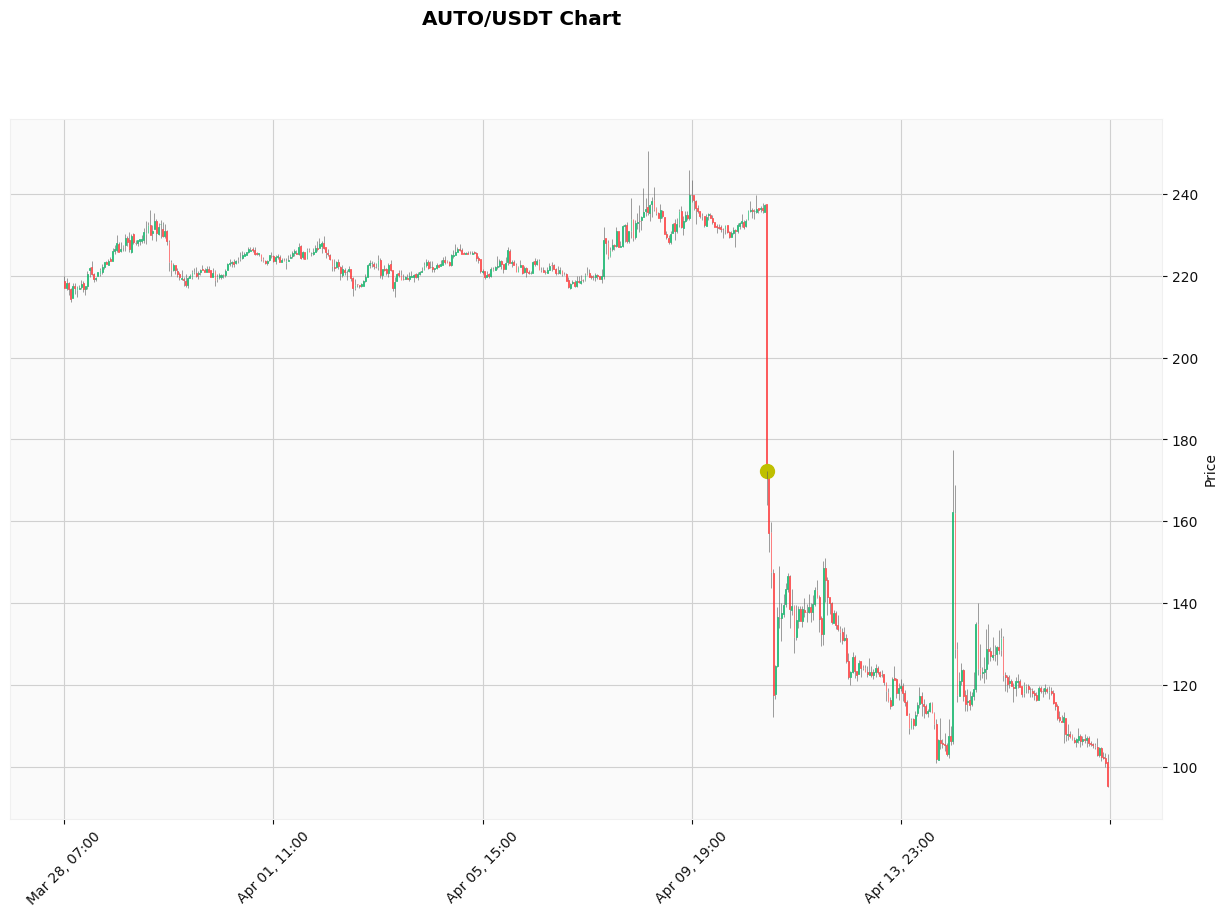

2021-11-26 08:00:00 买入
2021-12-01 13:00:00 卖出, 收益率: 19.39907591468328%
2021-12-01 14:00:00 买入


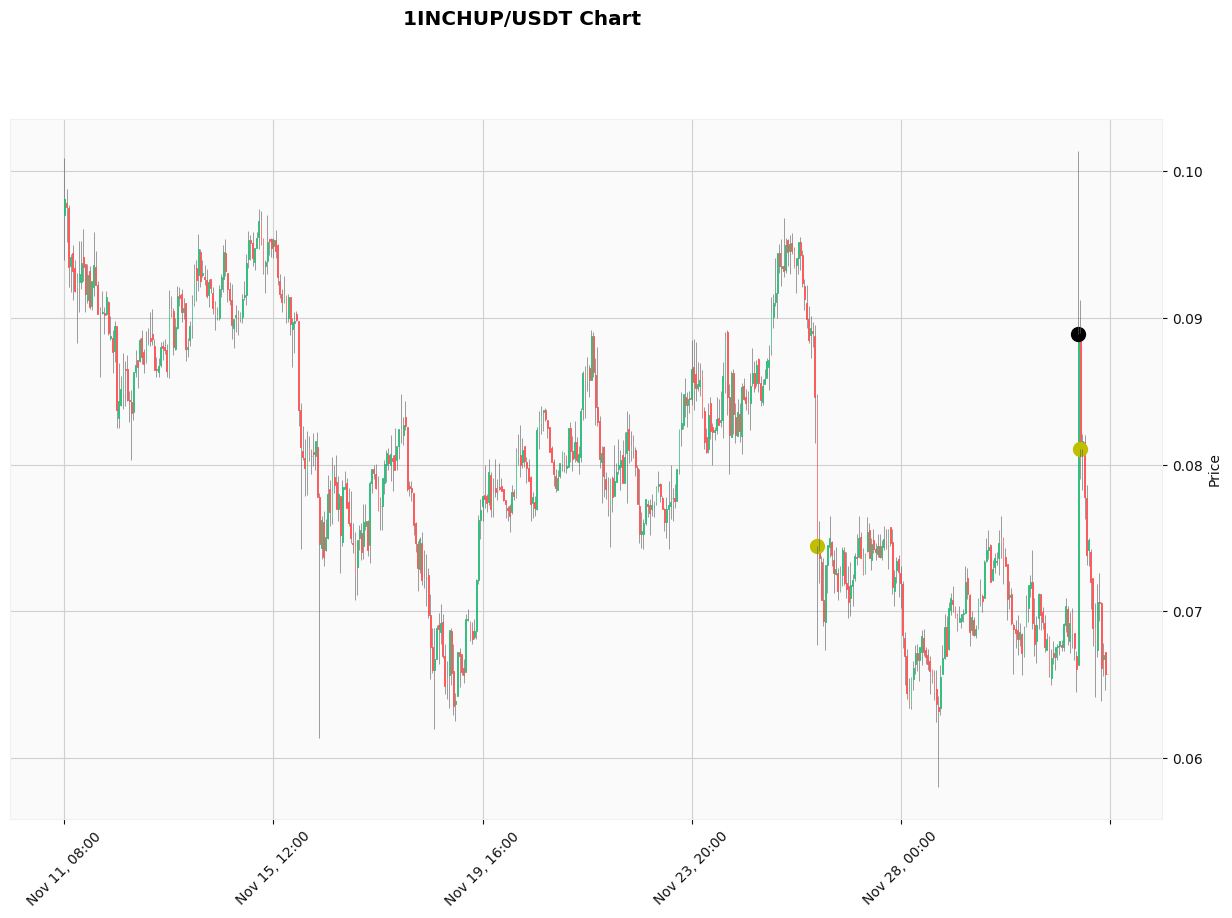

2022-10-09 00:00:00 买入
2022-10-22 12:00:00 卖出, 收益率: 29.411764705882348%
2022-10-22 13:00:00 买入


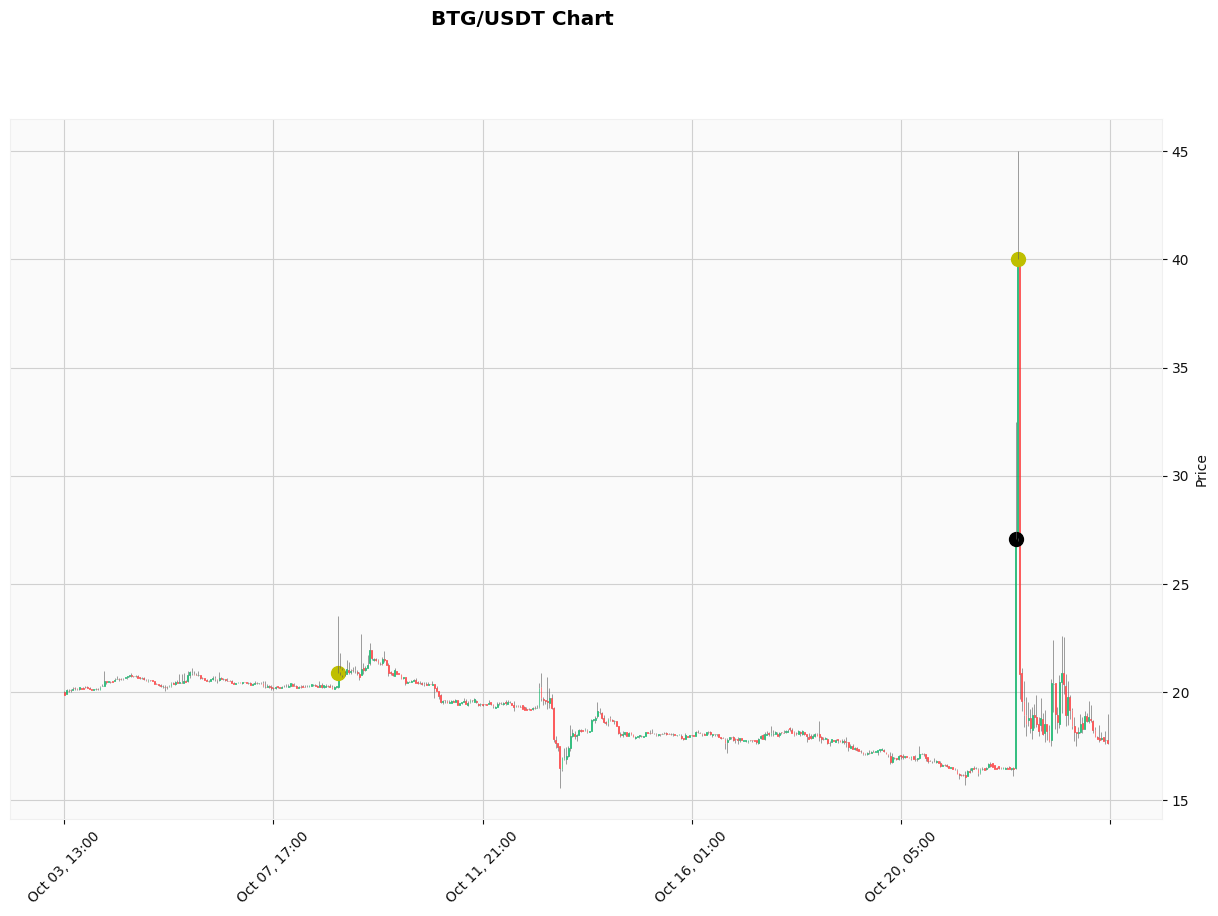

2024-04-12 18:00:00 买入


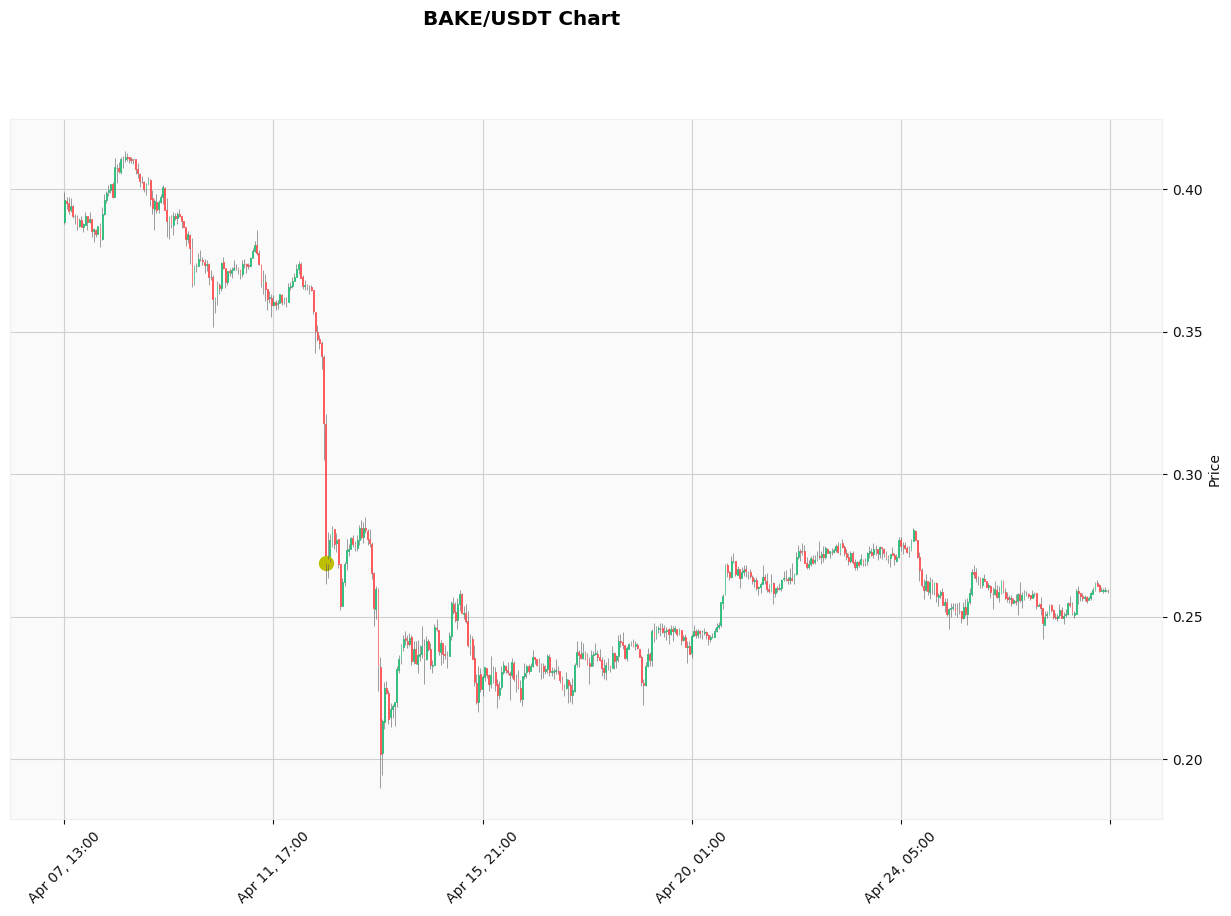

2024-04-12 18:00:00 买入


KeyboardInterrupt: 

In [123]:
for pair in bad:
    buy_10_sell_5(pair, True)

In [4]:
# 获得币对的市值，怀疑这些垃圾币的市值低
# However，市值算不了，没有流通量数据,所以改成查看这些垃圾币发行时间是否比较少，连500都没有
# from src.dao.exchange import exchange
def get_age(pair):
    return len(get_ohclv(pair, '1d', limit=500))
def less_500_rate(group):
    count_less_500 = 0
    for pair in group:
        age = get_age(pair)
        if age < 500:
            count_less_500 += 1
        # print(f'{pair}: {age}')
    print(f'rate {count_less_500 / len(group) * 100}%')

In [156]:
less_500_rate(bad)

rate 36.93693693693694%


In [157]:
less_500_rate(good)

rate 25.0%


In [158]:
less_500_rate(ok)

rate 28.448275862068968%


# 找到过去10min内跌幅最大的币对，交易一下

In [ ]:
scale = 30
while True:
    curr_time = unify_dt(datetime.datetime.now(), scale * 60)
    messages_10 = []
    messages_5 = []
    for pair in all_pairs:
        df = get_ohclv(pair, '1m', limit=scale + 1)
        
        # for i in range(len(df)):
        max_high = max(df['high'])
        high_idx = 0
        for i in range(len(df)):
            if df['high'].iloc[i] == max_high:
                high_idx = i
                break
    
        data_after_high = df[high_idx:]
        min_low = min(data_after_high['low'])
        min_idx = 0
        for i in range(len(data_after_high)):
            if data_after_high['low'].iloc[i] == min_low:
                min_idx = i
    
        decline_rate = (max_high - min_low) / max_high * 100
    
        if decline_rate > 10:
            messages_10.append(f'{pair} decline over 10% in {scale}min: {round(decline_rate, 2)}%')
        elif decline_rate > 5:
            messages_5.append(f'{pair} decline over 5% in {scale}min: {round(decline_rate, 2)}%')
    
    logger.info('Finished')
    if len(messages_10) + len(messages_5) > 0:
        messages = messages_10 + messages_5
        print('Send push message:', '\n'.join(messages))
        result = send_push({ 'content': '\n'.join(messages), 'title': f'过去{scale}分钟行情' })
        if not result['success']:
            print('send push failed')

    while unify_dt(datetime.datetime.now(), scale * 60) == curr_time:
        time.sleep(5)

    logger.info('Start next check loop')
    

2024-04-29 21:05:12,172 - INFO - Finished


In [14]:
import time
a = datetime.datetime.now()
unify_dt(a, 600)

datetime.datetime(2024, 4, 28, 20, 40)

In [4]:

to_spend = 10
symbol = 'GLM/USDT'
buy(symbol, to_spend)

2024-04-28 20:02:24,947 - INFO - USDT free balance: 0.00962941
2024-04-28 20:02:24,947 - WARNING - USDT account is not enough, will use all as possible
2024-04-28 20:02:24,947 - INFO - Try spending 0.00962941 USDT to buy 0.01748258896151053 GLM/USDT with price: 0.5508


InvalidOrder: binance amount of GLM/USDT must be greater than minimum amount precision of 1

In [10]:
exchange.fetch_order_book('ETH/USDT')

{'symbol': 'ETH/USDT',
 'bids': [[3289.8, 7.6377],
  [3289.75, 0.0072],
  [3289.7, 0.0072],
  [3289.65, 0.0072],
  [3289.62, 0.0073],
  [3289.6, 1.4982],
  [3289.55, 0.0072],
  [3289.51, 0.9645],
  [3289.5, 1.9654],
  [3289.48, 0.0216],
  [3289.45, 0.0072],
  [3289.44, 0.0032],
  [3289.4, 1.4982],
  [3289.36, 0.0037],
  [3289.35, 0.0072],
  [3289.3, 0.0072],
  [3289.29, 0.0026],
  [3289.26, 0.0366],
  [3289.25, 0.0072],
  [3289.21, 1.9395],
  [3289.2, 3.2321],
  [3289.15, 0.0072],
  [3289.14, 0.9147],
  [3289.13, 0.1],
  [3289.1, 0.0072],
  [3289.06, 0.8992],
  [3289.05, 0.4072],
  [3289.04, 0.0866],
  [3289.0, 1.4982],
  [3288.99, 1.0879],
  [3288.98, 0.2],
  [3288.96, 1.6907],
  [3288.95, 2.8072],
  [3288.93, 0.003],
  [3288.91, 0.3],
  [3288.9, 0.3072],
  [3288.85, 0.0072],
  [3288.84, 0.4941],
  [3288.82, 1.8754],
  [3288.8, 0.0072],
  [3288.77, 0.0218],
  [3288.75, 0.0072],
  [3288.7, 0.0072],
  [3288.69, 1.0827],
  [3288.68, 1.8257],
  [3288.65, 0.0072],
  [3288.63, 0.0028],
  [3

In [5]:
all_pairs

['BTC/USDT',
 'ETH/USDT',
 'BNB/USDT',
 'NEO/USDT',
 'LTC/USDT',
 'QTUM/USDT',
 'ADA/USDT',
 'XRP/USDT',
 'EOS/USDT',
 'TUSD/USDT',
 'IOTA/USDT',
 'XLM/USDT',
 'ONT/USDT',
 'TRX/USDT',
 'ETC/USDT',
 'ICX/USDT',
 'NULS/USDT',
 'VET/USDT',
 'USDC/USDT',
 'LINK/USDT',
 'WAVES/USDT',
 'ONG/USDT',
 'HOT/USDT',
 'ZIL/USDT',
 'ZRX/USDT',
 'FET/USDT',
 'BAT/USDT',
 'ZEC/USDT',
 'IOST/USDT',
 'CELR/USDT',
 'DASH/USDT',
 'OMG/USDT',
 'THETA/USDT',
 'ENJ/USDT',
 'MATIC/USDT',
 'ATOM/USDT',
 'TFUEL/USDT',
 'ONE/USDT',
 'FTM/USDT',
 'ALGO/USDT',
 'DOGE/USDT',
 'DUSK/USDT',
 'ANKR/USDT',
 'WIN/USDT',
 'COS/USDT',
 'MTL/USDT',
 'DENT/USDT',
 'KEY/USDT',
 'DOCK/USDT',
 'WAN/USDT',
 'FUN/USDT',
 'CVC/USDT',
 'CHZ/USDT',
 'BAND/USDT',
 'XTZ/USDT',
 'REN/USDT',
 'RVN/USDT',
 'HBAR/USDT',
 'NKN/USDT',
 'STX/USDT',
 'KAVA/USDT',
 'ARPA/USDT',
 'IOTX/USDT',
 'RLC/USDT',
 'CTXC/USDT',
 'BCH/USDT',
 'TROY/USDT',
 'VITE/USDT',
 'FTT/USDT',
 'EUR/USDT',
 'OGN/USDT',
 'WRX/USDT',
 'LSK/USDT',
 'BNT/USDT',
 'LTO/

In [11]:
res = exchange.load_markets()

In [18]:
print('\n'.join(['a', 'b']))

a
b


In [5]:
0.54200 * 1.05 


0.5691